<a href="https://colab.research.google.com/github/BARATHPDPI/ATM_Python/blob/main/GED_Breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount a drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df1 =pd.read_csv('/content/drive/My Drive/Colab Notebooks/BC-TCGA-Normal.csv')
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BC-TCGA-Tumor.csv')


In [ ]:
# prompt: combine df1 and df2 as single data df and class label df1 is 0 and df2 is 1 and the class label name is type

import pandas as pd

# Assuming df1 and df2 are already loaded as in the provided code

df1['type'] = 0
df2['type'] = 1

data = pd.concat([df1, df2], axis=0)
# or, if you want to create separate dataframes for data and class labels:
data_df = data.drop('type', axis=1)
class_label_df = data['type']


In [ ]:
# prompt: print row attribute names and column attribute names

print("Row attribute names (index):")
print(data.index.tolist())  # Print row index

print("\nColumn attribute names:")
print(data.columns.tolist())  # Print column names

Row attribute names (index):
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 

In [ ]:
# prompt: convert all the categorical values into numerical values

from sklearn.preprocessing import LabelEncoder

# Assuming 'data_df' contains your combined dataframe without the 'type' column
# and 'class_label_df' contains the 'type' column as the class labels.

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in your DataFrame
for col in data.columns:
    # Check if the column data type is 'object' (categorical)
    if data[col].dtype == 'object':
        # Fit and transform the column using the LabelEncoder
        data[col] = le.fit_transform(data_df[col])


In [ ]:
# prompt: replace the missing values by using k-nn imputation

from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer


data_df = data.drop('type', axis=1)
class_label_df = data['type']

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
data_imputed = imputer.fit_transform(data_df)

# Convert the imputed data back to a DataFrame
data_df_imputed = pd.DataFrame(data_imputed, columns=data_df.columns)

print("Row attribute names (index) of imputed data:")
print(data_df_imputed.index.tolist())

print("\nColumn attribute names of imputed data:")
print(data_df_imputed.columns.tolist())


In [ ]:
# prompt: replace the missing values by using k-nn imputation

from sklearn.impute import KNNImputer

# Assuming 'df' is your DataFrame with missing values
# Select only the numerical columns for imputation
numerical_df = df.select_dtypes(include=['number'])

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the numerical DataFrame
imputed_df = pd.DataFrame(imputer.fit_transform(numerical_df), columns=numerical_df.columns)

# Replace the original numerical columns with the imputed ones in the original DataFrame
df[numerical_df.columns] = imputed_df

# Now your DataFrame 'df' has missing values in numerical columns filled using KNN imputation
print(df.head())

   samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0     84.0  basal   9.850040  8.097927  6.424728  7.353027   3.029122   
1     85.0  basal   9.861357  8.212222  7.062593  7.685578   3.149468   
2     87.0  basal  10.103478  8.936137  5.735970  7.687822   3.125931   
3     90.0  basal   9.756875  7.357148  6.479183  6.986624   3.181638   
4     91.0  basal   9.408330  7.746404  6.693980  7.333426   3.169923   

    1294_at   1316_at   1320_at  ...  206926_s_at  206927_s_at  206928_at  \
0  6.880079  4.963740  4.408328  ...     6.167506     4.157291   8.463251   
1  7.542283  5.129607  4.584418  ...     6.016303     3.746938   9.166471   
2  6.562369  4.813449  4.425195  ...     6.298974     3.818161   8.691060   
3  7.802344  5.490982  4.567956  ...     5.924285     3.799996   8.519125   
4  7.610457  5.372469  4.424426  ...     5.984826     4.005609   9.199242   

   206929_s_at  206930_at  206931_at  206932_at  206933_s_at  206934_at  \
0     8.233774   3.4402

In [ ]:
# prompt: normalize with min-max normalization minimum 0 and maximum 1

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame with imputed values

# Select only the numerical columns for normalization
numerical_df = df.select_dtypes(include=['number'])

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0,1))

# Fit and transform the numerical DataFrame
normalized_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Replace the original numerical columns with the normalized ones in the original DataFrame
df[numerical_df.columns] = normalized_df

# Now your DataFrame 'df' has numerical columns normalized using min-max scaling
print(df.head())

    samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0  0.000000  basal   0.562294  0.594520  0.461277  0.413825   0.315540   
1  0.006494  basal   0.565008  0.624829  0.638405  0.604744   0.456949   
2  0.019481  basal   0.623076  0.816796  0.270016  0.606032   0.429293   
3  0.038961  basal   0.539950  0.398081  0.476398  0.203472   0.494749   
4  0.045455  basal   0.456358  0.501303  0.536045  0.402572   0.480984   

    1294_at   1316_at   1320_at  ...  206926_s_at  206927_s_at  206928_at  \
0  0.457464  0.185234  0.237430  ...     0.412142     0.211564   0.714523   
1  0.670148  0.281970  0.327875  ...     0.318942     0.068252   0.842624   
2  0.355424  0.097582  0.246094  ...     0.493177     0.093126   0.756021   
3  0.753674  0.492729  0.319419  ...     0.262223     0.086782   0.724701   
4  0.692044  0.423611  0.245698  ...     0.299540     0.158591   0.848593   

   206929_s_at  206930_at  206931_at  206932_at  206933_s_at  206934_at  \
0     0.842945   

In [ ]:
# prompt: reshape the dataset using z-score normalization
"""
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for Z-score normalization
numerical_features = df.select_dtypes(include=['number'])

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
normalized_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the normalized features
normalized_df = pd.DataFrame(normalized_features, columns=numerical_features.columns)

# Replace the original numerical features with the normalized ones in the original DataFrame
df[numerical_features.columns] = normalized_df

# Now your DataFrame 'df' has the numerical features normalized using Z-score normalization
print(df.head())

    samples   type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0 -1.693197  basal  -0.799563  0.661843  0.310655  0.041789  -0.985780   
1 -1.671112  basal  -0.781052  0.824165  1.302215  1.050345  -0.225934   
2 -1.626943  basal  -0.385048  1.852277 -0.760019  1.057150  -0.374541   
3 -1.560690  basal  -0.951940 -0.390221  0.395305 -1.069436  -0.022818   
4 -1.538605  basal  -1.522007  0.162605  0.729207 -0.017658  -0.096782   

    1294_at   1316_at   1320_at  ...  206926_s_at  206927_s_at  206928_at  \
0 -0.672168 -1.225551 -0.994281  ...     0.558714    -0.148957   1.209786   
1  0.362588 -0.660486 -0.421679  ...    -0.126721    -0.837139   1.978431   
2 -1.168619 -1.737551 -0.939433  ...     1.154686    -0.717695   1.458790   
3  0.768958  0.570620 -0.475208  ...    -0.543857    -0.748159   1.270859   
4  0.469116  0.166878 -0.941935  ...    -0.269413    -0.403336   2.014250   

   206929_s_at  206930_at  206931_at  206932_at  206933_s_at  206934_at  \
0     1.411273  -

In [ ]:
# prompt: count the records in individual class label

# Assuming your target variable (class label) is in a column named 'target'
# Replace 'target' with the actual name of your target variable column

class_counts = df['type'].value_counts()
class_counts

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64

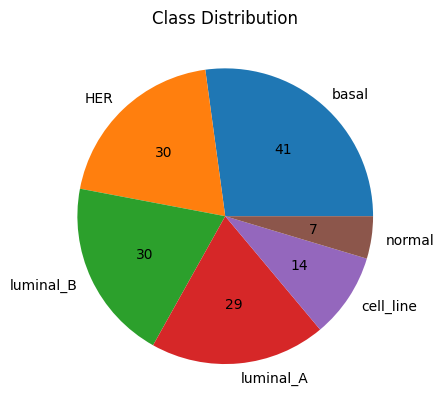

In [ ]:
# prompt: draw pie chart in count instead of percentage

import matplotlib.pyplot as plt

# Assuming you have class_counts from the previous code
# class_counts = df['type'].value_counts()

# Create the pie chart with counts instead of percentages
plt.pie(class_counts.values, labels=class_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(class_counts.values) / 100))
plt.title('Class Distribution')
plt.show()

In [ ]:
# prompt: balance the dataset using tomek link smote

from imblearn.combine import SMOTETomek

# Assuming 'X' contains your feature data and 'y' contains your target variable
X = df.drop('type', axis=1)  # Replace 'target' with your target column name
y = df['type']

# Convert the target variable to categorical if it's not already
# Instead of y = y.astype('category'), use the following:
y = y.astype(str)  # or y = y.astype('object')

# Create the SMOTETomek object
smote_tomek = SMOTETomek(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
X, y = X_resampled, y_resampled


# Now X_resampled and y_resampled contain the balanced dataset

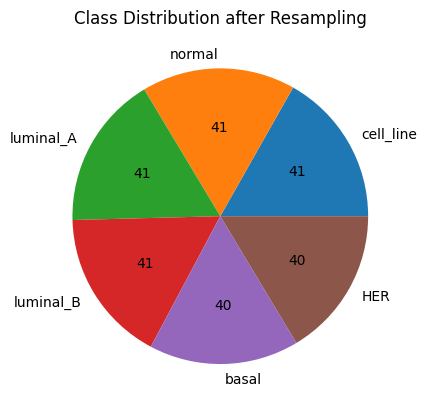

In [ ]:
# prompt: draw pie chart for the resampled dataset for number of records in class

# Assuming you have X_resampled and y_resampled from the previous code

# Count the number of records in each class after resampling
resampled_class_counts = y_resampled.value_counts()

# Create the pie chart with counts instead of percentages
plt.pie(resampled_class_counts.values, labels=resampled_class_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(resampled_class_counts.values) / 100))
plt.title('Class Distribution after Resampling')
plt.show()

In [ ]:
# prompt: convert type as numerical value

# Assuming 'type' is the column you want to convert
# Check if the column exists before attempting conversion
if 'type' in df.columns:
    # Convert 'type' column to numerical using factorize
    df['type'], _ = pd.factorize(df['type'])
    print(df.head())
else:
    print("Error: Column 'type' not found in the DataFrame.")

    samples  type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0  0.000000     0   0.562294  0.594520  0.461277  0.413825   0.315540   
1  0.006494     0   0.565008  0.624829  0.638405  0.604744   0.456949   
2  0.019481     0   0.623076  0.816796  0.270016  0.606032   0.429293   
3  0.038961     0   0.539950  0.398081  0.476398  0.203472   0.494749   
4  0.045455     0   0.456358  0.501303  0.536045  0.402572   0.480984   

    1294_at   1316_at   1320_at  ...  206926_s_at  206927_s_at  206928_at  \
0  0.457464  0.185234  0.237430  ...     0.412142     0.211564   0.714523   
1  0.670148  0.281970  0.327875  ...     0.318942     0.068252   0.842624   
2  0.355424  0.097582  0.246094  ...     0.493177     0.093126   0.756021   
3  0.753674  0.492729  0.319419  ...     0.262223     0.086782   0.724701   
4  0.692044  0.423611  0.245698  ...     0.299540     0.158591   0.848593   

   206929_s_at  206930_at  206931_at  206932_at  206933_s_at  206934_at  \
0     0.842945   0.1493

In [ ]:
# prompt: convert the dataset into training and testing

from sklearn.model_selection import train_test_split

# Assuming 'df' is your combined DataFrame with features and the 'type' column
X = df.drop('type', axis=1)  # Features (all columns except 'type')
y = df['type']  # Target variable ('type' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Now you have X_train, X_test, y_train, and y_test for your model training and evaluation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 16383)
X_test shape: (31, 16383)
y_train shape: (120,)
y_test shape: (31,)


In [ ]:
# prompt: elasticnet for feature selection

# Import ElasticNet from sklearn.linear_model
from sklearn.linear_model import ElasticNet, ElasticNetCV

# Create and fit ElasticNetCV
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
model.fit(X_train, y_train)


# Get feature importance (coefficients)
feature_importance = model.coef_ # Use the variable 'model' here

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
feature_importance_df

Feature  Importance
0          samples    1.031023
14673    205225_at    0.649117
13956  204508_s_at    0.336322
14457    205009_at    0.266517
15144  205696_s_at    0.245558
...            ...         ...
6924    1562940_at   -0.181740
10748  201299_s_at   -0.187158
4587    1559078_at   -0.247643
14028    204580_at   -0.249112
15415    205967_at   -0.261300

[16383 rows x 2 columns]

In [ ]:
# prompt: count the number of features importance not equal to 0

# Assuming 'feature_importance' is already calculated as in your provided code
non_zero_features = sum(1 for importance in feature_importance if importance != 0)
print(f"Number of features with non-zero importance: {non_zero_features}")

Number of features with non-zero importance: 76


In [ ]:
# prompt: create data set with non-zero importance features and its values from df

# Create a new DataFrame with only the non-zero importance features and their values
non_zero_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]

# Print the DataFrame
print(non_zero_importance_df)

# Access the feature names with non-zero importance
non_zero_features = non_zero_importance_df['Feature'].tolist()
print(non_zero_features)

# Create a new DataFrame with selected features and values from the original DataFrame (df)
new_df = df[non_zero_features]
new_df['type'] = y
new_df

           Feature  Importance
0          samples    1.031023
14673    205225_at    0.649117
13956  204508_s_at    0.336322
14457    205009_at    0.266517
15144  205696_s_at    0.245558
...            ...         ...
6924    1562940_at   -0.181740
10748  201299_s_at   -0.187158
4587    1559078_at   -0.247643
14028    204580_at   -0.249112
15415    205967_at   -0.261300

[76 rows x 2 columns]
['samples', '205225_at', '204508_s_at', '205009_at', '205696_s_at', '204667_at', '1556416_s_at', '203839_s_at', '204378_at', '206378_at', '205597_at', '203963_at', '204623_at', '206194_at', '206401_s_at', '1558702_at', '1569867_at', '205381_at', '206832_s_at', '1558448_a_at', '1556654_at', '204840_s_at', '202908_at', '204524_at', '200055_at', '204540_at', '1562821_a_at', '1558281_a_at', '206754_s_at', '206739_at', '1558595_at', '205186_at', '205441_at', '1558678_s_at', '200718_s_at', '205354_at', '203571_s_at', '203749_s_at', '202109_at', '1555270_a_at', '205862_at', '201439_at', '203289_s_at', '20

<ipython-input-95-22e56b2636ce>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['type'] = y


samples  205225_at  204508_s_at  205009_at  205696_s_at  204667_at  \
0    0.000000   0.263762     0.041560   0.020526     0.076812   0.064471   
1    0.006494   0.085085     0.126084   0.029907     0.000000   0.067857   
2    0.019481   0.222064     0.000000   0.062942     0.097497   0.214769   
3    0.038961   0.227845     0.176664   0.023773     0.120295   0.089111   
4    0.045455   0.187476     0.172592   0.011629     0.107892   0.152257   
..        ...        ...          ...        ...          ...        ...   
146  0.948052   0.680498     0.529854   0.298267     0.245932   0.731915   
147  0.967532   0.833841     0.593234   0.886413     0.703786   0.914947   
148  0.987013   0.809052     0.600843   0.173634     0.232879   0.842537   
149  0.993506   0.693675     0.491402   0.984204     0.204135   0.905143   
150  1.000000   0.833849     0.758977   0.784469     0.486256   0.935310   

     1556416_s_at  203839_s_at  204378_at  206378_at  ...  1557065_at  \
0        0.963431     0.454997   0.009147   0.011577  ...    0.623804   
1        0.598593     0.253774   0.000000   0.112715  ...    0.595245   
2        0.523007     0.401679   0.109832   0.031685  ...    0.486776   
3        0.848019     0.352359   0.053798   0.023239  ...    0.682056   
4        0.763455     0.199099   0.015649   0.000000  ...    0.889016   
..            ...          ...        ...        ...  ...         ...   
146      0.846998     0.794121   0.767782   0.780110  ...    0.230249   
147      0.810222     0.665883   0.121122   0.379631  ...    0.432364   
148      0.714077     0.671754   0.473698   0.280474  ...    0.292521   
149      0.774728     0.538713   0.656950   0.221207  ...    0.361622   
150      0.536485     0.637778   0.324809   0.794813  ...    0.247911   

     1553749_at  1567105_at  202656_s_at  1562940_at  201299_s_at  1559078_at  \
0      0.591257    0.611122     0.617682    0.386656     0.871454    0.668209   
1      0.686626    0.705123     0.723441    0.713334     0.876403    0.889556   
2      0.743406    0.939855     0.024109    0.577771     0.898078    0.700780   
3      0.713841    0.560587     0.765265    0.269895     0.885083    0.538330   
4      0.707980    0.481914     0.240602    0.405388     1.000000    0.468522   
..          ...         ...          ...         ...          ...         ...   
146    0.299854    0.253334     0.019366    0.136185     0.062521    0.251166   
147    0.393774    0.212877     0.496450    0.159827     0.438828    0.041802   
148    0.409056    0.110425     0.014539    0.000000     0.287186    0.229996   
149    0.502902    0.284452     0.104465    0.058333     0.363849    0.150394   
150    0.410411    0.387312     0.090857    0.041139     0.099751    0.208372   

     204580_at  205967_at  type  
0     0.726964   0.741231     0  
1     0.370639   0.716417     0  
2     0.493068   0.827839     0  
3     0.873448   0.664586     0  
4     0.659445   0.728494     0  
..         ...        ...   ...  
146   0.136565   0.296992     5  
147   0.021059   0.577464     5  
148   0.048444   0.094605     5  
149   0.038559   0.427762     5  
150   0.030617   0.342133     5  

[151 rows x 77 columns]

In [ ]:
new_df.head()

samples  205225_at  204508_s_at  205009_at  205696_s_at  204667_at  \
0  0.000000   0.263762     0.041560   0.020526     0.076812   0.064471   
1  0.006494   0.085085     0.126084   0.029907     0.000000   0.067857   
2  0.019481   0.222064     0.000000   0.062942     0.097497   0.214769   
3  0.038961   0.227845     0.176664   0.023773     0.120295   0.089111   
4  0.045455   0.187476     0.172592   0.011629     0.107892   0.152257   

   1556416_s_at  203839_s_at  204378_at  206378_at  ...  1557065_at  \
0      0.963431     0.454997   0.009147   0.011577  ...    0.623804   
1      0.598593     0.253774   0.000000   0.112715  ...    0.595245   
2      0.523007     0.401679   0.109832   0.031685  ...    0.486776   
3      0.848019     0.352359   0.053798   0.023239  ...    0.682056   
4      0.763455     0.199099   0.015649   0.000000  ...    0.889016   

   1553749_at  1567105_at  202656_s_at  1562940_at  201299_s_at  1559078_at  \
0    0.591257    0.611122     0.617682    0.386656     0.871454    0.668209   
1    0.686626    0.705123     0.723441    0.713334     0.876403    0.889556   
2    0.743406    0.939855     0.024109    0.577771     0.898078    0.700780   
3    0.713841    0.560587     0.765265    0.269895     0.885083    0.538330   
4    0.707980    0.481914     0.240602    0.405388     1.000000    0.468522   

   204580_at  205967_at  type  
0   0.726964   0.741231     0  
1   0.370639   0.716417     0  
2   0.493068   0.827839     0  
3   0.873448   0.664586     0  
4   0.659445   0.728494     0  

[5 rows x 77 columns]

In [ ]:
import requests

# Example list of Ensembl gene IDs (replace with your actual list)
gene_ids =  non_zero_importance_df['Feature'].tolist()

url = "https://rest.ensembl.org/lookup/id"
gene_mapping = {}

for gene_id in gene_ids:
    response = requests.get(f"{url}{gene_id}")
    if response.status_code == 200:
        data = response.json()
        gene_mapping[gene_id] = data.get("symbol", "Unknown")
    else:
        gene_mapping[gene_id] = "Not Found"

print(gene_mapping)



{'samples': 'Not Found', '205225_at': 'Not Found', '204508_s_at': 'Not Found', '205009_at': 'Not Found', '205696_s_at': 'Not Found', '204667_at': 'Not Found', '1556416_s_at': 'Not Found', '203839_s_at': 'Not Found', '204378_at': 'Not Found', '206378_at': 'Not Found', '205597_at': 'Not Found', '203963_at': 'Not Found', '204623_at': 'Not Found', '206194_at': 'Not Found', '206401_s_at': 'Not Found', '1558702_at': 'Not Found', '1569867_at': 'Not Found', '205381_at': 'Not Found', '206832_s_at': 'Not Found', '1558448_a_at': 'Not Found', '1556654_at': 'Not Found', '204840_s_at': 'Not Found', '202908_at': 'Not Found', '204524_at': 'Not Found', '200055_at': 'Not Found', '204540_at': 'Not Found', '1562821_a_at': 'Not Found', '1558281_a_at': 'Not Found', '206754_s_at': 'Not Found', '206739_at': 'Not Found', '1558595_at': 'Not Found', '205186_at': 'Not Found', '205441_at': 'Not Found', '1558678_s_at': 'Not Found', '200718_s_at': 'Not Found', '205354_at': 'Not Found', '203571_s_at': 'Not Found', '2

In [ ]:
# prompt: print the number of counts of unique value of type

print(new_df['type'].value_counts())

type
0    41
1    30
5    30
4    29
2    14
3     7
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import StandardScaler

# Load gene expression data and metadata
expression_data = new_df.drop('type', axis=1)  # Assuming 'type' is the target variable


# Load the metadata containing sample labels (rows: samples, column: 'type')
metadata = pd.DataFrame({'Sample': new_df.index, 'type': new_df['type']})
metadata_filtered = metadata[metadata.index.isin(expression_data.columns)]
print("Filtered Metadata Shape:", metadata_filtered.shape)
# Keep only metadata for available samples in expression_data
metadata = metadata.loc[expression_data.columns]


# Get unique class labels
classes = metadata['type'].unique()

# Print dataset shapes
print("Shape of Expression Data:", expression_data.shape)  # (genes, samples)
print("Shape of Metadata:", metadata.shape)  # (samples, 1)

Filtered Metadata Shape: (0, 2)


KeyError: "None of [Index(['samples', '205225_at', '204508_s_at', '205009_at', '205696_s_at',\n       '204667_at', '1556416_s_at', '203839_s_at', '204378_at', '206378_at',\n       '205597_at', '203963_at', '204623_at', '206194_at', '206401_s_at',\n       '1558702_at', '1569867_at', '205381_at', '206832_s_at', '1558448_a_at',\n       '1556654_at', '204840_s_at', '202908_at', '204524_at', '200055_at',\n       '204540_at', '1562821_a_at', '1558281_a_at', '206754_s_at', '206739_at',\n       '1558595_at', '205186_at', '205441_at', '1558678_s_at', '200718_s_at',\n       '205354_at', '203571_s_at', '203749_s_at', '202109_at', '1555270_a_at',\n       '205862_at', '201439_at', '203289_s_at', '200670_at', '202991_at',\n       '206063_x_at', '1552619_a_at', '1564676_a_at', '1554830_a_at',\n       '204270_at', '201171_at', '203692_s_at', '202917_s_at', '205044_at',\n       '201668_x_at', '1554572_a_at', '1559258_a_at', '1561153_at',\n       '202233_s_at', '1555272_at', '1569703_a_at', '200934_at', '1565868_at',\n       '1556923_at', '1556656_at', '204750_s_at', '204913_s_at', '1557065_at',\n       '1553749_at', '1567105_at', '202656_s_at', '1562940_at', '201299_s_at',\n       '1559078_at', '204580_at', '205967_at'],\n      dtype='object')] are in the [index]"

In [ ]:
# prompt: differentially expressed genes of new_df

# Assuming 'new_df' and 'gene_mapping' are already defined as in your provided code
# Load gene expression data (rows: genes, columns: samples)
expression_data = new_df.drop('type', axis=1)  # Assuming 'type' is the target variable

# Load metadata with sample conditions (e.g., normal vs. cancer)
metadata = pd.DataFrame({'Sample': new_df.index, 'type': new_df['type']})

# Ensure sample order matches between expression data and metadata
metadata = metadata.set_index("Sample")

# Align expression data based on the index of metadata
# This line selects only the columns that are present in both DataFrames
# using the intersection of their columns.
expression_data = expression_data.loc[:, expression_data.columns.intersection(metadata.index)]

# Extract class labels (e.g., 6 subtypes)
classes = metadata["type"].unique()

# Perform ANOVA to find differentially expressed genes
deg_results = []
for gene in expression_data.index:
    # Use boolean indexing to select samples for each class
    # Here, we filter 'metadata' to only include samples that are also
    # present in 'expression_data'.
    filtered_metadata = metadata[metadata.index.isin(expression_data.columns)]
    groups = [expression_data.loc[gene, filtered_metadata['type'] == cls] for cls in classes]

    # Perform one-way ANOVA test
    f_stat, p_value = stats.f_oneway(*groups)

    # Compute log2 fold change
    mean_expressions = [np.mean(g) for g in groups]
    log2fc = np.log2(max(mean_expressions) + 1) - np.log2(min(mean_expressions) + 1)

    deg_results.append([gene, log2fc, p_value])

# Convert results to DataFrame
deg_df = pd.DataFrame(deg_results, columns=["Gene", "Log2FC", "P_Value"])

# Apply multiple testing correction (False Discovery Rate - FDR)
deg_df["Adj_P_Value"] = sm.stats.multipletests(deg_df["P_Value"], method="fdr_bh")[1]

# Filter significant DEGs (Adj P-Value < 0.05 and absolute Log2FC > 1)
significant_degs = deg_df[(deg_df["Adj_P_Value"] < 0.05) & (abs(deg_df["Log2FC"]) > 1)]

# Save results
significant_degs.to_csv("differentially_expressed_genes.csv", index=False)

# Perform post-hoc Tukey's HSD test (modified for 'type' column)
tukey_results = []
for gene in significant_degs["Gene"]:
    melted_data = pd.DataFrame({
        "Expression": expression_data.loc[gene].values,
        "type": metadata["type"].values  # Use 'type' column instead of 'Condition'
    })
    tukey = pairwise_tukeyhsd(endog=melted_data["Expression"], groups=melted_data["type"], alpha=0.05)

    for result in tukey.summary().data[1:]:
        tukey_results.append([gene, result[0], result[1], result[2], result[3], result[4]])

# Convert to DataFrame and save
tukey_df = pd.DataFrame(tukey_results, columns=["Gene", "Group1", "Group2", "Mean_Diff", "p-adj", "Reject"])
tukey_df.to_csv("tukey_posthoc_results.csv", index=False)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load gene expression data and metadata
# Ensure expression_data is gene x sample (rows: genes, columns: samples)
# metadata should be a DataFrame with 'type' column for binary classification (e.g., 'Tumor' and 'Normal')
# Load gene expression data (rows: genes, columns: samples)
expression_data = new_df.drop('type', axis=1)  # Assuming 'type' is the target variable

# Load metadata with sample conditions (e.g., normal vs. cancer)
metadata = pd.DataFrame({'Sample': new_df.index, 'type': new_df['type']})

# Assume 'type' column indicates the class label (e.g., Tumor vs Normal)
# Select the samples based on the binary class labels in metadata
class1_samples = metadata[metadata['type'] == 1].index
class2_samples = metadata[metadata['type'] == 0].index

# Perform T-test for each gene
results = []
for gene in expression_data.index:
    class1_values = expression_data.loc[gene, class1_samples]
    class2_values = expression_data.loc[gene, class2_samples]

    # Perform t-test (two-sided)
    stat, p_value = ttest_ind(class1_values, class2_values)
    results.append((gene, stat, p_value))

# Convert results to DataFrame for easier manipulation
results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'p-value'])
results_df.set_index('Gene', inplace=True)

# Apply multiple testing correction (e.g., Benjamini-Hochberg FDR)
from statsmodels.stats.multitest import multipletests
results_df['p-value_adj'] = multipletests(results_df['p-value'], method='fdr_bh')[1]

# Identify significantly differentially expressed genes (adjusted p-value < 0.05)
significant_genes = results_df[results_df['p-value_adj'] < 0.05]
print(f"Significant Genes: {significant_genes.shape[0]}")

# Visualize significant genes using a volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(results_df['T-statistic'], -np.log10(results_df['p-value_adj']), c='blue', alpha=0.5)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('T-statistic')
plt.ylabel('-log10(p-value)')
plt.show()

# Heatmap of top 10 significant genes
top_genes = significant_genes.sort_values('p-value_adj').head(10).index

# Standardize the expression data for heatmap visualization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data.loc[top_genes])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data, cmap="coolwarm", xticklabels=metadata.index, yticklabels=top_genes)
plt.title('Heatmap of Top 10 Differentially Expressed Genes')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

# Boxplot of expression values for the top gene (example: the first significant gene)
top_gene = significant_genes.sort_values('p-value_adj').head(1).index[0]
plt.figure(figsize=(6, 4))
sns.boxplot(x=metadata['type'], y=expression_data.loc[top_gene, :])
plt.title(f'Boxplot of {top_gene} Expression by Class')
plt.xlabel('Class')
plt.ylabel('Expression Level')
plt.show()



KeyError: "None of [Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n       ...\n       141, 142, 143, 144, 145, 146, 147, 148, 149, 150],\n      dtype='int64', length=144)] are in the [index]"

Significant Genes: 0


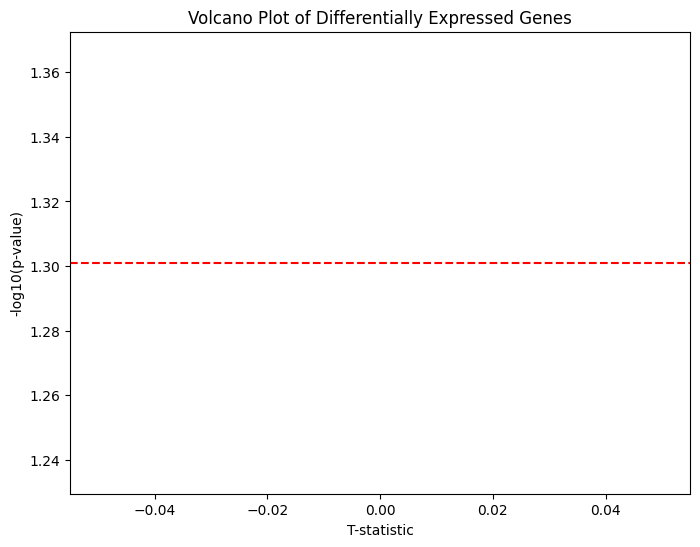

ValueError: Found array with 0 sample(s) (shape=(0, 151)) while a minimum of 1 is required by StandardScaler.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests

# Load gene expression data and metadata
# Ensure expression_data is gene x sample (rows: genes, columns: samples)
# metadata should be a DataFrame with 'type' column for binary classification (e.g., 'Tumor' and 'Normal')
# Load gene expression data (rows: genes, columns: samples)
expression_data = new_df.drop('type', axis=1)  # Assuming 'type' is the target variable

# Load metadata with sample conditions (e.g., normal vs. cancer)
metadata = pd.DataFrame({'Sample': new_df.index, 'type': new_df['type']})

# Ensure sample order matches between expression data and metadata
metadata = metadata.set_index("Sample")

# Align expression data columns with metadata index
expression_data = expression_data.reindex(columns=metadata.index)

# Assume 'type' column indicates the class label (e.g., Tumor vs Normal)
# Select the samples based on the binary class labels in metadata
class1_samples = metadata[metadata['type'] == 1].index
class2_samples = metadata[metadata['type'] == 0].index

# Perform T-test for each gene
results = []
for gene in expression_data.index:
    class1_values = expression_data.loc[gene, class1_samples].astype(float)  # Ensure numeric type
    class2_values = expression_data.loc[gene, class2_samples].astype(float)  # Ensure numeric type

    # Perform t-test (two-sided)
    stat, p_value = ttest_ind(class1_values, class2_values, nan_policy='omit') # Handle potential NaNs
    results.append((gene, stat, p_value))

# Convert results to DataFrame for easier manipulation
results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'p-value'])
results_df.set_index('Gene', inplace=True)

# Apply multiple testing correction (e.g., Benjamini-Hochberg FDR)
results_df['p-value_adj'] = multipletests(results_df['p-value'], method='fdr_bh')[1]

# Identify significantly differentially expressed genes (adjusted p-value < 0.05)
significant_genes = results_df[results_df['p-value_adj'] < 0.05]
print(f"Significant Genes: {significant_genes.shape[0]}")

# Visualize significant genes using a volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(results_df['T-statistic'], -np.log10(results_df['p-value_adj']), c='blue', alpha=0.5)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('T-statistic')
plt.ylabel('-log10(p-value)')
plt.show()

# Heatmap of top 10 significant genes
top_genes = significant_genes.sort_values('p-value_adj').head(10).index

# Standardize the expression data for heatmap visualization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data.loc[top_genes])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data, cmap="coolwarm", xticklabels=metadata.index, yticklabels=top_genes)
plt.title('Heatmap of Top 10 Differentially Expressed Genes')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

# Boxplot of expression values for the top gene (example: the first significant gene)
top_gene = significant_genes.sort_values('p-value_adj').head(1).index[0]
plt.figure(figsize=(6, 4))
sns.boxplot(x=metadata['type'], y=expression_data.loc[top_gene, :])
plt.title(f'Boxplot of {top_gene} Expression by Class')
plt.xlabel('Class')
plt.ylabel('Expression Level')
plt.show()

In [ ]:
# Load gene expression data (rows: genes, columns: samples)
expression_data = new_df.drop('type', axis =1)  # Assuming 'type' is the target variable
print(expression_data.head())
# Load metadata with sample conditions (e.g., normal vs. cancer)
metadata = pd.DataFrame({'Sample': new_df.index, 'type': new_df['type']})
print(metadata)
# Ensure sample order matches between expression data and metadata
metadata = metadata.set_index("Sample")

    samples  205225_at  204508_s_at  205009_at  205696_s_at  204667_at  \
0  0.000000   0.263762     0.041560   0.020526     0.076812   0.064471   
1  0.006494   0.085085     0.126084   0.029907     0.000000   0.067857   
2  0.019481   0.222064     0.000000   0.062942     0.097497   0.214769   
3  0.038961   0.227845     0.176664   0.023773     0.120295   0.089111   
4  0.045455   0.187476     0.172592   0.011629     0.107892   0.152257   

   1556416_s_at  203839_s_at  204378_at  206378_at  ...  204913_s_at  \
0      0.963431     0.454997   0.009147   0.011577  ...     0.678688   
1      0.598593     0.253774   0.000000   0.112715  ...     0.656167   
2      0.523007     0.401679   0.109832   0.031685  ...     0.021948   
3      0.848019     0.352359   0.053798   0.023239  ...     0.621210   
4      0.763455     0.199099   0.015649   0.000000  ...     0.575169   

   1557065_at  1553749_at  1567105_at  202656_s_at  1562940_at  201299_s_at  \
0    0.623804    0.591257    0.611122     0

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load gene expression data (rows: genes, columns: samples)
expression_data = new_df.drop('type', axis=1)  # Assuming 'type' is the target variable

# Load metadata with sample conditions (e.g., normal vs. cancer)
metadata = new_df['type']# Columns: Sample, Condition

# Ensure sample order matches between expression data and metadata
metadata = metadata.set_index("Sample")
expression_data = expression_data[metadata.index]

# Define groups (e.g., "Normal" vs. "Cancer")
group1 = metadata[metadata["type"] == 0].index
group2 = metadata[metadata["type"] == 1].index

# Perform differential expression analysis using t-tests
deg_results = []
for gene in expression_data.index:
    values_group1 = expression_data.loc[gene, group1]
    values_group2 = expression_data.loc[gene, group2]

    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(values_group1, values_group2, equal_var=False)

    # Compute log2 fold change (log2FC)
    mean_group1 = np.mean(values_group1)
    mean_group2 = np.mean(values_group2)
    log2fc = np.log2(mean_group2 + 1) - np.log2(mean_group1 + 1)

    deg_results.append([gene, log2fc, p_value])

# Convert results to DataFrame
deg_df = pd.DataFrame(deg_results, columns=["Gene", "Log2FC", "P_Value"])

# Apply multiple testing correction (False Discovery Rate - FDR)
deg_df["Adj_P_Value"] = sm.stats.multipletests(deg_df["P_Value"], method="fdr_bh")[1]

# Filter significant DEGs (Adj P-Value < 0.05 and absolute Log2FC > 1)
significant_degs = deg_df[(deg_df["Adj_P_Value"] < 0.05) & (abs(deg_df["Log2FC"]) > 1)]

# Save results
significant_degs.to_csv("differentially_expressed_genes.csv", index=False)

print("Differentially expressed genes saved to 'differentially_expressed_genes.csv'.")


In [ ]:
# prompt: find the original gene names of the gene_id as attributes in new_df from david  tool

# Assuming 'new_df' is defined as in the previous code and contains gene IDs as column names.
# You'll need to replace "DAVID_results.txt" with the actual file name and path.
import requests
import pandas as pd

# Replace the problematic line with this corrected code:
gene_list = new_df.columns.astype(str).tolist()  # Set up DAVID API URL
david_url = f"https://david.ncifcrf.gov/api.jsp?type=ENTREZ_GENE_ID&id={gene_id}&tool=summary"

# Define parameters for ID conversion
params = {
    'type': 'ENSEMBL_GENE_ID',  # Change to appropriate ID type (e.g., ENTREZ_GENE_ID)
    'ids': ','.join(gene_list),  # Send as comma-separated list
    'tool': 'gene2gene',
    'annot': 'true',
    'format': 'json'  # Request JSON response
}

# Make API request
response = requests.get(david_url, params=params)

# Check if request was successful
if response.status_code == 200:
    try:
        gene_data = response.json()  # Try to parse the response as JSON
        print("DAVID response received successfully!")
    except requests.exceptions.JSONDecodeError:  # Handle the JSONDecodeError
        print("Error: Response is not valid JSON. Check the DAVID API output or your gene IDs.")
        print("Response content:", response.text)  # Print the response content to help debug
        # You can further process or debug the response here if necessary
        # If the response is HTML or not in the expected format, you might need to adjust your code
        # to handle it accordingly, or investigate the DAVID API documentation for more information.

        # For now, let's create an empty gene_data dictionary to prevent further errors:
        gene_data = {}

else:
    print("Error fetching data from DAVID:", response.status_code)

# Continue processing if the response was parsed successfully
# Check if gene_data is not empty before proceeding
if gene_data:
    # Convert JSON response to DataFrame
    david_df = pd.DataFrame(gene_data)

    # Keep only relevant columns (Gene_ID, Official Gene Symbol)
    # Ensure the columns exist before accessing them
    if 'ENSEMBL_GENE_ID' in david_df.columns and 'OFFICIAL_GENE_SYMBOL' in david_df.columns:
        mapped_genes = david_df[['ENSEMBL_GENE_ID', 'OFFICIAL_GENE_SYMBOL']]
        new_df_mapped = new_df.merge(mapped_genes, left_on='Gene_ID', right_on='ENSEMBL_GENE_ID', how='left')
    else:
        print("Error: Required columns ('ENSEMBL_GENE_ID', 'OFFICIAL_GENE_SYMBOL') not found in DAVID response.")
else:
    print("Skipping gene mapping due to previous error.")

Error: Response is not valid JSON. Check the DAVID API output or your gene IDs.
Response content: 








<html>
<head>
</head>
<body>
<form name="apiForm" method="POST">
<input type="hidden" name="rowids">
<input type="hidden" name="annot">

document.apiForm.action='conversion.jsp?VFROM=NA';document.apiForm.target='';document.apiForm.submit();

</form>
</body>
</html>

Skipping gene mapping due to previous error.


In [ ]:
# prompt:  prompt: create a new file for the important feature and its  values from df and include type whose Importance Not = 0

# Create a new DataFrame containing only features with non-zero importance
important_features_df = feature_importance_df[feature_importance_df['Importance'] != 0]

# Create a list to store the data for the new file
file_data = []

# Iterate through the important features and add them to the file data
for index, row in important_features_df.iterrows():
    feature_name = row['Feature']
    importance_value = row['Importance']

    # Assuming 'df' is your original DataFrame
    if feature_name in df.columns:
        feature_type = df[feature_name].dtype
        file_data.append([feature_name, importance_value, feature_type])
    else:
        print(f"Warning: Feature '{feature_name}' not found in the original DataFrame.")

# Create a new DataFrame from the file data
important_features_file_df = pd.DataFrame(file_data, columns=['Feature', 'Importance', 'Type'])

# Save the DataFrame to a new CSV file
important_features_file_df.to_csv('important_features.csv', index=False)

In [ ]:
# prompt: create a new file for the important feature and its  values from df and include type

# Create a new DataFrame for important features and their values
important_features_df = df[feature_importance_df['Feature']] # Use column names for selection

# Add a column for data type
important_features_df['type'] = y # Get dtypes directly from the new DataFrame

# Save the DataFrame to a CSV file
important_features_df.to_csv('important_features.csv', index=False)

<ipython-input-33-bbe509a05b43>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  important_features_df['type'] = y # Get dtypes directly from the new DataFrame


In [ ]:
# prompt: read the mportant_features.csv', index=False to imp_df

imp_df = pd.read_csv('important_features.csv', index_col=False)

In [ ]:
# prompt: imp_df.head()

imp_df.head()

samples  205225_at  204508_s_at  205009_at  205696_s_at  204667_at  \
0  0.000000   0.263762     0.041560   0.020526     0.076812   0.064471   
1  0.006494   0.085085     0.126084   0.029907     0.000000   0.067857   
2  0.019481   0.222064     0.000000   0.062942     0.097497   0.214769   
3  0.038961   0.227845     0.176664   0.023773     0.120295   0.089111   
4  0.045455   0.187476     0.172592   0.011629     0.107892   0.152257   

   1556416_s_at  203839_s_at  204378_at  206378_at  ...  1557065_at  \
0      0.963431     0.454997   0.009147   0.011577  ...    0.623804   
1      0.598593     0.253774   0.000000   0.112715  ...    0.595245   
2      0.523007     0.401679   0.109832   0.031685  ...    0.486776   
3      0.848019     0.352359   0.053798   0.023239  ...    0.682056   
4      0.763455     0.199099   0.015649   0.000000  ...    0.889016   

   1553749_at  1567105_at  202656_s_at  1562940_at  201299_s_at  1559078_at  \
0    0.591257    0.611122     0.617682    0.386656     0.871454    0.668209   
1    0.686626    0.705123     0.723441    0.713334     0.876403    0.889556   
2    0.743406    0.939855     0.024109    0.577771     0.898078    0.700780   
3    0.713841    0.560587     0.765265    0.269895     0.885083    0.538330   
4    0.707980    0.481914     0.240602    0.405388     1.000000    0.468522   

   204580_at  205967_at  type  
0   0.726964   0.741231     0  
1   0.370639   0.716417     0  
2   0.493068   0.827839     0  
3   0.873448   0.664586     0  
4   0.659445   0.728494     0  

[5 rows x 16384 columns]

In [ ]:
imp_df.head()

samples  205225_at  204508_s_at  205009_at  205696_s_at  204667_at  \
0  0.000000   0.263762     0.041560   0.020526     0.076812   0.064471   
1  0.006494   0.085085     0.126084   0.029907     0.000000   0.067857   
2  0.019481   0.222064     0.000000   0.062942     0.097497   0.214769   
3  0.038961   0.227845     0.176664   0.023773     0.120295   0.089111   
4  0.045455   0.187476     0.172592   0.011629     0.107892   0.152257   

   1556416_s_at  203839_s_at  204378_at  206378_at  ...  1557065_at  \
0      0.963431     0.454997   0.009147   0.011577  ...    0.623804   
1      0.598593     0.253774   0.000000   0.112715  ...    0.595245   
2      0.523007     0.401679   0.109832   0.031685  ...    0.486776   
3      0.848019     0.352359   0.053798   0.023239  ...    0.682056   
4      0.763455     0.199099   0.015649   0.000000  ...    0.889016   

   1553749_at  1567105_at  202656_s_at  1562940_at  201299_s_at  1559078_at  \
0    0.591257    0.611122     0.617682    0.386656     0.871454    0.668209   
1    0.686626    0.705123     0.723441    0.713334     0.876403    0.889556   
2    0.743406    0.939855     0.024109    0.577771     0.898078    0.700780   
3    0.713841    0.560587     0.765265    0.269895     0.885083    0.538330   
4    0.707980    0.481914     0.240602    0.405388     1.000000    0.468522   

   204580_at  205967_at  Type  
0   0.726964   0.741231   NaN  
1   0.370639   0.716417   NaN  
2   0.493068   0.827839   NaN  
3   0.873448   0.664586   NaN  
4   0.659445   0.728494   NaN  

[5 rows x 16384 columns]

In [ ]:
# prompt: find the differentially expressed  genes from imp-df

# Assuming imp_df is your DataFrame with important features and their values
# and 'Type' is a column indicating the data type of each feature

# Group data by 'Type'# Change in ipython-input-25-caccc621cb82
# Add a column for data type
important_features_df['type'] = important_features_df.dtypes  # Change 'Type' to 'type' for consistency
grouped_df = imp_df.groupby('type')

# Iterate through each group
for data_type, group_df in grouped_df:
    print(f"Differentially Expressed Genes for Data Type: {data_type}")

    # Calculate mean expression levels for each gene in each group
    # (Assuming you have groups 'Tumor' and 'Normal' represented in your data)
    # You'll need to modify this part based on how your groups are represented
    if 'Tumor' in group_df.columns and 'Normal' in group_df.columns:  # Example
        mean_tumor = group_df['0'].mean()
        mean_normal = group_df['1'].mean()

        # Calculate the fold change
        fold_change = mean_tumor / mean_normal

        # Identify differentially expressed genes based on a fold change threshold
        fold_change_threshold = 1.5 # Example threshold - adjust as needed
        differentially_expressed_genes = group_df[abs(fold_change) >= fold_change_threshold]

        print(differentially_expressed_genes)

    else:
        print("Could not identify 'Tumor' and 'Normal' groups in the DataFrame")

<ipython-input-31-fda7621e703c>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  important_features_df['type'] = important_features_df.dtypes  # Change 'Type' to 'type' for consistency


KeyError: 'type'

In [ ]:
# prompt: count the important features

# Assuming 'feature_importance_df' is the DataFrame from the previous code
# containing feature names and their importances.

# Count the number of important features (e.g., those with non-zero importance)
important_features_count = (feature_importance_df['Importance'] != 0).sum()

print(f"Number of important features: {important_features_count}")

Number of important features: 76


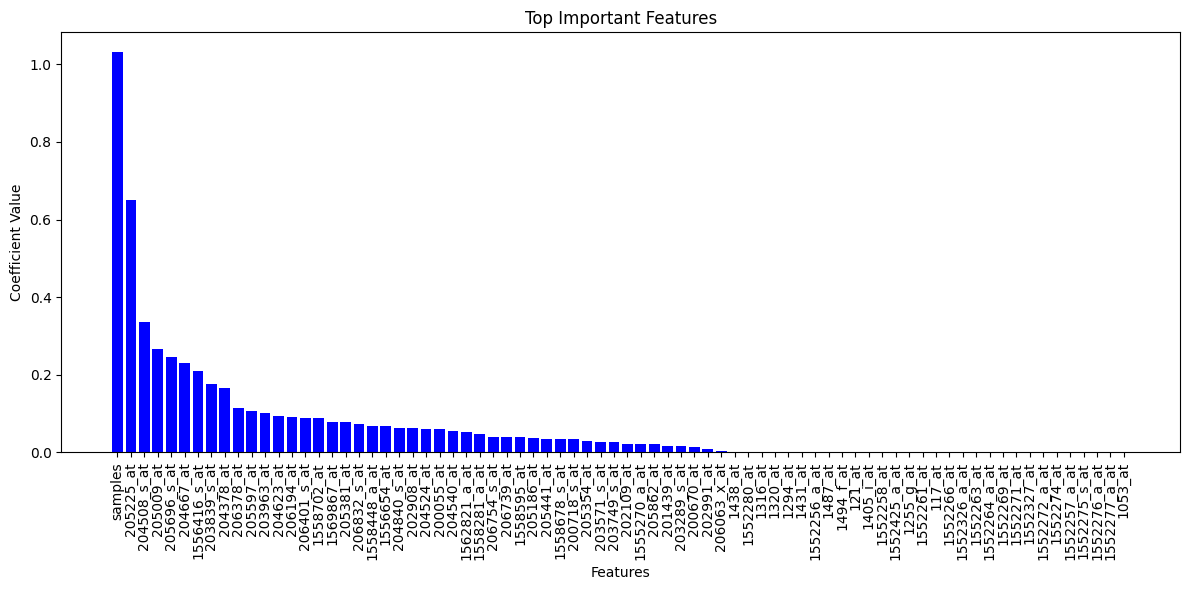

In [ ]:
# prompt: plot the bar chart for important features with coefficient value and different color with attribute names

import matplotlib.pyplot as plt

# Assuming 'feature_importance_df' is the DataFrame from the previous code
# containing feature names and their importances.

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top N important features (adjust N as needed)
top_n = 76  # Example: Top 20 features
top_features = feature_importance_df.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(top_features['Feature'], top_features['Importance'], color='blue')  # Set color
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Top Important Features')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

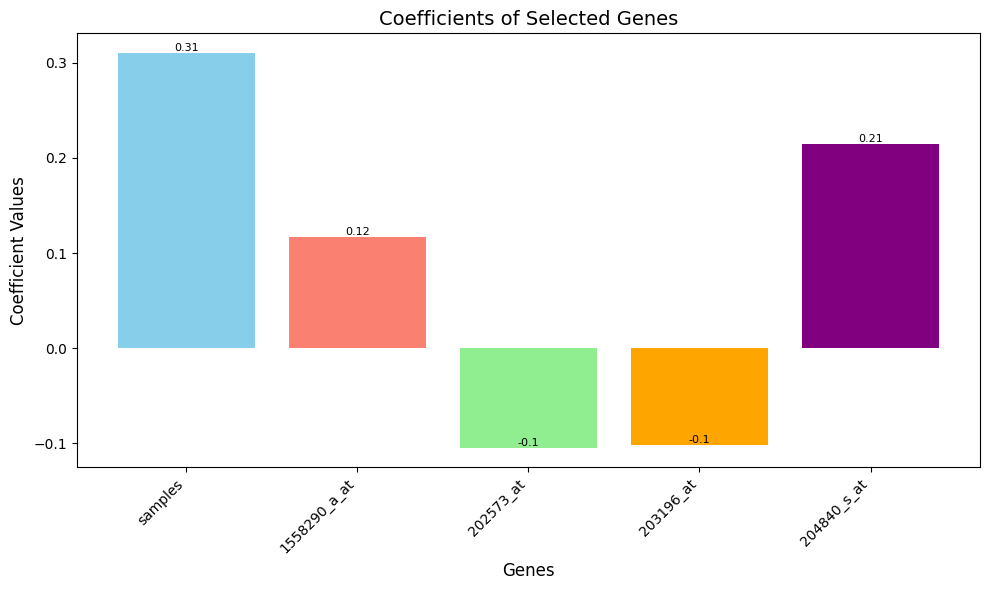

In [ ]:
# prompt: plot the bar chart for selected genes with different colors with its coefficient values print the name of the genes instead of gene1, gene2 etc

import matplotlib.pyplot as plt

# Assuming 'feature_importances' and 'X_train.columns' are defined from previous code
# Example data (replace with your actual data)
feature_importances = elastic_net.coef_
feature_names = X_train.columns

# Select features with absolute coefficient value above 0.1
selected_features = [name for name, importance in zip(feature_names, feature_importances) if abs(importance) > 0.1]
selected_importances = [importance for name, importance in zip(feature_names, feature_importances) if abs(importance) > 0.1]

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(selected_features, selected_importances, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'lightcoral'])

# Customize the chart
plt.xlabel("Genes", fontsize=12)
plt.ylabel("Coefficient Values", fontsize=12)
plt.title("Coefficients of Selected Genes", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()


# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()

In [ ]:
# prompt: create a dataset for selected genes

# Assuming 'selected_features' is the list of selected feature names from the previous code
# and 'df' is your original DataFrame

# Create a new DataFrame containing only the selected features and the target variable
selected_df = df[selected_features + ['type']]

# Now 'selected_df' contains only the data for the selected genes and the target variable.
print(selected_df.head())

    samples  1558290_a_at  202573_at  203196_at  204840_s_at   type
0  0.000000      0.464102   0.760164   0.587220     0.492873  basal
1  0.006494      0.313649   0.766998   0.205412     0.429962  basal
2  0.019481      0.363995   0.444242   0.570551     0.904333  basal
3  0.038961      0.455770   0.470825   0.352628     0.557836  basal
4  0.045455      0.600362   0.812353   0.455151     0.659982  basal


In [ ]:
import pandas as pd
!pip install biomart # Install the biomart library
from biomart import BiomartServer
import io # Import the io module

# Load gene attribute data (replace 'gene_data.csv' with your dataset)
# Assume the dataset contains a column 'Gene_ID' with probe IDs or Ensembl IDs

# Connect to the Ensembl BioMart server
server = BiomartServer("http://www.ensembl.org/biomart")
mart = server.datasets["hsapiens_gene_ensembl"]  # Human gene dataset

# Query Ensembl to get gene names
attributes = ["ensembl_gene_id", "external_gene_name"]
response = mart.search({
    "attributes": attributes
})

# Convert response content to a file-like object using io.StringIO
response_content = io.StringIO(response.text)

# Convert response to DataFrame using the file-like object
genes = pd.read_csv(response_content, sep="\t", names=attributes)

# Merge with original dataset to get gene names
df_mapped = selected_df.merge(genes, left_on="Gene_ID", right_on="ensembl_gene_id", how="left")

# Save or display results
df_mapped.to_csv("gene_data_mapped.csv", index=False)
print(df_mapped.head())

KeyError: 'Gene_ID'

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Load the gene expression dataset
# The dataset should have samples as columns and genes as rows
# Assume first column is "Gene_ID" and other columns are expression values
df = pd.read_csv("gene_expression.csv")

# Define sample groups (e.g., Normal vs. Cancer)
normal_samples = df.filter(like="Normal")  # Columns with 'Normal' in their names
cancer_samples = df.filter(like="Cancer")  # Columns with 'Cancer' in their names

# Compute Log2 Fold Change (LFC)
df["Fold_Change"] = np.log2(cancer_samples.mean(axis=1) / normal_samples.mean(axis=1))

# Perform t-test for statistical significance
df["p_value"] = [ttest_ind(cancer_samples.iloc[i], normal_samples.iloc[i], equal_var=False)[1] for i in range(len(df))]

# Apply Multiple Testing Correction (Benjamini-Hochberg FDR)
df["adjusted_p_value"] = multipletests(df["p_value"], method="fdr_bh")[1]

# Define DEG threshold (|LFC| > 1 & adjusted p-value < 0.05)
deg_criteria = (abs(df["Fold_Change"]) > 1) & (df["adjusted_p_value"] < 0.05)
df_deg = df[deg_criteria]

# Save DEGs to a new file
df_deg.to_csv("differentially_expressed_genes.csv", index=False)

# Display top DEGs
print(df_deg.head())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0 [D loss: 0 | D accuracy: 0] [G loss: 0]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


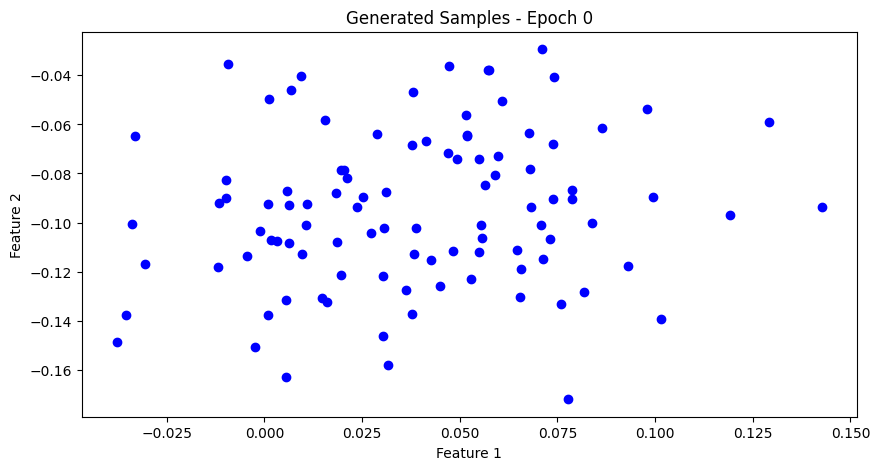

10 [D loss: 0 | D accuracy: 0] [G loss: 0]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


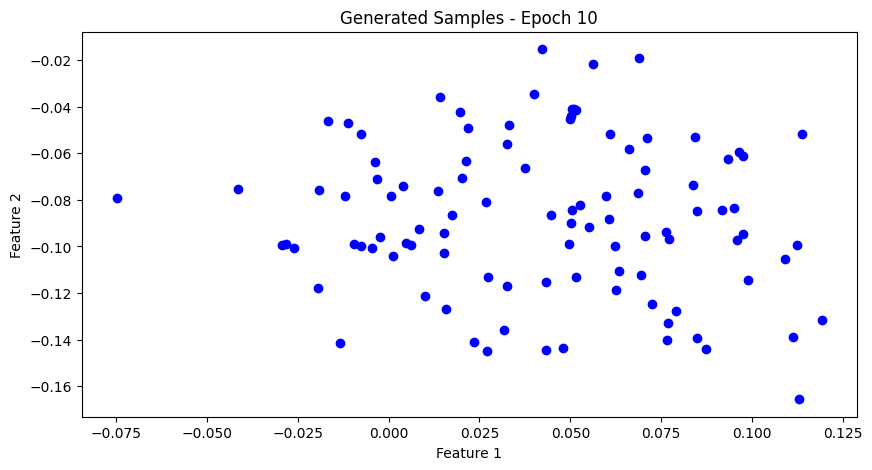

20 [D loss: 0 | D accuracy: 0] [G loss: 0]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


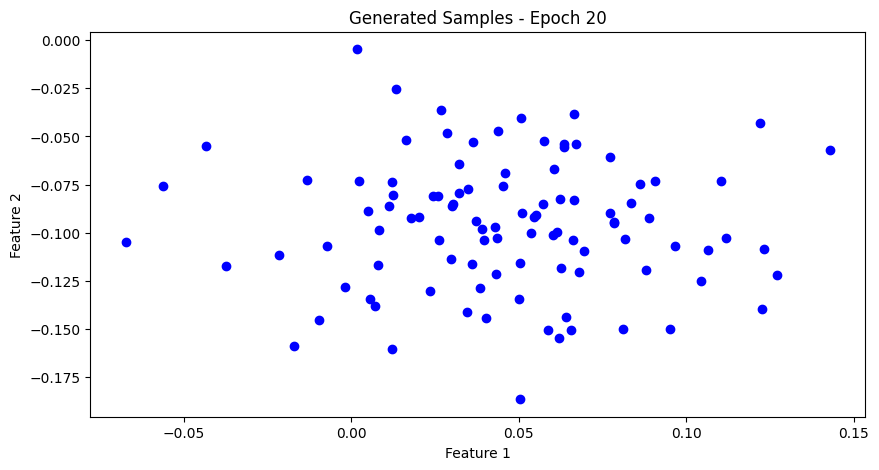

30 [D loss: 0 | D accuracy: 0] [G loss: 0]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


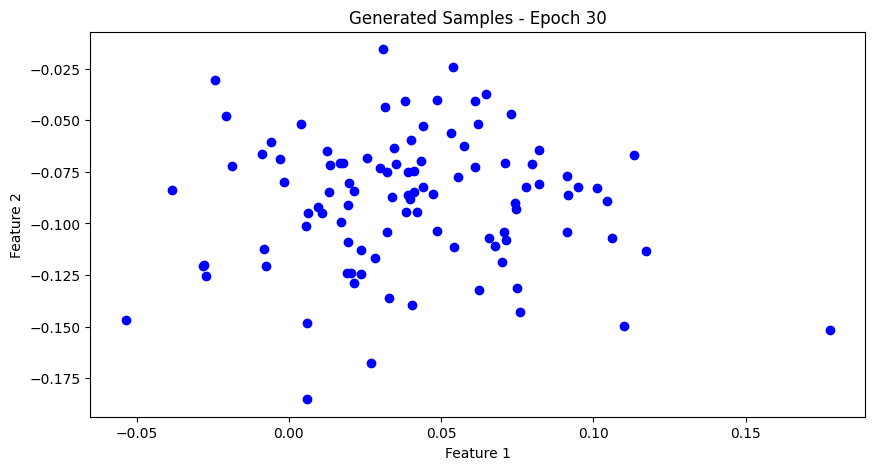

40 [D loss: 0 | D accuracy: 0] [G loss: 0]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


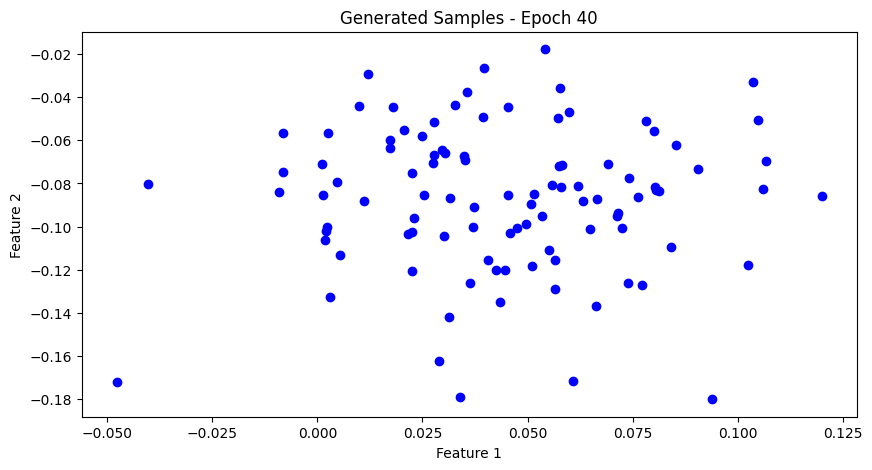

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Create a simple imbalanced binary dataset (for illustration)


# Split the dataset into minority and majority classes
# Split the dataset into minority and majority classes
# Assuming 'df' contains your features and 'type' is the target variable
X_minority = df[df['type'] == 0].drop('type', axis=1).values  # Get feature data for minority class
X_majority = df[df['type'] == 1].drop('type', axis=1).values  # Get feature data for majority class

# Ensure that X_minority is of type float
X_minority = X_minority.astype(np.float32)

# Normalize the data (Min-Max scaling)
#X_minority = (X_minority - np.min(X_minority, axis=0)) / (np.max(X_minority, axis=0) - np.min(X_minority, axis=0))

#The line below is changed to get the first element of the shape tuple, corresponding to the number of rows.
input_dim = X_minority.shape[1]  # Dimensionality of the input data (number of features)

# Define the GAN model
def build_generator(latent_dim, input_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    #Reshape the output to match the shape of input_dim
    model.add(layers.Dense(input_dim, activation='tanh'))  # Output layer, matching the shape of input data
    model.add(layers.Reshape((input_dim,)))
    return model

def build_discriminator(input_dim):
    model = models.Sequential()
    model.add(layers.Dense(512, input_dim=input_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary output: real or fake
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Set parameters
latent_dim = 100  # Latent space dimensionality


# Build the models
discriminator = build_discriminator(input_dim)
generator = build_generator(latent_dim, input_dim)
gan = build_gan(generator, discriminator)

# Compile the models
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer='adam')

# Function to train the GAN
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# ... (rest of the code is the same) ...

# Function to train the GAN
def train_gan(generator, discriminator, gan, X_minority, epochs=100, batch_size=64):
    batch_count = X_minority.shape[0] // batch_size

    for epoch in range(epochs):
        d_loss = [0, 0]  # Initialize d_loss before the loop to avoid UnboundLocalError
        g_loss = 0 # Initialize g_loss as well.
        for _ in range(batch_count):
            # Select random batch of real data
            idx = np.random.randint(0, X_minority.shape[0], batch_size)
            real_data = X_minority[idx]  # Select feature data directly

            # Generate fake data
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_data = generator.predict(noise)

            # Labels for real and fake data
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_data, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train the generator (via GAN)
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            g_loss = gan.train_on_batch(noise, real_labels)

        # Print the progress
        if epoch % 10 == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # Optionally, generate synthetic samples and visualize
        if epoch % 10 == 0:
            generate_samples(generator, epoch)


# Function to visualize generated samples
def generate_samples(generator, epoch, num_samples=100):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated_data = generator.predict(noise)

    plt.figure(figsize=(10, 5))
    plt.scatter(generated_data[:, 0], generated_data[:, 1], color='blue', label='Generated')
    plt.title(f"Generated Samples - Epoch {epoch}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Train the GAN
history = train_gan(generator, discriminator, gan, X_minority, epochs=50, batch_size=64)


In [ ]:
# prompt: after generating gan how to combine with original dataset with multiple classes for balancing

import pandas as pd
import numpy as np

# ... (Your existing code for GAN training) ...

# After training the GAN, generate synthetic minority class samples
num_synthetic_samples = len(X_majority) - len(X_minority) # Generate enough to balance
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
synthetic_samples = generator.predict(noise)


# Convert synthetic samples to DataFrame
synthetic_df = pd.DataFrame(synthetic_samples, columns=X.columns)
synthetic_df['type'] = 0  # Assign the minority class label


# Combine the synthetic samples with the original data
combined_df = pd.concat([df, synthetic_df], ignore_index=True)

# Now 'combined_df' contains the original data with the synthetic minority class samples added

# Shuffle the combined DataFrame to ensure randomness
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify class distribution in the combined dataset
print(combined_df['type'].value_counts())


# Now use combined_df as input for training
X_combined = combined_df.drop('type', axis=1)
y_combined = combined_df['type']


X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

print("X_train_combined shape:", X_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_train_combined shape:", y_train_combined.shape)
print("y_test_combined shape:", y_test_combined.shape)

# Proceed with your model training using X_train_combined, y_train_combined
# ...

In [ ]:
# prompt: after generating the synthetic data using GAN how to combine with original data for balancing

# Generate synthetic minority class samples
num_synthetic_samples = len(X_majority) - len(X_minority)  # Generate enough to match majority class
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
synthetic_samples = generator.predict(noise)

# Convert synthetic samples to DataFrame
synthetic_df = pd.DataFrame(synthetic_samples, columns=X.columns)
synthetic_df['type'] = 0  # Set the target variable for the synthetic samples


# Combine synthetic samples with original data
combined_df = pd.concat([df, synthetic_df], ignore_index=True)


# Verify the class distribution in the combined dataset
combined_class_counts = combined_df['type'].value_counts()
print(combined_class_counts)

# Now you have a balanced dataset in combined_df
# You can proceed with your model training using combined_df
X_combined = combined_df.drop('type', axis=1)
y_combined = combined_df['type']

# Split the combined data
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

In [ ]:
# prompt: select the important features by elastic net with coefficient value and rank

from sklearn.linear_model import ElasticNet
import numpy as np
import pandas as pd # Make sure pandas is imported

# Assuming X_resampled and y_resampled are defined from the previous code
X = X_resampled
# Instead of converting the whole Series to int, ensure y is a numerical
# representation of your classes. If 'y_resampled' is already numerical
# (e.g., 0, 1, 2 for different classes), you likely don't need any conversion.
# If it's categorical, use LabelEncoder:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y_resampled)

# Create and train the ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
model.fit(X, y)

# Get the coefficients of the features
coefficients = model.coef_

# Create a DataFrame to store the feature names and their coefficients
feature_coefficients = pd.DataFrame({'Feature': X_resampled.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
feature_coefficients = feature_coefficients.reindex(feature_coefficients.Coefficient.abs().sort_values(ascending=False).index)


# Print the feature coefficients
print(feature_coefficients)


# Calculate the rank of features based on the absolute value of their coefficients
feature_coefficients['Rank'] = feature_coefficients['Coefficient'].abs().rank(ascending=False)

# Display the ranked features with coefficients and rank
print(feature_coefficients)


# You can choose a threshold for the coefficient value to select important features
# For example, select features with absolute coefficient values greater than 0.1

important_features = feature_coefficients[feature_coefficients['Coefficient'].abs() != 0]
print("Important Features:")
important_features

NameError: name 'X_resampled' is not defined

In [ ]:
df1 = pd.concat([X, pd.DataFrame(y_resampled, columns=['type'])], axis=1) # Convert 'y' to a DataFrame before concatenation
print(df1.shape,X_resampled.shape, y_resampled.shape)
print(df1.head())

(244, 16384) (244, 16383) (244,)
    samples  1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at  \
0  0.000000   0.562294  0.594520  0.461277  0.413825   0.315540  0.457464   
1  0.006494   0.565008  0.624829  0.638405  0.604744   0.456949  0.670148   
2  0.019481   0.623076  0.816796  0.270016  0.606032   0.429293  0.355424   
3  0.038961   0.539950  0.398081  0.476398  0.203472   0.494749  0.753674   
4  0.045455   0.456358  0.501303  0.536045  0.402572   0.480984  0.692044   

    1316_at   1320_at  1405_i_at  ...  206927_s_at  206928_at  206929_s_at  \
0  0.185234  0.237430   0.637997  ...     0.211564   0.714523     0.842945   
1  0.281970  0.327875   0.497372  ...     0.068252   0.842624     0.736357   
2  0.097582  0.246094   0.707751  ...     0.093126   0.756021     0.491789   
3  0.492729  0.319419   0.657319  ...     0.086782   0.724701     0.423800   
4  0.423611  0.245698   0.705469  ...     0.158591   0.848593     0.577882   

   206930_at  206931_at  206932_at 

In [ ]:
# prompt: print number of features selected whose value is not equal to 0

# Count the number of features with non-zero coefficients
num_selected_features = len(important_features)

print("Number of selected features (non-zero coefficients):", num_selected_features)

Number of selected features (non-zero coefficients): 85


In [ ]:
# prompt: select top 50 ranked reatures

# Select the top 100 ranked features
top_10__features = feature_coefficients.sort_values('Rank').head(10)
# Print the top 100 ranked features
print(top_10__features)
top_25__features = feature_coefficients.sort_values('Rank').head(25)
top_50_features = feature_coefficients.sort_values('Rank').head(50)
top_100_features = feature_coefficients.sort_values('Rank').head(100)
# Print the top 100 ranked features
print(top_50_features)

# You can access the list of top 100 feature names using:
top_100_feature_names = top_50_features['Feature'].tolist()
top_50_feature_names = top_50_features['Feature'].tolist()

            Feature  Coefficient  Rank
0           samples     0.625633   1.0
14673     205225_at     0.440063   2.0
10620     201171_at    -0.266864   3.0
3766     1557617_at     0.263203   4.0
14361   204913_s_at    -0.260592   5.0
4041   1558080_s_at    -0.256593   6.0
14648     205200_at     0.220428   7.0
14362   204914_s_at    -0.181933   8.0
256    1552619_a_at    -0.181814   9.0
1089     1553749_at    -0.172785  10.0
            Feature  Coefficient  Rank
0           samples     0.625633   1.0
14673     205225_at     0.440063   2.0
10620     201171_at    -0.266864   3.0
3766     1557617_at     0.263203   4.0
14361   204913_s_at    -0.260592   5.0
4041   1558080_s_at    -0.256593   6.0
14648     205200_at     0.220428   7.0
14362   204914_s_at    -0.181933   8.0
256    1552619_a_at    -0.181814   9.0
1089     1553749_at    -0.172785  10.0
10895   201446_s_at    -0.165329  11.0
5300     1560342_at    -0.163237  12.0
13133     203685_at     0.146062  13.0
14288   204840_s_at     0

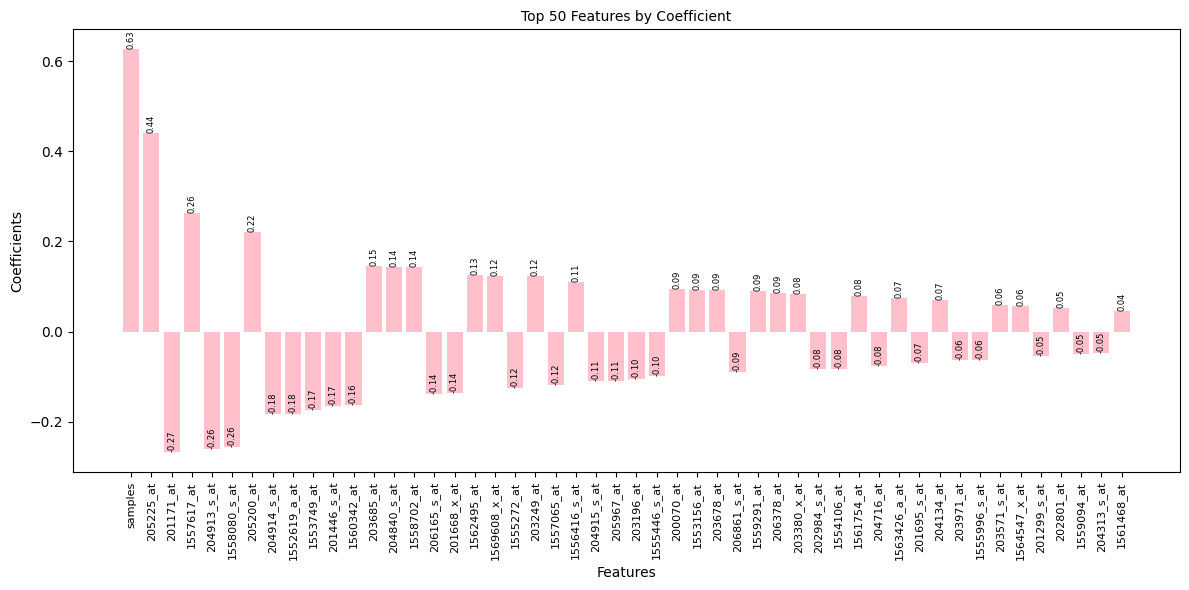

In [ ]:
# prompt:  plot bar chart for the selected features based on rank and coefficient with different color with its coefficient values,  values in 90 degree rotation without overlay to next value, minimize the font size of the label

import matplotlib.pyplot as plt

# Assuming 'top_50_features' DataFrame is available from the previous code

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
bars = plt.bar(top_50_features['Feature'], top_50_features['Coefficient'], color='pink')

# Add coefficient values on top of each bar
for bar, coeff in zip(bars, top_50_features['Coefficient']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{coeff:.2f}',
             ha='center', va='bottom', fontsize=6, rotation=90)  # Minimize font size


plt.xlabel('Features', fontsize=10) # minimize font size
plt.ylabel('Coefficients', fontsize=10) # minimize font size
plt.title('Top 50 Features by Coefficient', fontsize=10)
plt.xticks(rotation=90, fontsize=8) # Rotate x-axis labels and minimize font size
plt.tight_layout() # prevent labels from overlapping
plt.show()

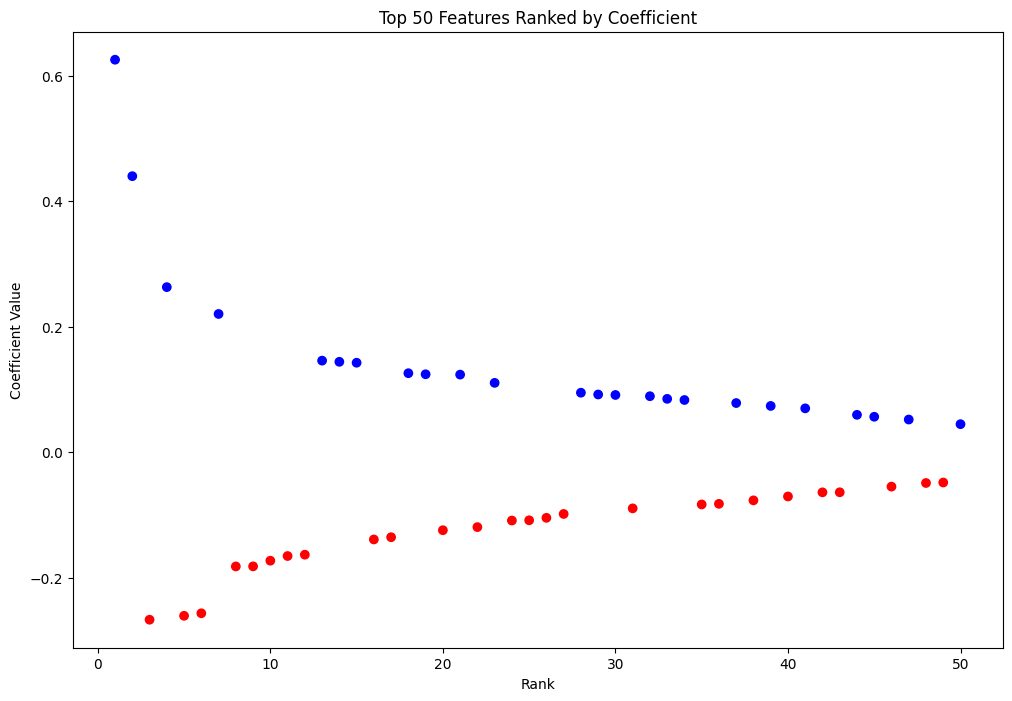

In [ ]:
# prompt: plot chart for coefficient against rank with different colour

# Assuming you have 'top_50_features' DataFrame defined from the previous code

# Create a scatter plot of the top 50 features based on rank and coefficient
plt.figure(figsize=(12, 8))

# Assign different colors based on the sign of the coefficient
colors = ['red' if coef < 0 else 'blue' for coef in top_50_features['Coefficient']]

plt.scatter(top_50_features['Rank'], top_50_features['Coefficient'], c=colors)
plt.xlabel('Rank')
plt.ylabel('Coefficient Value')
plt.title('Top 50 Features Ranked by Coefficient')
plt.show()

In [ ]:
# prompt: plot the correlation for top 50 ranked features

import pandas as pd  # Import pandas
import matplotlib.pyplot as plt

# Assuming 'top_50_features' contains the top 50 features and 'y' contains the target variable
# Create a DataFrame with the selected features, but selecting the original data columns
# associated with these top 50 features for correlation analysis
# Assuming you have your original data in a DataFrame called 'original_data'
# and that 'top_50_features' contains a column 'Feature' with the names of the top 50 features

# Extract the names of the top 50 features
top_50_feature_names = top_50_features['Feature'].tolist()

# Subset the original data with the selected features
X_top_50 = df[top_50_feature_names] # Select those features from your original dataset

# Calculate the correlation matrix using the DataFrame
correlation_matrix = X_top_50.corr() # Now use .corr() on the dataframe, not the list

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix of Top 50 Ranked Features')
plt.xticks(range(len(X_top_50.columns)), X_top_50.columns, rotation=90)
plt.yticks(range(len(X_top_50.columns)), X_top_50.columns)
plt.show()

NameError: name 'top_50_features' is not defined

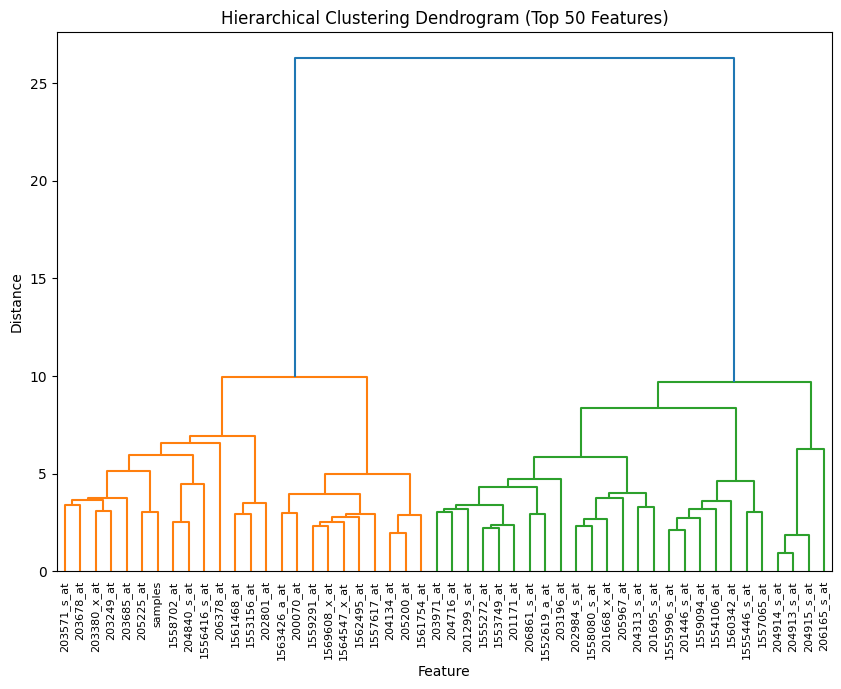

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming top_10_feature_names and top_50_feature_names contain the names of your top 10 and top 50 features
# Replace this with your actual list of feature names.

# Assuming X is your DataFrame with the selected features.

top_50_feature_names = top_50_features['Feature'].tolist()
X_top_50 = X[top_50_feature_names]

# Perform hierarchical clustering using X_top_50 instead of X_top_10
linked = linkage(X_top_50.T, 'ward')  # Use 'ward' linkage for minimizing variance within clusters and transpose X_top_50

# Plot the dendrogram, using top_50_feature_names as labels for consistency
plt.figure(figsize=(10, 7))
# The labels should correspond to the columns (features) of X_top_50
dendrogram(linked, orientation='top', labels=top_50_feature_names, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Top 50 Features)') # Update title for clarity
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.show()

In [ ]:
import pandas as pd

# Assuming X_top_50 is a DataFrame with samples as rows and genes as columns
# and class_labels is a list or array containing class names corresponding to each sample

# Example data (replace these with actual data)
# X_top_50 = pd.DataFrame(...)  # Your top 50 genes data
# class_labels = [...]           # Your class labels (length should match X_top_50 rows)
class_labels = df1['type']
# Check the lengths of X_top_50 and class_labels
print(f"Length of X_top_50: {len(X_top_50)}")
print(f"Length of class_labels: {len(class_labels)}")

# If lengths don't match, investigate and fix the data
# ... (Code to address the length mismatch) ...

# Step 1: Ensure class_labels is a pandas Series (optional)
class_labels_series = pd.Series(class_labels, name='type')

# Step 2: Combine X_top_50 with class labels
# Make sure class_labels_series has the same length as X_top_50
if len(class_labels_series) != len(X_top_50):
    raise ValueError("Length of class_labels_series does not match length of X_top_50")
df_combined = X_top_50.copy()
df_combined['type'] = class_labels_series.values  # Now this should work without error

# Step 3: Display the resulting DataFrame
print(df_combined.head())
print(df_combined['type'].value_counts())

# Optional: Save the DataFrame to a CSV file
df_combined.to_csv('top_50_genes_with_classes.csv', index=False)

Length of X_top_50: 244
Length of class_labels: 244
    samples  205225_at  201171_at  1557617_at  204913_s_at  1558080_s_at  \
0  0.000000   0.263762   0.501562    0.335557     0.678688      0.765750   
1  0.006494   0.085085   0.615926    0.270424     0.656167      0.638629   
2  0.019481   0.222064   0.393416    0.133825     0.021948      0.661183   
3  0.038961   0.227845   0.600525    0.359668     0.621210      0.734481   
4  0.045455   0.187476   0.697318    0.329660     0.575169      0.775335   

   205200_at  204914_s_at  1552619_a_at  1553749_at  ...  203971_at  \
0   0.222280     0.638743      0.910470    0.591257  ...   0.535613   
1   0.100084     0.654906      0.722563    0.686626  ...   0.630273   
2   0.036577     0.005156      0.873107    0.743406  ...   0.446768   
3   0.126712     0.599238      0.547430    0.713841  ...   0.668979   
4   0.057372     0.549048      0.706298    0.707980  ...   0.537679   

   1555996_s_at  203571_s_at  1564547_x_at  201299_s_at  202801_

In [ ]:
# prompt: read a csv file

# The code to read the CSV file is already present in the provided code:
df2 = pd.read_csv('top_50_genes_with_classes.csv')
print(df2.head())
# You can use the 'df' DataFrame to access the data.

    samples  205225_at  201171_at  1557617_at  204913_s_at  1558080_s_at  \
0  0.000000   0.263762   0.501562    0.335557     0.678688      0.765750   
1  0.006494   0.085085   0.615926    0.270424     0.656167      0.638629   
2  0.019481   0.222064   0.393416    0.133825     0.021948      0.661183   
3  0.038961   0.227845   0.600525    0.359668     0.621210      0.734481   
4  0.045455   0.187476   0.697318    0.329660     0.575169      0.775335   

   205200_at  204914_s_at  1552619_a_at  1553749_at  ...  203971_at  \
0   0.222280     0.638743      0.910470    0.591257  ...   0.535613   
1   0.100084     0.654906      0.722563    0.686626  ...   0.630273   
2   0.036577     0.005156      0.873107    0.743406  ...   0.446768   
3   0.126712     0.599238      0.547430    0.713841  ...   0.668979   
4   0.057372     0.549048      0.706298    0.707980  ...   0.537679   

   1555996_s_at  203571_s_at  1564547_x_at  201299_s_at  202801_at  \
0      0.782692     0.167133      0.284782    

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Step 1: Load the dataset (example format: rows=genes, columns=samples, classes in metadata)
# Assuming 'data.csv' has gene expression values, and 'class_labels.csv' has class information

# Example DataFrame setup
expression_data = df2.drop(columns=['type'])  # Gene expression data (excluding 'type' column)
class_labels = df2['type']  # Class labels

# Step 2: Select the top 50 genes based on variance (or another criterion)
top_genes_data = expression_data  # Assuming you've already selected top genes (can use variance or any other method)

# Step 3: Perform ANOVA for each gene across the 6 classes
# Merge class labels with gene data
data_transposed = pd.concat([class_labels, top_genes_data], axis=1)

# Ensure that no duplicate column names exist
data_transposed = data_transposed.loc[:, ~data_transposed.columns.duplicated()]

# Perform ANOVA
deg_results = {}
for gene in top_genes_data.columns:  # Loop over genes (columns)
    class_groups = [data_transposed[data_transposed['type'] == cls][gene] for cls in np.unique(class_labels)]
    stat, p_value = f_oneway(*class_groups)
    deg_results[gene] = p_value

# Step 4: Identify significant DEGs (e.g., p-value < 0.05)
deg_results_df = pd.DataFrame(list(deg_results.items()), columns=['Gene', 'P_Value'])
significant_degs = deg_results_df[deg_results_df['P_Value'] < 0.05]

# Display or save the results
print("Significant Differentially Expressed Genes:")
print(significant_degs)

# Optional: Save results to a CSV file
significant_degs.to_csv('significant_degs.csv', index=False)


Significant Differentially Expressed Genes:
            Gene        P_Value
0        samples   2.033797e-98
1      205225_at   1.154463e-94
2      201171_at   1.854736e-69
3     1557617_at   3.013991e-54
4    204913_s_at   5.787449e-48
5   1558080_s_at   1.766653e-75
6      205200_at  1.146675e-107
7    204914_s_at   3.630208e-44
8   1552619_a_at  6.115792e-117
9     1553749_at   8.576634e-54
10   201446_s_at   2.906373e-51
11    1560342_at   3.069367e-97
12     203685_at   1.139104e-69
13   204840_s_at   1.131816e-15
14    1558702_at   8.999364e-29
15   206165_s_at   9.008749e-23
16   201668_x_at   6.912313e-50
17    1562495_at   4.389906e-70
18  1569608_x_at   4.041644e-79
19    1555272_at   4.418825e-63
20     203249_at   8.142814e-78
21    1557065_at   6.870185e-63
22  1556416_s_at   3.531223e-45
23   204915_s_at   2.285849e-37
24     205967_at   5.248791e-55
25     203196_at   1.119592e-22
26  1555446_s_at   2.916028e-49
27     200070_at   9.001118e-34
28    1553156_at   5.393413e

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

# Step 1: Perform ANOVA for each gene (this part assumes you already have p-values)
deg_results = {}
for gene in top_genes_data.columns:  # Loop over genes (columns)
    class_groups = [data_transposed[data_transposed['type'] == cls][gene] for cls in np.unique(class_labels)]
    stat, p_value = f_oneway(*class_groups)
    deg_results[gene] = p_value

# Step 2: Store p-values in DataFrame
deg_results_df = pd.DataFrame(list(deg_results.items()), columns=['Gene', 'P_Value'])

# Step 3: Apply Benjamini-Hochberg (FDR) correction
deg_results_df['Adjusted_P_Value_BH'] = multipletests(deg_results_df['P_Value'], method='fdr_bh')[1]

# Step 4: Filter significant genes (with adjusted p-value < 0.05)
significant_degs_bh = deg_results_df[deg_results_df['Adjusted_P_Value_BH'] < 0.05]

# Display significant genes
print("Significant Differentially Expressed Genes (after FDR correction):")
print(significant_degs_bh)

# Optional: Save results
significant_degs_bh.to_csv('significant_degs_bh.csv', index=False)


Significant Differentially Expressed Genes (after FDR correction):
            Gene        P_Value  Adjusted_P_Value_BH
0        samples   2.033797e-98         2.542246e-97
1      205225_at   1.154463e-94         9.620525e-94
2      201171_at   1.854736e-69         5.796051e-69
3     1557617_at   3.013991e-54         5.581464e-54
4    204913_s_at   5.787449e-48         8.038123e-48
5   1558080_s_at   1.766653e-75         6.794820e-75
6      205200_at  1.146675e-107        1.911125e-106
7    204914_s_at   3.630208e-44         4.776590e-44
8   1552619_a_at  6.115792e-117        1.528948e-115
9     1553749_at   8.576634e-54         1.531542e-53
10   201446_s_at   2.906373e-51         5.010987e-51
11    1560342_at   3.069367e-97         3.069367e-96
12     203685_at   1.139104e-69         3.797012e-69
13   204840_s_at   1.131816e-15         1.131816e-15
14    1558702_at   8.999364e-29         9.573792e-29
15   206165_s_at   9.008749e-23         9.384114e-23
16   201668_x_at   6.912313e-50 

In [ ]:
# Remove None values using filter()
cleaned_dict = dict(filter(lambda item: item[1] is not None, gene_dict.items()))
print(cleaned_dict)


{'205225_at': 'LOC205225', '201171_at': 'LOC201171', '204913_s_at': 'LOC204913', '205200_at': 'LOC205200', '204914_s_at': 'LOC204914', '201446_s_at': 'LOC201446', '203685_at': 'LOC203685', '204840_s_at': 'LOC204840', '206165_s_at': 'LOC206165', '201668_x_at': 'LOC201668', '203249_at': 'LOC203249', '204915_s_at': 'LOC204915', '205967_at': 'LOC205967', '203196_at': 'LOC203196', '200070_at': 'LOC200070', '203678_at': 'LOC203678', '206861_s_at': 'LOC206861', '206378_at': 'LOC206378', '203380_x_at': 'LOC203380', '202984_s_at': 'LOC202984', '204716_at': 'LOC204716', '201695_s_at': 'LOC201695', '204134_at': 'LOC204134', '203971_at': 'LOC203971', '203571_s_at': 'LOC203571', '201299_s_at': 'RDM1', '202801_at': 'LOC202801', '204313_s_at': 'LOC204313'}


In [ ]:
#identifying gene name
!pip install biopython
from Bio import Entrez


def get_gene_name(gene_id):
    try:
        # Search NCBI database for the given gene ID
        handle = Entrez.efetch(db="gene", id=gene_id, rettype="xml")
        records = Entrez.read(handle)

        # Extract gene name from the record
        gene_name = records[0]['Entrezgene_gene']['Gene-ref']['Gene-ref_locus']
        return gene_name
    except Exception as e:
        print("")
gene_dict = {}
# Example usage:
for gene_id in significant_degs_bh['Gene']:
    # Check if gene_id is a valid string
    if isinstance(gene_id, str):
        gene_name = get_gene_name(gene_id)
        # Update gene_dict with a key-value pair using square brackets
        gene_dict[gene_id] = gene_name
        print(f"Gene Name for {gene_id}: {gene_name}")
    else:
        print(f"Skipping invalid gene ID: {gene_id}")
print(gene_dict)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.4 MB/s eta 0:00:00


NameError: name 'significant_degs_bh' is not defined

In [ ]:
# prompt: extract the data from df1 for the cleaned dictionary key values mapped

# Assuming 'cleaned_dict' and 'df1' are defined from the previous code

# Create a list to store the extracted data
extracted_data = []

# Iterate through the cleaned dictionary
for key, value in cleaned_dict.items():
    # Check if the key exists in df1 columns
    if key in df1.columns:
        # Extract the data for the current key
        extracted_data.append(df1[key])
    else:
        print(f"Key '{key}' not found in df1 columns.")

# Create a new DataFrame from the extracted data (if any)
if extracted_data:
    extracted_df = pd.concat(extracted_data, axis=1)
    print(extracted_df)
else:
    print("No matching keys found in df1.  extracted_df is empty.")
extracted_df = pd.concat([extracted_df, y_resampled], axis=1)
print(extracted_df.head())
print(extracted_df.shape)

     205225_at  201171_at  204913_s_at  205200_at  204914_s_at  201446_s_at  \
0     0.263762   0.501562     0.678688   0.222280     0.638743     0.856094   
1     0.085085   0.615926     0.656167   0.100084     0.654906     0.982075   
2     0.222064   0.393416     0.021948   0.036577     0.005156     0.810205   
3     0.227845   0.600525     0.621210   0.126712     0.599238     0.722671   
4     0.187476   0.697318     0.575169   0.057372     0.549048     0.784919   
..         ...        ...          ...        ...          ...          ...   
239   0.586278   0.073306     0.153542   0.808306     0.136048     0.029439   
240   0.469415   0.153278     0.148741   0.927889     0.110922     0.097068   
241   0.527390   0.135828     0.295606   0.796832     0.255011     0.124855   
242   0.653254   0.001450     0.128907   0.891524     0.179125     0.281877   
243   0.624433   0.077916     0.149747   0.826334     0.195460     0.171109   

     203685_at  204840_s_at  206165_s_at  201668_x_

In [ ]:
import pandas as pd
from scipy import stats

# Assuming extracted_df has the format where genes are columns, and 'Class_Label' is the last column
# We will perform a t-test for each gene comparing 'Cancer' vs 'Normal' class labels
# Use isin() to check for multiple values in the 'type' column
cancer_data = extracted_df[extracted_df['type'].isin(['basal', 'cell_line', "HER", 'luminal_A', 'luminal_B'])].drop('type', axis=1, errors='ignore')
# errors='ignore' to avoid error if 'Class_Label' doesn't exist
normal_data = extracted_df[extracted_df['type'] == 'normal'].drop('type', axis=1, errors='ignore')
# Initialize lists to store results
p_values = []

# Perform a t-test for each gene (column) to compare expression between Cancer and Normal
for gene in cancer_data.columns:
    t_stat, p_value = stats.ttest_ind(cancer_data[gene], normal_data[gene], nan_policy='omit')  # omitting NaNs
    p_values.append(p_value)

# Add p-values to the extracted_df for each gene
degs = pd.DataFrame({
    'Gene': cancer_data.columns,
    'P_Value': p_values
})

# Apply a significance threshold (e.g., FDR correction or a simple p-value threshold)
alpha = 0.05  # 5% significance level
degs['Significant'] = degs['P_Value'] < alpha

# Optionally, adjust for multiple comparisons using the Benjamini-Hochberg procedure
from statsmodels.stats.multitest import multipletests
degs['Adj_P_Value'] = multipletests(degs['P_Value'], method='fdr_bh')[1]

# Display the results
print(degs[degs['Significant']])

# Optionally, print all the genes with adjusted p-values for further analysis
print(degs)

           Gene       P_Value  Significant   Adj_P_Value
0     205225_at  3.548504e-03         True  3.548504e-03
1     201171_at  9.199424e-31         True  2.862043e-30
2   204913_s_at  1.514476e-05         True  1.766888e-05
3     205200_at  7.454796e-73         True  2.087343e-71
4   204914_s_at  1.201110e-06         True  1.528686e-06
5   201446_s_at  2.197741e-31         True  7.692094e-31
6     203685_at  3.325532e-12         True  4.900784e-12
7   204840_s_at  1.125258e-03         True  1.211816e-03
8   206165_s_at  2.009409e-03         True  2.083832e-03
9   201668_x_at  1.309231e-22         True  2.819882e-22
10    203249_at  4.335567e-54         True  3.034897e-53
11  204915_s_at  4.542468e-05         True  5.087565e-05
12    205967_at  6.781028e-06         True  8.255164e-06
13    203196_at  6.003235e-13         True  9.887682e-13
14    200070_at  3.206455e-19         True  5.985383e-19
15    203678_at  9.976922e-23         True  2.327948e-22
16  206861_s_at  1.051113e-21  

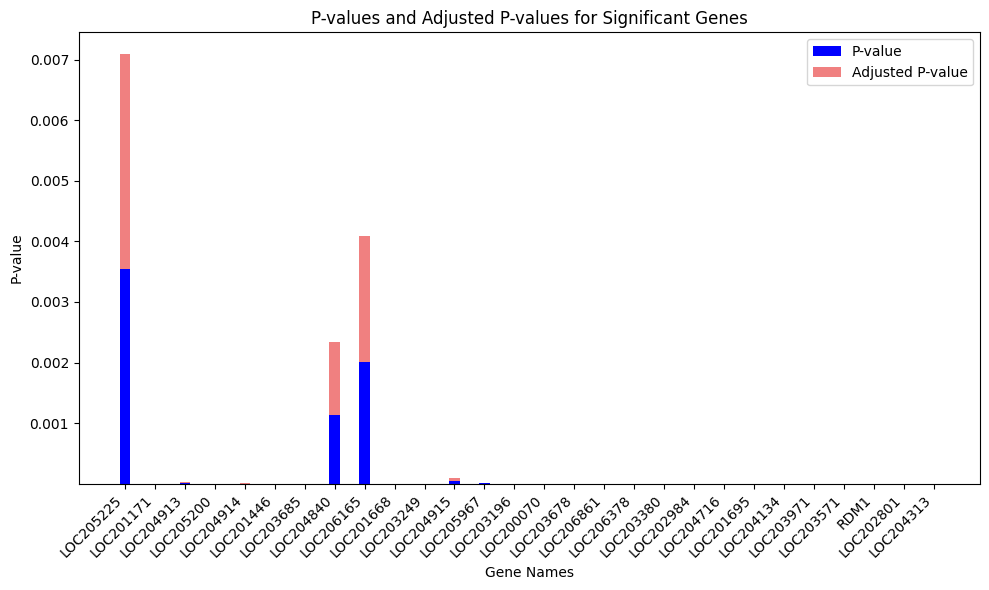

In [ ]:
# prompt: print the gene names for the gene_id  in the stacked bar chart only the significant is true for  plotingt the p_value and adjusted p_value in stacked bar chart with gene names with different colors

# Assuming 'degs' DataFrame is available from the previous code
# and contains 'Gene', 'P_Value', 'Significant', and 'Adj_P_Value' columns

import matplotlib.pyplot as plt

# Filter for significant genes
significant_genes = degs[degs['Significant']]

# Extract data for plotting
gene_names = [cleaned_dict.get(gene_id) for gene_id in significant_genes['Gene']]
p_values = significant_genes['P_Value']
adj_p_values = significant_genes['Adj_P_Value']

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plot p-values
plt.bar(gene_names, p_values, bar_width, label='P-value', color='blue')

# Plot adjusted p-values on top of the p-values
plt.bar(gene_names, adj_p_values, bar_width, bottom=p_values, label='Adjusted P-value', color='lightcoral')


# Customize the chart
plt.xlabel('Gene Names')
plt.ylabel('P-value')
plt.title('P-values and Adjusted P-values for Significant Genes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: disease gene identification

# Assuming 'cleaned_dict' and 'df1' are defined from the previous code

# Create a list to store the extracted data
extracted_data = []

# Iterate through the cleaned dictionary
for key, value in cleaned_dict.items():
    # Check if the key exists in df1 columns
    if key in df1.columns:
        # Extract the data for the current key
        extracted_data.append(df1[key])
    else:
        print(f"Key '{key}' not found in df1 columns.")

# Create a new DataFrame from the extracted data (if any)
if extracted_data:
    extracted_df = pd.concat(extracted_data, axis=1)
    print(extracted_df.head())
else:
    print("No matching keys found in df1.  extracted_df is empty.")
extracted_df = pd.concat([extracted_df, y_resampled], axis=1)
print(extracted_df.head())
extracted_df.shape

   205225_at  201171_at  204913_s_at  205200_at  204914_s_at  201446_s_at  \
0   0.263762   0.501562     0.678688   0.222280     0.638743     0.856094   
1   0.085085   0.615926     0.656167   0.100084     0.654906     0.982075   
2   0.222064   0.393416     0.021948   0.036577     0.005156     0.810205   
3   0.227845   0.600525     0.621210   0.126712     0.599238     0.722671   
4   0.187476   0.697318     0.575169   0.057372     0.549048     0.784919   

   203685_at  204840_s_at  206165_s_at  201668_x_at  ...  203380_x_at  \
0   0.560049     0.492873     0.007344     0.840318  ...     0.137738   
1   0.138319     0.429962     0.041730     0.853842  ...     0.173920   
2   0.497236     0.904333     0.022208     0.699993  ...     0.099058   
3   0.516176     0.557836     0.090024     1.000000  ...     0.250721   
4   0.375467     0.659982     0.000000     0.802203  ...     0.350572   

   202984_s_at  204716_at  201695_s_at  204134_at  203971_at  203571_s_at  \
0     0.495262   0.61

(244, 29)

In [ ]:
# prompt: write extracted_df to csv file

extracted_df.to_csv('extracted_data.csv', index=False)
from google.colab import files
files.download('extracted_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: differential expressed genes

# Assuming 'extracted_df' and 'y_resampled' are defined from the previous code

# Perform t-tests between all pairs of cancer subtypes
cancer_subtypes = ['basal', 'cell_line', 'HER', 'luminal_A', 'luminal_B']
results = {}

for i in range(len(cancer_subtypes)):
    for j in range(i + 1, len(cancer_subtypes)):
        subtype1 = cancer_subtypes[i]
        subtype2 = cancer_subtypes[j]

        group1 = extracted_df[extracted_df['type'] == subtype1].drop('type', axis=1, errors='ignore')
        group2 = extracted_df[extracted_df['type'] == subtype2].drop('type', axis=1, errors='ignore')

        p_values = []
        for gene in group1.columns:
          t_stat, p_value = stats.ttest_ind(group1[gene], group2[gene], nan_policy='omit')  # omitting NaNs
          p_values.append(p_value)

        results[(subtype1, subtype2)] = p_values

# Convert results to a DataFrame for better visualization and analysis
results_df = pd.DataFrame(results)
results_df['Gene'] = group1.columns # gene names
results_df = results_df.set_index('Gene')
print(results_df)

# Apply FDR correction to p-values
adjusted_p_values = multipletests(results_df.values.flatten(), method='fdr_bh')[1].reshape(results_df.shape)
adjusted_results_df = pd.DataFrame(adjusted_p_values, columns=results_df.columns, index=results_df.index)
adjusted_results_df

                    basal                                            \
                cell_line           HER     luminal_A     luminal_B   
Gene                                                                  
205225_at    2.830615e-01  2.304298e-01  8.347451e-34  5.368375e-32   
201171_at    1.153122e-01  1.884599e-01  9.273096e-21  2.880460e-12   
204913_s_at  6.490917e-11  5.466312e-04  1.895188e-16  1.322810e-09   
205200_at    4.983999e-03  6.742625e-02  9.458432e-14  5.297139e-10   
204914_s_at  3.969837e-10  1.051759e-03  1.750648e-13  3.311314e-07   
201446_s_at  2.894044e-09  7.760915e-01  1.420590e-03  8.411930e-11   
203685_at    6.766063e-07  1.796555e-02  5.776075e-24  3.199813e-07   
204840_s_at  2.160831e-04  6.351085e-01  2.100852e-06  1.058068e-08   
206165_s_at  2.294443e-04  9.345691e-15  3.418981e-04  1.755243e-02   
201668_x_at  1.064367e-05  9.939272e-01  3.331820e-15  1.419373e-17   
203249_at    2.569545e-10  3.855821e-05  6.502580e-06  5.857033e-02   
204915

basal                                            \
                cell_line           HER     luminal_A     luminal_B   
Gene                                                                  
205225_at    3.183021e-01  2.622779e-01  3.338981e-32  1.878931e-30   
201171_at    1.391699e-01  2.198699e-01  1.081861e-19  9.957147e-12   
204913_s_at  1.997205e-10  8.318301e-04  1.326632e-15  3.336818e-09   
205200_at    6.977599e-03  8.280417e-02  3.952777e-13  1.395034e-09   
204914_s_at  1.079179e-09  1.549961e-03  7.002591e-13  6.622628e-07   
201446_s_at  6.985622e-09  8.048356e-01  2.082541e-03  2.505681e-10   
203685_at    1.297601e-06  2.350632e-02  8.512111e-23  6.445666e-07   
204840_s_at  3.399060e-04  6.761611e-01  3.895620e-06  2.448423e-08   
206165_s_at  3.589073e-04  4.672845e-14  5.289031e-04  2.307362e-02   
201668_x_at  1.862642e-05  9.939272e-01  1.760207e-14  1.074120e-16   
203249_at    7.267399e-10  6.313626e-05  1.152356e-05  7.224534e-02   
204915_s_at  5.245087e-06  4.588423e-04  4.094091e-11  2.339356e-06   
205967_at    7.302461e-03  1.159602e-03  5.832470e-24  3.346357e-23   
203196_at    4.920307e-01  1.731297e-02  2.339356e-06  5.286445e-05   
200070_at    3.228275e-01  8.868758e-01  1.178920e-03  7.518574e-09   
203678_at    2.698485e-02  1.188776e-02  1.914261e-05  5.576834e-04   
206861_s_at  2.761665e-03  8.921401e-02  1.119919e-14  2.797354e-11   
206378_at    3.529918e-02  7.327298e-08  2.217559e-11  6.650375e-15   
203380_x_at  8.224767e-06  2.624849e-02  1.381371e-29  3.255180e-13   
202984_s_at  7.178769e-03  5.932980e-01  6.588915e-09  2.937424e-10   
204716_at    7.675946e-03  2.395987e-03  2.355607e-07  5.359514e-06   
201695_s_at  4.373705e-02  5.423961e-01  1.208535e-15  1.924512e-07   
204134_at    5.474761e-02  4.713760e-01  6.064003e-10  1.322030e-07   
203971_at    1.558697e-01  5.046288e-02  1.497504e-07  1.724514e-04   
203571_s_at  2.657824e-01  4.031954e-10  3.139411e-24  1.566495e-22   
201299_s_at  1.325629e-04  8.674536e-01  6.594837e-12  4.695140e-13   
202801_at    8.594694e-14  5.925742e-01  2.615025e-11  1.164831e-09   
204313_s_at  2.684277e-05  8.173149e-01  8.340474e-04  2.093386e-07   

                cell_line                                       HER  \
                      HER     luminal_A     luminal_B     luminal_A   
Gene                                                                  
205225_at    1.619141e-02  1.214622e-35  3.843178e-34  4.287870e-35   
201171_at    5.698687e-03  3.738377e-19  3.725937e-10  2.788873e-21   
204913_s_at  6.256879e-18  7.169609e-01  9.050283e-02  3.235229e-26   
205200_at    6.471310e-08  2.939865e-24  1.111756e-19  2.258392e-12   
204914_s_at  1.167920e-17  7.741103e-01  2.901389e-02  2.249435e-24   
201446_s_at  2.382920e-10  2.272616e-05  9.387409e-01  1.690306e-04   
203685_at    6.803166e-04  2.246770e-33  6.687696e-17  2.246770e-33   
204840_s_at  8.348714e-04  1.772711e-02  2.684277e-05  7.686624e-06   
206165_s_at  1.171122e-06  7.479657e-01  1.849208e-01  1.232688e-07   
201668_x_at  3.460220e-05  1.563227e-05  8.176500e-07  9.004130e-14   
203249_at    5.600796e-02  1.632910e-24  1.637189e-11  5.469745e-15   
204915_s_at  2.657464e-13  1.831361e-01  6.408709e-01  7.507533e-21   
205967_at    9.631318e-01  1.506125e-15  2.889798e-14  3.440347e-19   
203196_at    7.675946e-03  5.692257e-03  1.394660e-02  8.385815e-08   
200070_at    1.595935e-01  3.399492e-03  8.405542e-10  1.108008e-05   
203678_at    6.229014e-01  5.729179e-13  7.055173e-09  1.385295e-12   
206861_s_at  7.336520e-07  1.598633e-23  4.155064e-19  8.594694e-14   
206378_at    2.306027e-10  1.961974e-15  1.086394e-19  8.629166e-01   
203380_x_at  2.698485e-02  3.295472e-21  1.169093e-04  2.840460e-24   
202984_s_at  1.130755e-04  1.400588e-06  2.852624e-08  6.594837e-12   
204716_at    7.401551e-01  1.867319e-13  4.431588e-11  1.582364e-14   
201695_s_at  1.383058e-02  2.194970e-18  7.915066e-11  1.104206e-12   
204134_at    3.394264e-01  1.671605e-08  4.

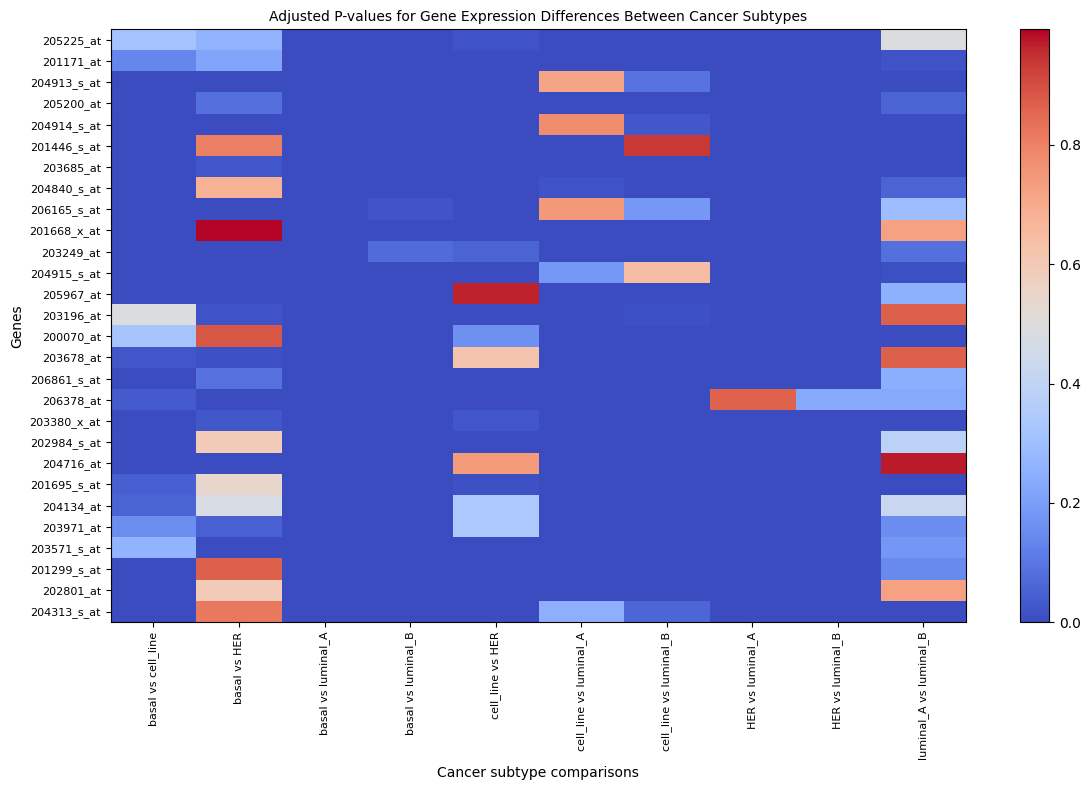

In [ ]:
# prompt: generate chart for adjusted_results_df with different colors

import matplotlib.pyplot as plt

# Assuming adjusted_results_df is defined and contains p-values for different gene comparisons

# Create a heatmap of adjusted p-values
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Use a diverging colormap to visualize differences in p-values effectively
im = plt.imshow(adjusted_results_df, cmap='coolwarm', aspect='auto', interpolation='nearest')

# Add a colorbar
plt.colorbar(im)

# Set x-axis and y-axis labels
plt.xlabel('Cancer subtype comparisons', fontsize=10)
plt.ylabel('Genes', fontsize=10)

# Set the title
plt.title('Adjusted P-values for Gene Expression Differences Between Cancer Subtypes', fontsize=10)


# Customize ticks and labels
plt.xticks(ticks=range(len(adjusted_results_df.columns)),
           labels=[f'{col[0]} vs {col[1]}' for col in adjusted_results_df.columns],
           rotation=90, fontsize=8)
plt.yticks(ticks=range(len(adjusted_results_df.index)), labels=adjusted_results_df.index, fontsize=8)

plt.tight_layout()
plt.show()

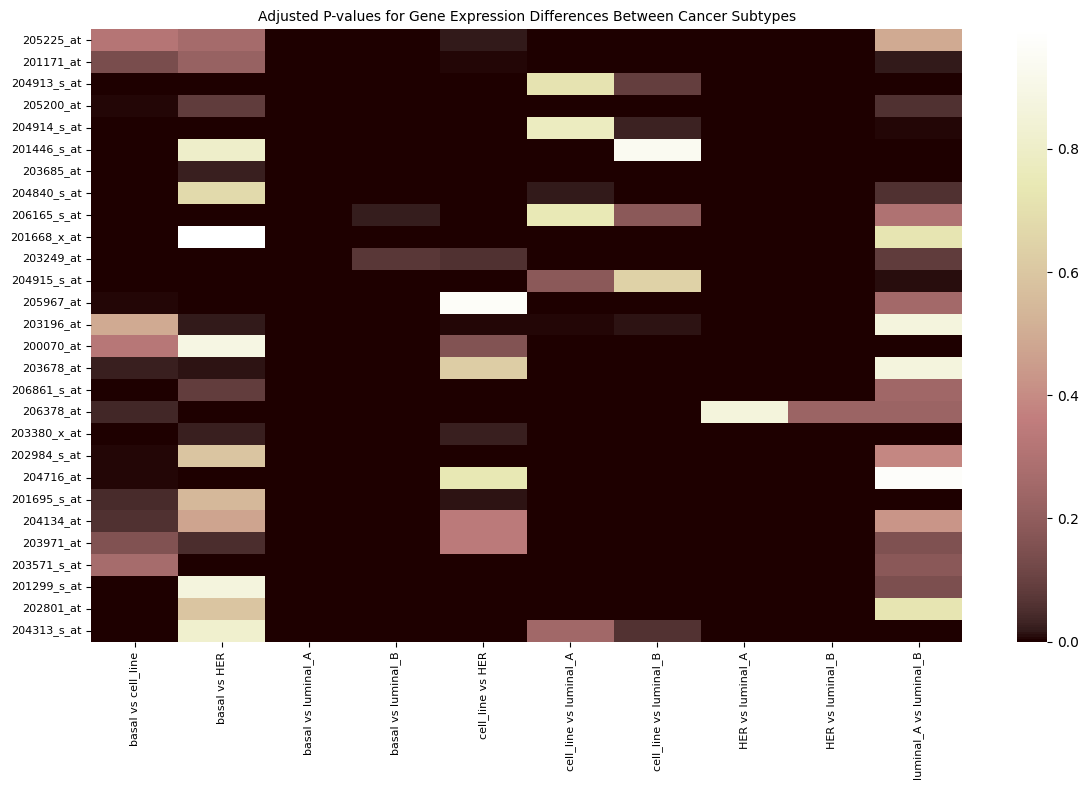

In [ ]:
# prompt: Differential Gene Expression Analysis

# Assuming 'adjusted_results_df' is defined and contains p-values for different gene comparisons

# Create a heatmap of adjusted p-values
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Use a diverging colormap to visualize differences in p-values effectively
# Convert the DataFrame to a matrix
p_value_matrix = adjusted_results_df.values

# Use seaborn's heatmap function for better visualization
sns.heatmap(p_value_matrix,
            cmap='pink',
            annot=False,  # Set to True if you want to display the p-values on the heatmap
            xticklabels=[f'{col[0]} vs {col[1]}' for col in adjusted_results_df.columns],
            yticklabels=adjusted_results_df.index)


# Set the title
plt.title('Adjusted P-values for Gene Expression Differences Between Cancer Subtypes', fontsize=10)

plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: identification of biomarker genes

# Assuming 'significant_degs_bh' DataFrame is available and contains 'Gene' and 'Adjusted_P_Value_BH' columns

# Filter for significant genes based on adjusted p-value
significant_genes = significant_degs_bh[significant_degs_bh['Adjusted_P_Value_BH'] < 0.05]

# Print the list of significant genes
print("Significant genes (after FDR correction):")
print(significant_genes['Gene'].tolist())

Significant genes (after FDR correction):
['samples', '205225_at', '201171_at', '1557617_at', '204913_s_at', '1558080_s_at', '205200_at', '204914_s_at', '1552619_a_at', '1553749_at', '201446_s_at', '1560342_at', '203685_at', '204840_s_at', '1558702_at', '206165_s_at', '201668_x_at', '1562495_at', '1569608_x_at', '1555272_at', '203249_at', '1557065_at', '1556416_s_at', '204915_s_at', '205967_at', '203196_at', '1555446_s_at', '200070_at', '1553156_at', '203678_at', '206861_s_at', '1559291_at', '206378_at', '203380_x_at', '202984_s_at', '1554106_at', '1561754_at', '204716_at', '1563426_a_at', '201695_s_at', '204134_at', '203971_at', '1555996_s_at', '203571_s_at', '1564547_x_at', '201299_s_at', '202801_at', '1559094_at', '204313_s_at', '1561468_at']


In [ ]:
# prompt: create a csv file with gene names and fold change values

import pandas as pd

# Assuming 'cleaned_dict' and 'degs' are defined from the previous code

# Create an empty list to store the data for the CSV
csv_data = []

# Iterate through the significant genes
for index, row in degs.iterrows():
    gene_id = row['Gene']
    p_value = row['P_Value']
    adj_p_value = row['Adj_P_Value']

    # Get the gene name from the cleaned dictionary
    gene_name = cleaned_dict.get(gene_id)

    # Check if the gene name is found
    if gene_name is not None:
        # Calculate the fold change (replace this with your actual fold change calculation)
        # Example: Assuming df1 has fold change information
        # fold_change = df1[df1['Gene_ID'] == gene_id]['Fold_Change'].values[0]
        # if key exists in the df1 columns calculate the fold change
        if gene_id in df1.columns:
          # Calculate the mean expression for cancer vs. normal
          cancer_mean = df1[df1['type'].isin(['basal', 'cell_line', "HER", 'luminal_A', 'luminal_B'])][gene_id].mean()
          normal_mean = df1[df1['type'] == 'normal'][gene_id].mean()

          # Calculate the fold change
          fold_change = cancer_mean / normal_mean
        else:
          fold_change = "NA"

        # Append the data to the list
        csv_data.append([gene_name, fold_change, p_value, adj_p_value])
    else:
        print(f"Gene name not found for gene ID: {gene_id}")

# Create a Pandas DataFrame
df_csv = pd.DataFrame(csv_data, columns=['Gene_Name', 'Fold_Change', 'P_Value', 'Adjusted_P_Value'])

# Save the DataFrame to a CSV file
df_csv.to_csv('gene_expression.csv', index=False)

In [ ]:
extracted_data = []
for key, value in cleaned_dict.items():
    if key in df1.columns:
        extracted_data.append(df1[key])
    else:
        print(f"Key '{key}' not found in df1 columns.")

# Combine the extracted data into a DataFrame
if extracted_data:
    extracted_df = pd.concat(extracted_data, axis=1)
    print(extracted_df.head())
else:
    print("No matching keys found in df1. extracted_df is empty.")


   205225_at  204840_s_at  206649_s_at  203196_at  204915_s_at  204909_at  \
0  -0.643706     0.268143    -0.320115   0.999523     0.632007   1.443857   
1  -1.245351    -0.014564    -1.082200  -0.796116     0.351677   0.270080   
2  -0.784112     2.117158    -0.382039   0.921128    -1.232508   0.672339   
3  -0.764645     0.560073    -0.042839  -0.103763     0.196947   0.241672   
4  -0.900580     1.019096    -0.598206   0.378405     0.077145   0.791415   

   201171_at  202573_at  206166_s_at  203678_at  ...  201696_at  206612_at  \
0   0.207436   1.069094    -0.695386  -0.698994  ...  -0.526661   0.479187   
1   0.751382   1.104264    -0.795253   2.016473  ...   0.072810   0.183347   
2  -0.306939  -0.556776    -0.606009  -0.678551  ...   0.423303  -1.178669   
3   0.678133  -0.419966    -0.560286   0.737515  ...   0.312208  -0.884891   
4   1.138506   1.337678    -0.734100  -0.132654  ...  -0.340441  -1.023370   

   200070_at  204325_s_at  206275_s_at  206927_s_at  204406_at  2014

In [ ]:
extracted_df = pd.concat([extracted_df, df1['type']], axis=1)
print(extracted_df.head())


   205225_at  204840_s_at  206649_s_at  203196_at  204915_s_at  204909_at  \
0  -0.643706     0.268143    -0.320115   0.999523     0.632007   1.443857   
1  -1.245351    -0.014564    -1.082200  -0.796116     0.351677   0.270080   
2  -0.784112     2.117158    -0.382039   0.921128    -1.232508   0.672339   
3  -0.764645     0.560073    -0.042839  -0.103763     0.196947   0.241672   
4  -0.900580     1.019096    -0.598206   0.378405     0.077145   0.791415   

   201171_at  202573_at  206166_s_at  203678_at  ...  206612_at  200070_at  \
0   0.207436   1.069094    -0.695386  -0.698994  ...   0.479187  -1.291433   
1   0.751382   1.104264    -0.795253   2.016473  ...   0.183347  -0.609436   
2  -0.306939  -0.556776    -0.606009  -0.678551  ...  -1.178669  -1.433061   
3   0.678133  -0.419966    -0.560286   0.737515  ...  -0.884891  -0.244486   
4   1.138506   1.337678    -0.734100  -0.132654  ...  -1.023370  -0.859546   

   204325_s_at  206275_s_at  206927_s_at  204406_at  201450_s_at  20

In [ ]:
df = pd.read_csv('gene_expression.csv')
ranked_genes = df[['Gene_Name', 'Fold_Change']].sort_values(by='Fold_Change', ascending=False)
ranked_genes = ranked_genes.set_index('Gene_Name')
print(ranked_genes)

           Fold_Change
Gene_Name             
LOC202573     2.790421
LOC204909     0.244210
LOC204915     0.125396
LOC206649     0.084677
LOC204840     0.083592
LOC206612     0.051457
LOC201450     0.021683
LOC201844     0.019688
LOC201696     0.015486
LOC201775    -0.006108
LOC204325    -0.014608
LOC204406    -0.017408
LOC205888    -0.020303
LOC203196    -0.038401
LOC201171    -0.049461
LOC200070    -0.049485
LOC203678    -0.089136
LOC205225    -0.094269
LOC204063    -0.094860
LOC204976    -0.108396
LOC206275    -0.163041
LOC206927    -0.195965
LOC206166    -0.204434


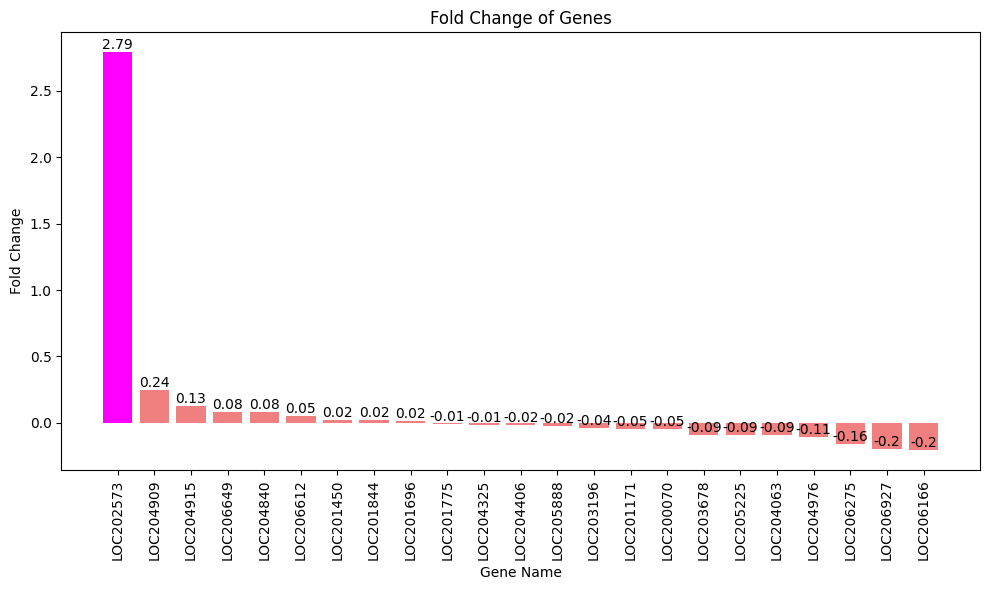

In [ ]:
# prompt: draw bar chart for gene name with fold value in different colour

import matplotlib.pyplot as plt

# Assuming 'ranked_genes' DataFrame is available and contains 'Gene_Name' and 'Fold_Change'
# Sample data (replace with your actual data)
# ranked_genes = pd.DataFrame({'Gene_Name': ['GeneA', 'GeneB', 'GeneC'], 'Fold_Change': [2.5, 1.8, 0.7]})

# Sort genes by fold change
# ranked_genes = ranked_genes.sort_values(by='Fold_Change', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
colors = ['magenta' if fold_change > 1 else 'lightcoral' for fold_change in ranked_genes['Fold_Change']]
bars = plt.bar(ranked_genes.index, ranked_genes['Fold_Change'], color=colors)

# Add fold change values on top of each bar
for bar, fold_change in zip(bars, ranked_genes['Fold_Change']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(fold_change, 2), ha='center', va='bottom')

plt.xlabel('Gene Name')
plt.ylabel('Fold Change')
plt.title('Fold Change of Genes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: map gene expression id with gene names

# Assuming 'significant_degs_bh' DataFrame and 'cleaned_dict' are defined from previous code

# Create a DataFrame to store the gene IDs and their corresponding names
gene_mapping = pd.DataFrame({'Gene_ID': significant_degs_bh['Gene'],
                             'Gene_Name': significant_degs_bh['Gene'].map(cleaned_dict)})

# Display the DataFrame
gene_mapping

Gene_ID  Gene_Name
0        samples        NaN
1      205225_at  LOC205225
2    204840_s_at  LOC204840
3     1561573_at        NaN
4   1558080_s_at        NaN
5    206649_s_at  LOC206649
6   1569608_x_at        NaN
7      203196_at  LOC203196
8     1561906_at        NaN
9    204915_s_at  LOC204915
10     204909_at  LOC204909
11  1552616_a_at        NaN
12     201171_at  LOC201171
13     202573_at  LOC202573
14   206166_s_at  LOC206166
15    1558595_at        NaN
16    1565819_at        NaN
17  1568634_a_at        NaN
18    1556877_at        NaN
19    1556381_at        NaN
20     203678_at  LOC203678
21   205888_s_at  LOC205888
22    1560657_at        NaN
23    1560066_at        NaN
24  1566606_a_at        NaN
25   204976_s_at  LOC204976
26  1556847_s_at        NaN
27  1557493_x_at        NaN
28   204063_s_at  LOC204063
29    1566323_at        NaN
30    1565662_at        NaN
31     201696_at  LOC201696
32    1557617_at        NaN
33    1561998_at        NaN
34     206612_at  LOC206612
35     200070_at  LOC200070
36   204325_s_at  LOC204325
37   206275_s_at  LOC206275
38    1559953_at        NaN
39    1569416_at        NaN
40    1553749_at        NaN
41  1558290_a_at        NaN
42   206927_s_at  LOC206927
43     204406_at  LOC204406
44  1569630_a_at        NaN
45  1555419_a_at        NaN
46    1569852_at        NaN
47   201450_s_at  LOC201450
48   201844_s_at  LOC201844
49   201775_s_at  LOC201775

In [ ]:
# prompt: select gene ids where gene neame is not NaN

# Assuming 'gene_mapping' is your DataFrame and it has columns 'Gene_ID' and 'Gene_Name'
# where 'Gene_Name' might contain NaN values

# Select rows where 'Gene_Name' is not NaN
df_filtered = gene_mapping[gene_mapping['Gene_Name'].notna()] # Changed df1 to gene_mapping

# Extract the 'Gene_ID' values from the filtered DataFrame
gene_ids = df_filtered['Gene_ID'].tolist()

# Print the selected gene IDs
gene_ids

['205225_at',
 '204840_s_at',
 '206649_s_at',
 '203196_at',
 '204915_s_at',
 '204909_at',
 '201171_at',
 '202573_at',
 '206166_s_at',
 '203678_at',
 '205888_s_at',
 '204976_s_at',
 '204063_s_at',
 '201696_at',
 '206612_at',
 '200070_at',
 '204325_s_at',
 '206275_s_at',
 '206927_s_at',
 '204406_at',
 '201450_s_at',
 '201844_s_at',
 '201775_s_at']

In [ ]:
print("Number of samples (ranked_genes):", ranked_genes.shape[1])
print("Number of class labels:", len(cls_list))

Number of samples (ranked_genes): 1
Number of class labels: 6


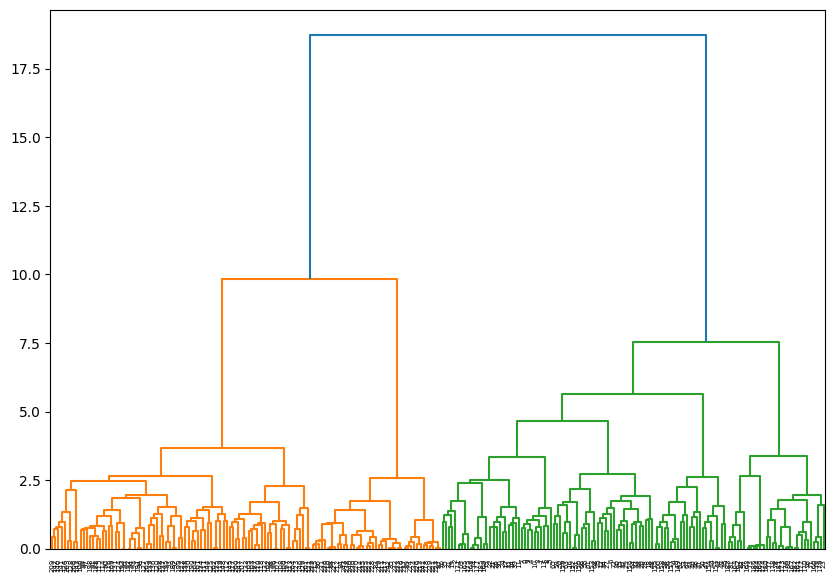

In [ ]:
# prompt: PAM50 Classification

# Assuming 'df1' and 'y_resampled' are defined and available in your environment

# ... (Your existing code) ...

# Assuming 'extracted_df' is defined from the previous code
# and contains gene expression data and class labels

# Convert 'type' column to numerical labels
le = LabelEncoder()
extracted_df['type'] = le.fit_transform(extracted_df['type'])


# Now, perform PAM50 classification (replace with your preferred method)

# Example: Using Agglomerative Clustering (you might want to explore other methods)

# Assuming 'extracted_df' contains preprocessed data (normalized, standardized, etc.)
X = extracted_df.drop('type', axis=1)
y = extracted_df['type']


# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward') # Adjust n_clusters as needed
labels = clustering.fit_predict(X)


# Evaluate the clustering result (e.g., compare predicted labels with ground truth labels)
# Replace this with your preferred evaluation metric
# Example: Using Adjusted Rand Index
# from sklearn.metrics import adjusted_rand_score
# ari = adjusted_rand_score(y, labels)
# print(f"Adjusted Rand Index: {ari}")

# Visualize clustering result (optional)
plt.figure(figsize=(10, 7))
linked = linkage(X, 'ward')
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

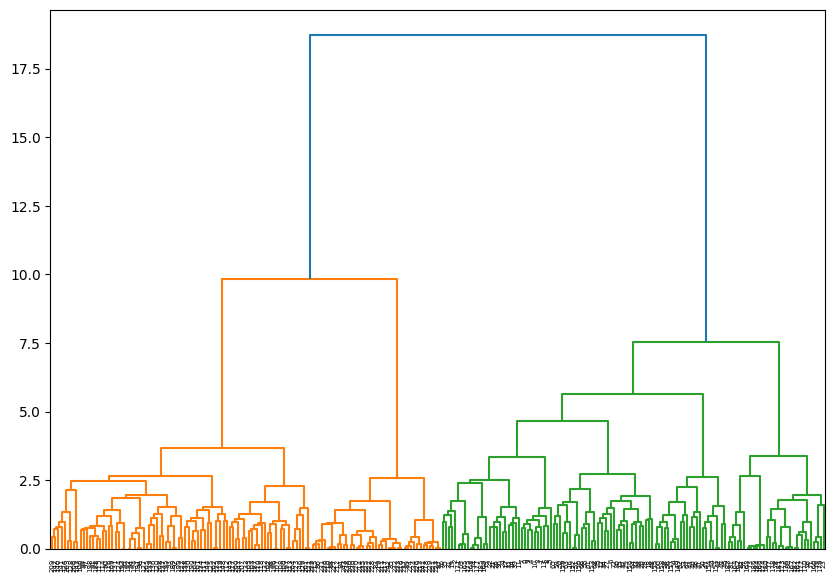

In [ ]:
# prompt: Hierarchical Clustering

# Assuming 'extracted_df' is defined from the previous code
# and contains gene expression data and class labels

# Convert 'type' column to numerical labels
le = LabelEncoder()
extracted_df['type'] = le.fit_transform(extracted_df['type'])


# Now, perform PAM50 classification (replace with your preferred method)

# Example: Using Agglomerative Clustering (you might want to explore other methods)

# Assuming 'extracted_df' contains preprocessed data (normalized, standardized, etc.)
X = extracted_df.drop('type', axis=1)
y = extracted_df['type']


# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward') # Adjust n_clusters as needed
labels = clustering.fit_predict(X)


# Evaluate the clustering result (e.g., compare predicted labels with ground truth labels)
# Replace this with your preferred evaluation metric
# Example: Using Adjusted Rand Index
# from sklearn.metrics import adjusted_rand_score
# ari = adjusted_rand_score(y, labels)
# print(f"Adjusted Rand Index: {ari}")

# Visualize clustering result (optional)
plt.figure(figsize=(10, 7))
linked = linkage(X, 'ward')
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
cls_list = y_resampled.unique().tolist()

print(f"Ranked Genes Shape: {ranked_genes.shape}")
print(f"Unique Class Labels Count: {len(cls_list)}")
print(f"Class Label List: {cls_list}")

# Ensure class labels match sample count
# Changed the comparison to use len(cls_list) instead of cls_list
if len(cls_list) == ranked_genes.shape[1]:
  with open('class_labels.cls', 'w') as f:
        f.write(f'{len(cls_list)} 2 1\n')
        f.write('# type\n')
        f.write(' '.join(map(str, cls_list)))
else:
    print("Mismatch between samples and class labels!")
    print(f"Number of samples (ranked_genes): {ranked_genes.shape[1]}") # Added for debugging
    print(f"Number of class labels: {len(cls_list)}") # Added for debugging
    print(ranked_genes)

Ranked Genes Shape: (23, 1)
Unique Class Labels Count: 6
Class Label List: ['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B']
Mismatch between samples and class labels!
Number of samples (ranked_genes): 1
Number of class labels: 6
           Fold_Change
Gene_Name             
LOC202573     2.790421
LOC204909     0.244210
LOC204915     0.125396
LOC206649     0.084677
LOC204840     0.083592
LOC206612     0.051457
LOC201450     0.021683
LOC201844     0.019688
LOC201696     0.015486
LOC201775    -0.006108
LOC204325    -0.014608
LOC204406    -0.017408
LOC205888    -0.020303
LOC203196    -0.038401
LOC201171    -0.049461
LOC200070    -0.049485
LOC203678    -0.089136
LOC205225    -0.094269
LOC204063    -0.094860
LOC204976    -0.108396
LOC206275    -0.163041
LOC206927    -0.195965
LOC206166    -0.204434


In [ ]:
# Assuming 'X' contains your feature data and 'y' contains your target variable
# You might need to define X and y based on the previous parts of your code
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split

# Select the desired columns (gene_ids) from df1
X = df1[gene_ids]  # Corrected line to select columns using gene_ids

y = y_resampled
print(y)
print(X.shape, y.shape)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

0       basal
1       basal
2       basal
3       basal
4       basal
        ...  
239    normal
240    normal
241    normal
242    normal
243    normal
Name: type, Length: 244, dtype: object
(244, 25) (244,)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns


# Assume 'Label' column indicates disease (1) or control (0) status
# Separate the data into disease and control groups
disease_group = df1[df1['type'].isin(['basal', 'HER', 'cell_line', 'luminal_A', 'luminal_B'])].drop(columns=['type'])
ontrol_group = df1[df1['type'] == 'normal'].drop(columns=['type'])

# Perform t-tests to identify differentially expressed genes
p_values = []
gene_names = disease_group.columns

for gene in gene_names:
    stat, p_val = ttest_ind(disease_group[gene], control_group[gene], equal_var=False)
    p_values.append(p_val)

# Create a DataFrame to store the results
deg_results = pd.DataFrame({'Gene': gene_names, 'p-value': p_values})
deg_results['-log10(p-value)'] = -np.log10(deg_results['p-value'])
deg_results = deg_results.sort_values(by='p-value')

# Filter significant genes (e.g., p-value < 0.05)
significant_genes = deg_results[deg_results['p-value'] < 0.05]

# Print top 10 significant genes
print("Top 10 Differentially Expressed Genes:")
print(significant_genes.head(10))

# Plot Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deg_results, x=deg_results.index, y='-log10(p-value)', hue=deg_results['p-value'] < 0.05, palette={True: 'red', False: 'grey'}, legend=False)
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('Genes')
plt.ylabel('-log10(p-value)')
plt.axhline(-np.log10(0.05), color='blue', linestyle='--')  # Threshold line
plt.show()


    samples  1007_s_at   1053_at    117_at    121_at  1255_g_at   1294_at  \
0 -1.693197  -0.799563  0.661843  0.310655  0.041789  -0.985780 -0.672168   
1 -1.671112  -0.781052  0.824165  1.302215  1.050345  -0.225934  0.362588   
2 -1.626943  -0.385048  1.852277 -0.760019  1.057150  -0.374541 -1.168619   
3 -1.560690  -0.951940 -0.390221  0.395305 -1.069436  -0.022818  0.768958   
4 -1.538605  -1.522007  0.162605  0.729207 -0.017658  -0.096782  0.469116   

    1316_at   1320_at  1405_i_at  ...  206927_s_at  206928_at  206929_s_at  \
0 -1.225551 -0.994281   0.659284  ...    -0.148957   1.209786     1.411273   
1 -0.660486 -0.421679  -0.012215  ...    -0.837139   1.978431     0.919467   
2 -1.737551 -0.939433   0.992361  ...    -0.717695   1.458790    -0.208983   
3  0.570620 -0.475208   0.751545  ...    -0.748159   1.270859    -0.522686   
4  0.166878 -0.941935   0.981465  ...    -0.403336   2.014250     0.188256   

   206930_at  206931_at  206932_at  206933_s_at  206934_at  206935_a

NameError: name 'control_group' is not defined

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'LOC201171', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

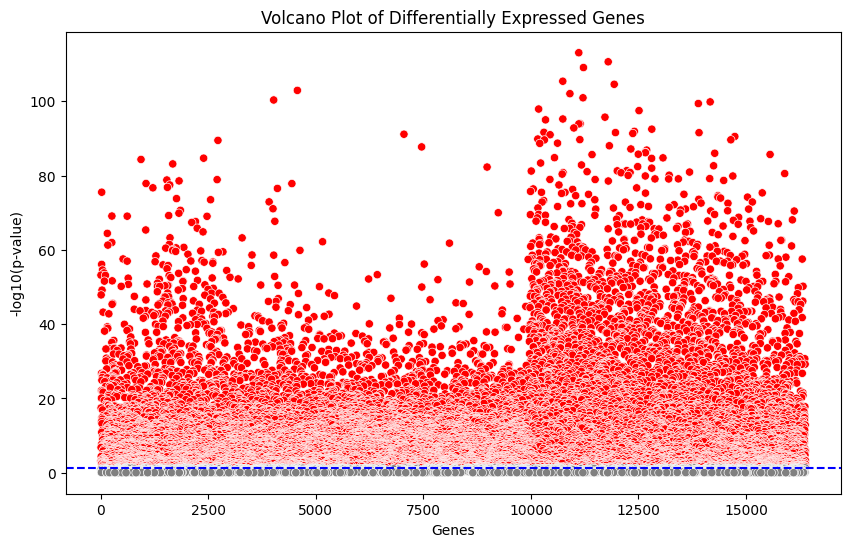

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns


# Assume 'Label' column indicates disease (1) or control (0) status
# Separate the data into disease and control groups
disease_group = df1[df1['type'].isin(['basal', 'HER', 'cell_line', 'luminal_A', 'luminal_B'])].drop(columns=['type'])
# Corrected the typo in the variable name from 'ontrol_group' to 'control_group'
control_group = df1[df1['type'] == 'normal'].drop(columns=['type']) # Fixed: changed 'ontrol_group' to 'control_group'

# Perform t-tests to identify differentially expressed genes
p_values = []
gene_names = disease_group.columns

for gene in gene_names:
    stat, p_val = ttest_ind(disease_group[gene], control_group[gene], equal_var=False)
    p_values.append(p_val)

# Create a DataFrame to store the results
deg_results = pd.DataFrame({'Gene': gene_names, 'p-value': p_values})
deg_results['-log10(p-value)'] = -np.log10(deg_results['p-value'])
deg_results = deg_results.sort_values(by='p-value')

# Filter significant genes (e.g., p-value < 0.05)
significant_genes = deg_results[deg_results['p-value'] < 0.05]

# Print top 10 significant genes
print("Top 10 Differentially Expressed Genes:")
print(significant_genes.head(10))

# Plot Volcano Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=deg_results, x=deg_results.index, y='-log10(p-value)', hue=deg_results['p-value'] < 0.05, palette={True: 'red', False: 'grey'}, legend=False)
plt.title('Volcano Plot of Differentially Expressed Genes')
plt.xlabel('Genes')
plt.ylabel('-log10(p-value)')
plt.axhline(-np.log10(0.05), color='blue', linestyle='--')  # Threshold line
plt.show()


Model Accuracy: 0.9594594594594594

Classification Report:
               precision    recall  f1-score   support

         HER       0.92      1.00      0.96        12
       basal       1.00      0.92      0.96        13
   cell_line       1.00      1.00      1.00        13
   luminal_A       1.00      0.87      0.93        15
   luminal_B       0.83      1.00      0.91        10
      normal       1.00      1.00      1.00        11

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.97      0.96      0.96        74



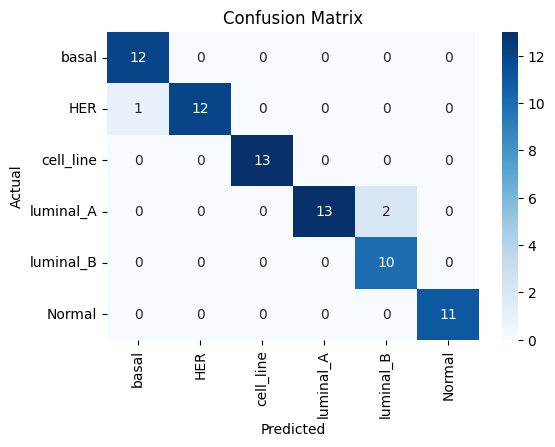

<ipython-input-62-ad946f2015ea>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


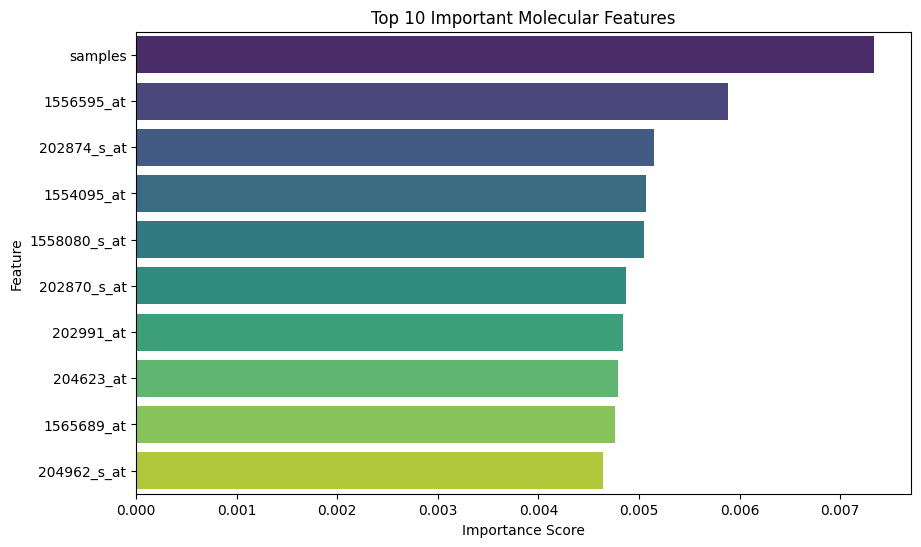

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (example: drug-target interaction data)
# Assume 'features.csv' contains molecular descriptors and 'target.csv' contains target labels
# Each row represents a molecule-target pair
features_df = df1.drop(columns=['type']) # Changed to correctly drop the 'type' column
target_df = df1['type']      # Interaction (1) or non-interaction (0) # Changed to select the 'type' column using square brackets

# Merge datasets if necessary
df = pd.concat([features_df, target_df], axis=1)

# Define features and target variable
X = df.drop(columns=['type'])  # Feature columns
y = df['type']                 # Target column (1: interaction, 0: no interaction)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (Random Forest for this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['basal', 'HER', 'cell_line', 'luminal_A', 'luminal_B', 'Normal'], yticklabels=['basal', 'HER', 'cell_line', 'luminal_A', 'luminal_B', 'Normal'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance Visualization
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Important Molecular Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()



Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         HER       1.00      1.00      1.00         9
       basal       1.00      1.00      1.00        13
   cell_line       1.00      1.00      1.00        16
   luminal_A       1.00      1.00      1.00        10
   luminal_B       1.00      1.00      1.00        15
      normal       1.00      1.00      1.00        11

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



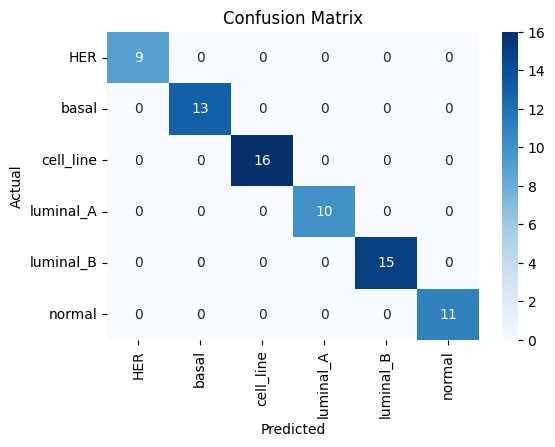

<ipython-input-67-d6e597f58d02>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

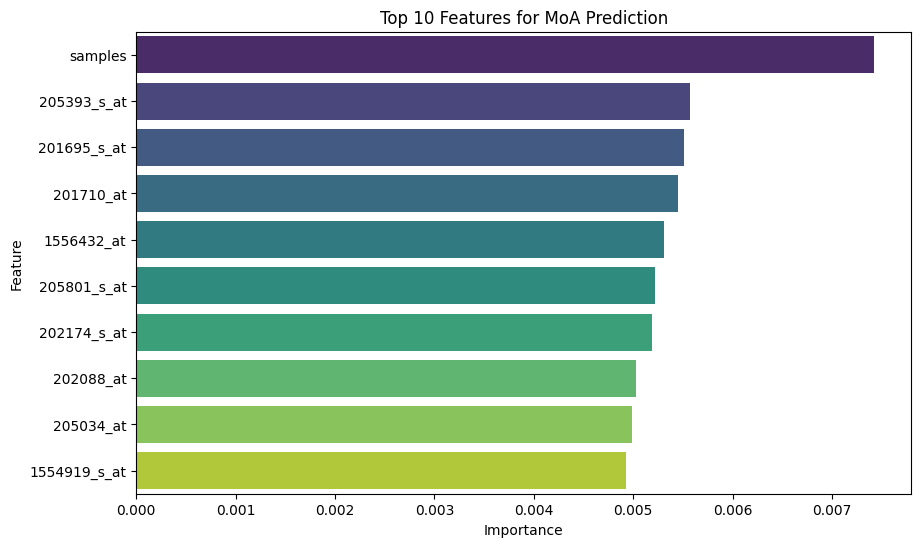

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#from rdkit import Chem # Commented out as rdkit is not used
#from rdkit.Chem import Descriptors # Commented out as Descriptors is not used

# Step 1: Load and Preprocess Data
# Assume 'drug_data.csv' contains drug features and 'MoA.csv' contains corresponding mechanism of action labels
# 'drug_data.csv' contains molecular descriptors (e.g., SMILES, molecular weight, logP, etc.)
# 'MoA.csv' contains the mechanism of action labels (one label per drug)

# Updated data loading and preprocessing
# Assuming df1 contains all your data

# Filter data for cancer types and normal type
cancer_types = ['basal', 'HER', 'cell_line', 'luminal_A', 'luminal_B']
cancer_df = df1[df1['type'].isin(cancer_types)]
normal_df = df1[df1['type'] == 'normal']

# Combine data, but avoid merging on 'type' to prevent empty DataFrame
df = pd.concat([cancer_df, normal_df], ignore_index=True)  # Use concat to combine

# Define features and target variable
X = df.drop(columns=['type'])  # Drop non-feature columns
y = df['type']                          # Target column (MoA label)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

# Accuracy and Classification Report
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 5: Feature Importance
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Features for MoA Prediction')
plt.xlabel

In [ ]:
# prompt: construct decision tree model with accuracy, precision, recall, f1-score, kappa constant

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import pandas as pd

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters like max_depth, min_samples_split, etc.

# Handle missing values in y_train (target variable)
# Convert to string type to handle mixed data types
y_train = y_train.astype(str)

# Remove rows with NaN values in y_train and corresponding rows in X_train
nan_indices = y_train[y_train == 'nan'].index # Get the row indices where target values are 'nan'
y_train = y_train.drop(nan_indices) # Drop those rows from y_train
X_train = X_train.drop(nan_indices) # Drop the corresponding rows from X_train

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)
y_pred_d = y_pred

# Convert y_test to string type to ensure consistency with y_pred
y_test = y_test.astype(str)

# Evaluate the model
accuracy_d = accuracy_score(y_test, y_pred)
precision_d = precision_score(y_test, y_pred, average='weighted')
recall_d = recall_score(y_test, y_pred, average='weighted')
f1_d = f1_score(y_test, y_pred, average='weighted')
kappa_d = cohen_kappa_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_d}")
print(f"Precision: {precision_d}")
print(f"Recall: {recall_d}")
print(f"F1-score: {f1_d}")
print(f"Kappa: {kappa_d}")

Accuracy: 0.8571428571428571
Precision: 0.8672644815501959
Recall: 0.8571428571428571
F1-score: 0.8553475682357671
Kappa: 0.8257998984255968


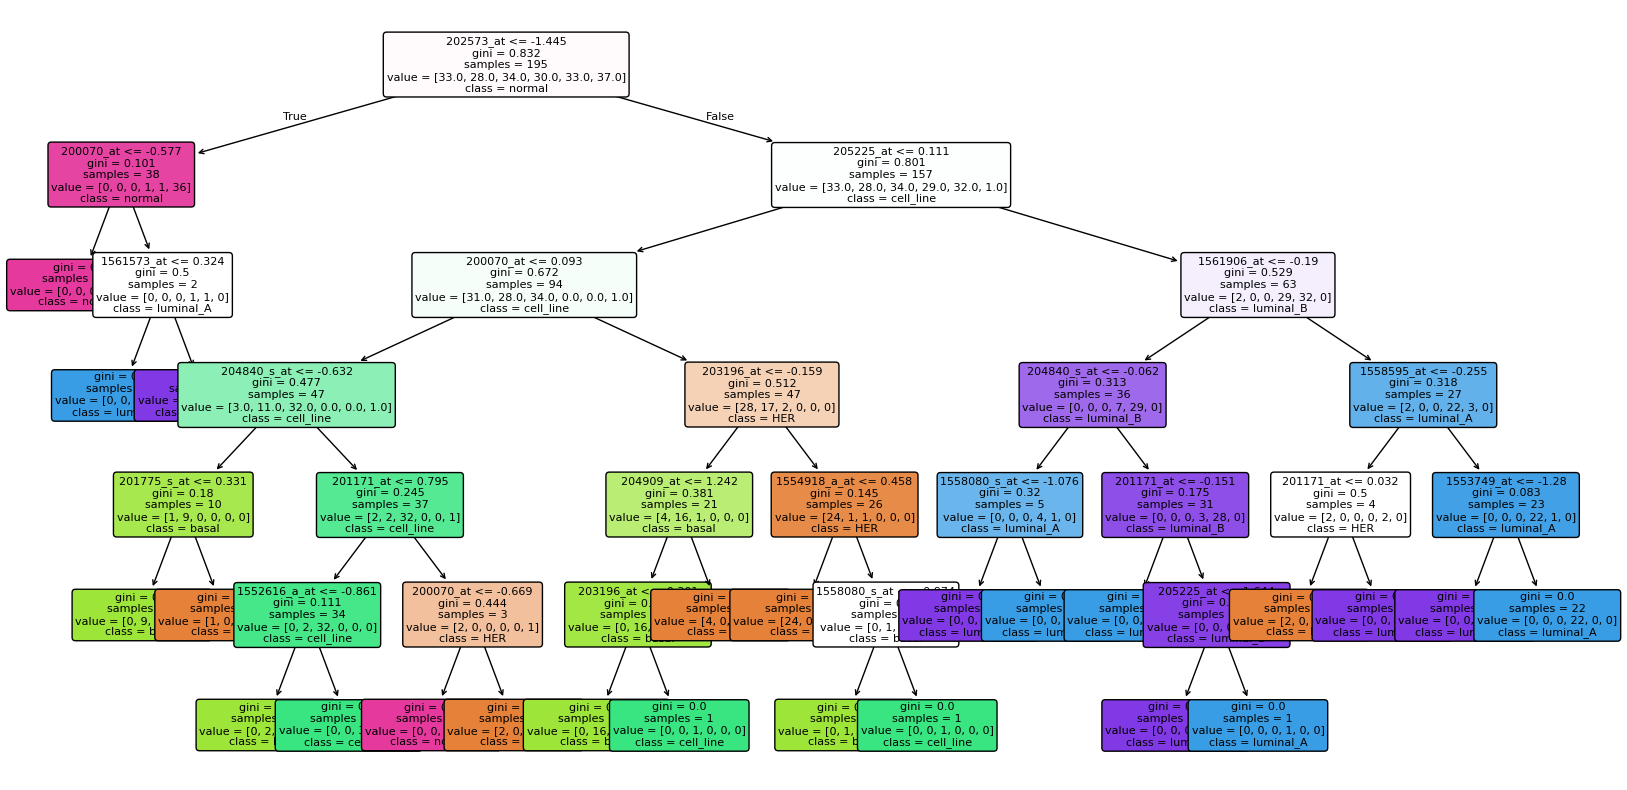

In [ ]:
# prompt: draw decision tree with different colours for six different class prediction of the given top 50 selected features

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_model is your trained DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dt_model,
          feature_names=X_top_50.columns,
          class_names=[str(i) for i in np.unique(y)],
          filled=True,
          rounded=True,
          fontsize=8)
plt.show()

In [ ]:
# prompt: print the list of features selected to construct decision tree with its attribution selection measure

# Assuming dt_model is your trained DecisionTreeClassifier and X_top_50 is your feature DataFrame
for feature_name, importance in zip(X_top_50.columns, dt_model.feature_importances_):
  print(f"Feature: {feature_name}, Importance (Gini): {importance}")

Feature: 205225_at, Importance (Gini): 0.19286557421622602
Feature: 204840_s_at, Importance (Gini): 0.09740060641354459
Feature: 1558080_s_at, Importance (Gini): 0.01602503318793855
Feature: 1561573_at, Importance (Gini): 0.00616347430305329
Feature: 1569608_x_at, Importance (Gini): 0.0
Feature: 204915_s_at, Importance (Gini): 0.0
Feature: 202573_at, Importance (Gini): 0.20082073910322734
Feature: 204909_at, Importance (Gini): 0.037705960442208364
Feature: 206649_s_at, Importance (Gini): 0.0
Feature: 1561906_at, Importance (Gini): 0.0829786262651804
Feature: 1556877_at, Importance (Gini): 0.0
Feature: 201171_at, Importance (Gini): 0.058376497666174955
Feature: 203196_at, Importance (Gini): 0.08751041684715415
Feature: 1565819_at, Importance (Gini): 0.0
Feature: 1558595_at, Importance (Gini): 0.028842280716059352
Feature: 1560066_at, Importance (Gini): 0.0
Feature: 1554918_a_at, Importance (Gini): 0.01706808268537834
Feature: 1553749_at, Importance (Gini): 0.011790994318884558
Feature: 

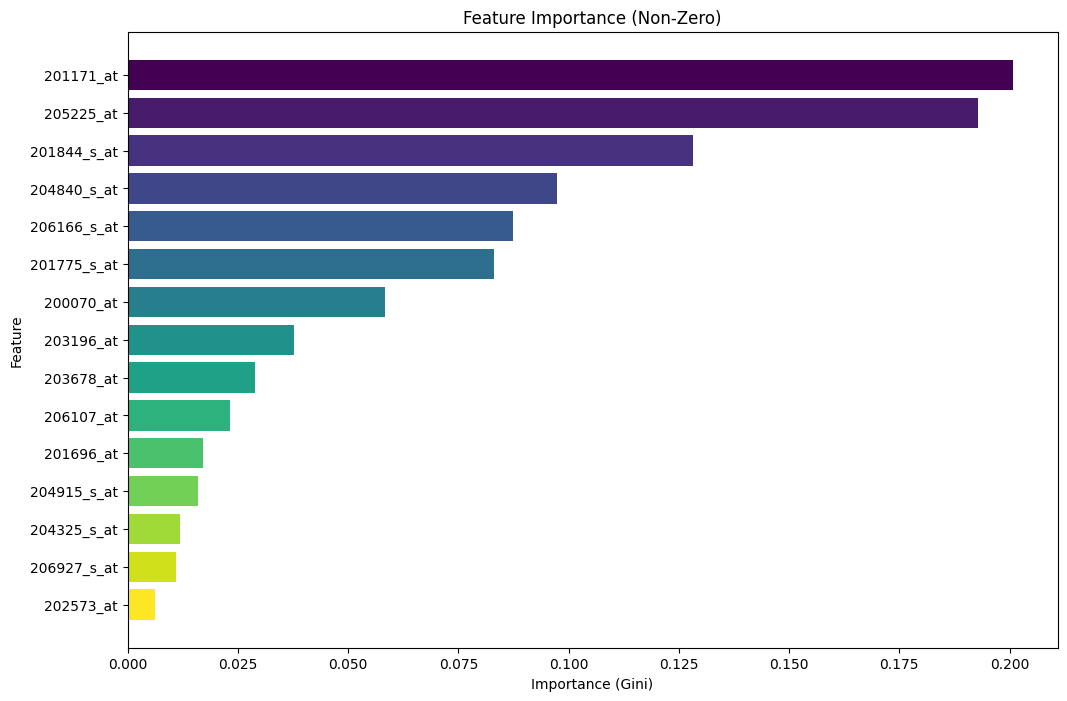

In [ ]:
# prompt: rank the features whose importance value not equal to zero and plot the bar chart with different colors

# Assuming 'dt_model' is your trained DecisionTreeClassifier and 'X_top_50' is your feature DataFrame

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})

# Filter out features with zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] != 0]

# Sort features by importance in descending order
non_zero_importances = non_zero_importances.sort_values('Importance', ascending=False)

# Assign ranks based on importance
non_zero_importances['Rank'] = non_zero_importances['Importance'].rank(ascending=False)

# Create a bar chart of feature importances with different colors
plt.figure(figsize=(12, 8))

# Use a colormap to assign colors based on rank
colors = plt.cm.viridis(np.linspace(0, 1, len(non_zero_importances)))

plt.barh(non_zero_importances['Feature'], non_zero_importances['Importance'], color=colors)
plt.xlabel('Importance (Gini)')
plt.ylabel('Feature')
plt.title('Feature Importance (Non-Zero)')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest ranked features at the top
plt.show()

In [ ]:
# prompt: construct random forest and find accuracy, precision, recall, f1 measure and kappa constant

from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust hyperparameters like n_estimators, max_depth, etc.

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_rf = y_pred
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')
kappa_rf = cohen_kappa_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")
print(f"Kappa: {kappa_rf}")

Accuracy: 0.9183673469387755
Precision: 0.926530612244898
Recall: 0.9183673469387755
F1-score: 0.91859410430839
Kappa: 0.90020366598778


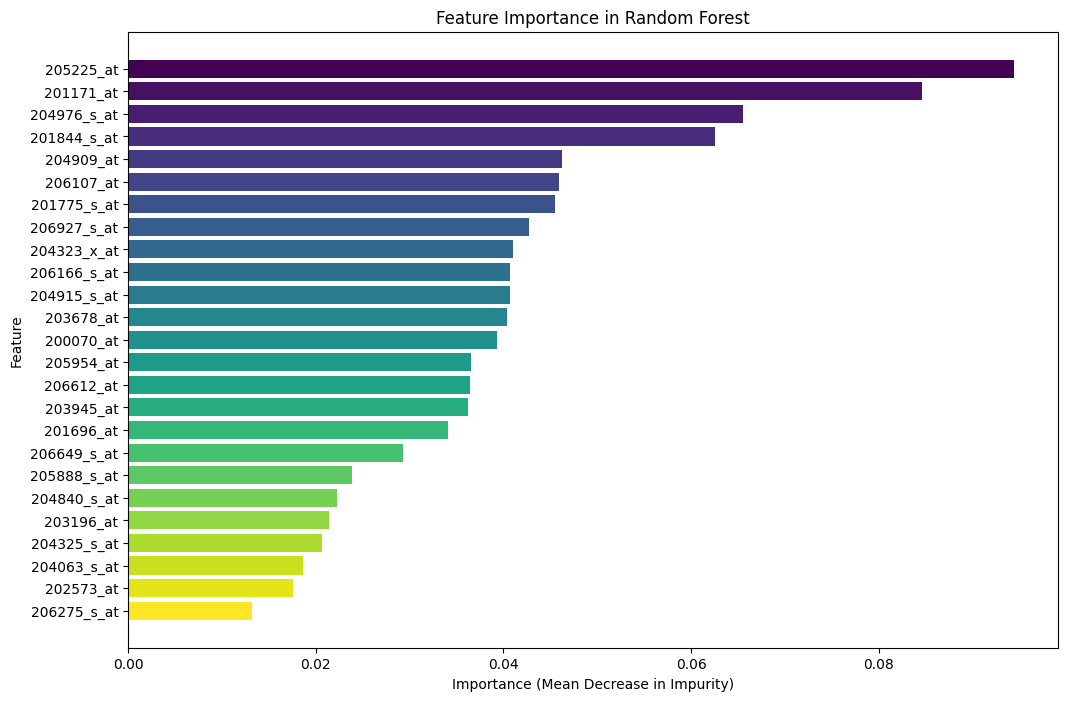

In [ ]:
# prompt: plot random forest

# Assuming rf_model is your trained RandomForestClassifier and X_top_50 is your feature DataFrame

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})

# Filter out features with zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] != 0]

# Sort features by importance in descending order
non_zero_importances = non_zero_importances.sort_values('Importance', ascending=False)

# Assign ranks based on importance
non_zero_importances['Rank'] = non_zero_importances['Importance'].rank(ascending=False)

# Create a bar chart of feature importances with different colors
plt.figure(figsize=(12, 8))

# Use a colormap to assign colors based on rank
colors = plt.cm.viridis(np.linspace(0, 1, len(non_zero_importances)))

plt.barh(non_zero_importances['Feature'], non_zero_importances['Importance'], color=colors)
plt.xlabel('Importance (Mean Decrease in Impurity)')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest ranked features at the top
plt.show()

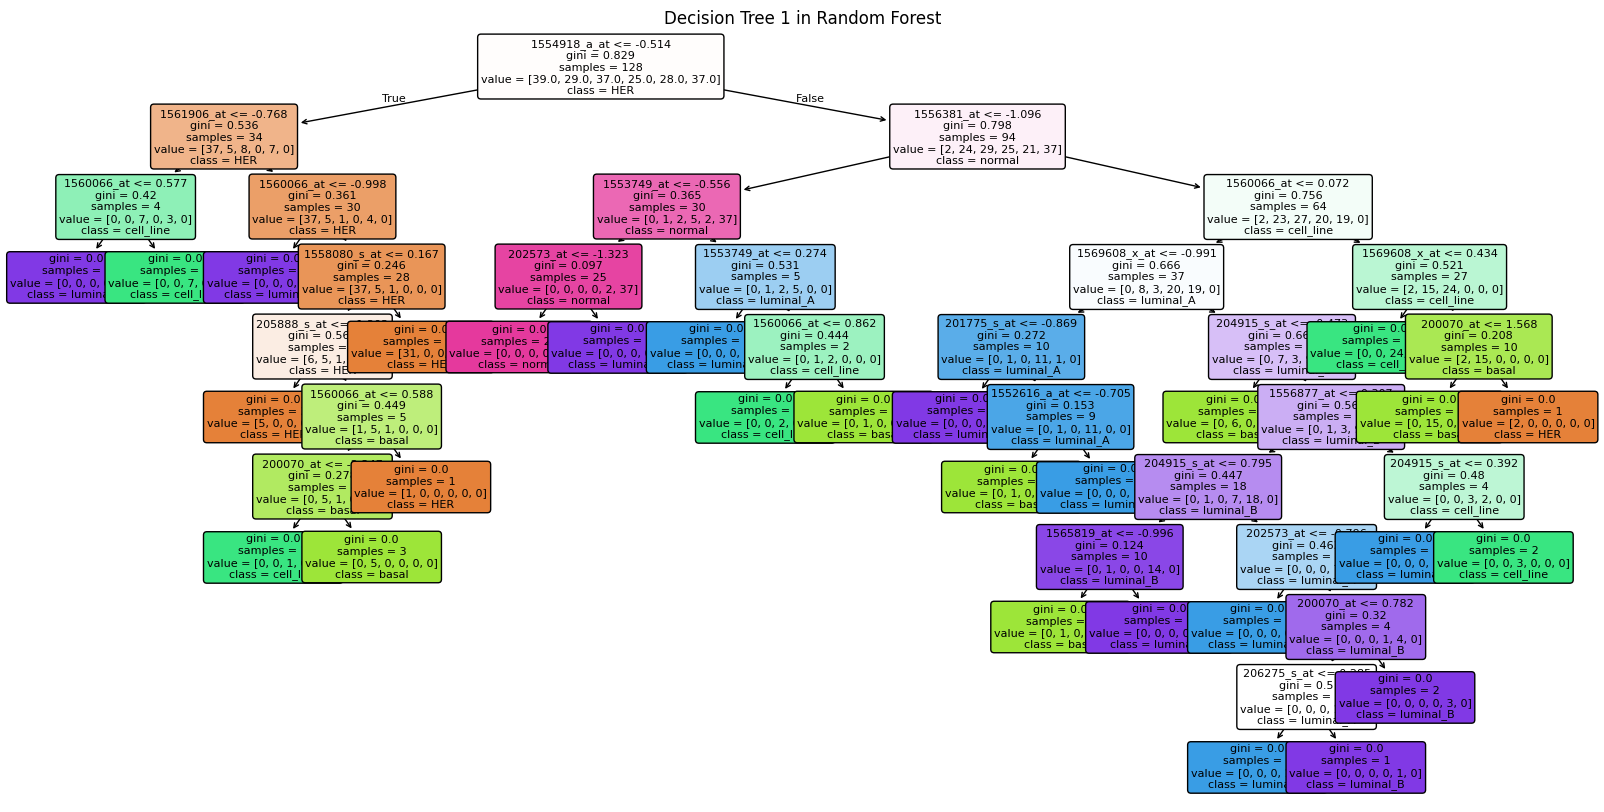

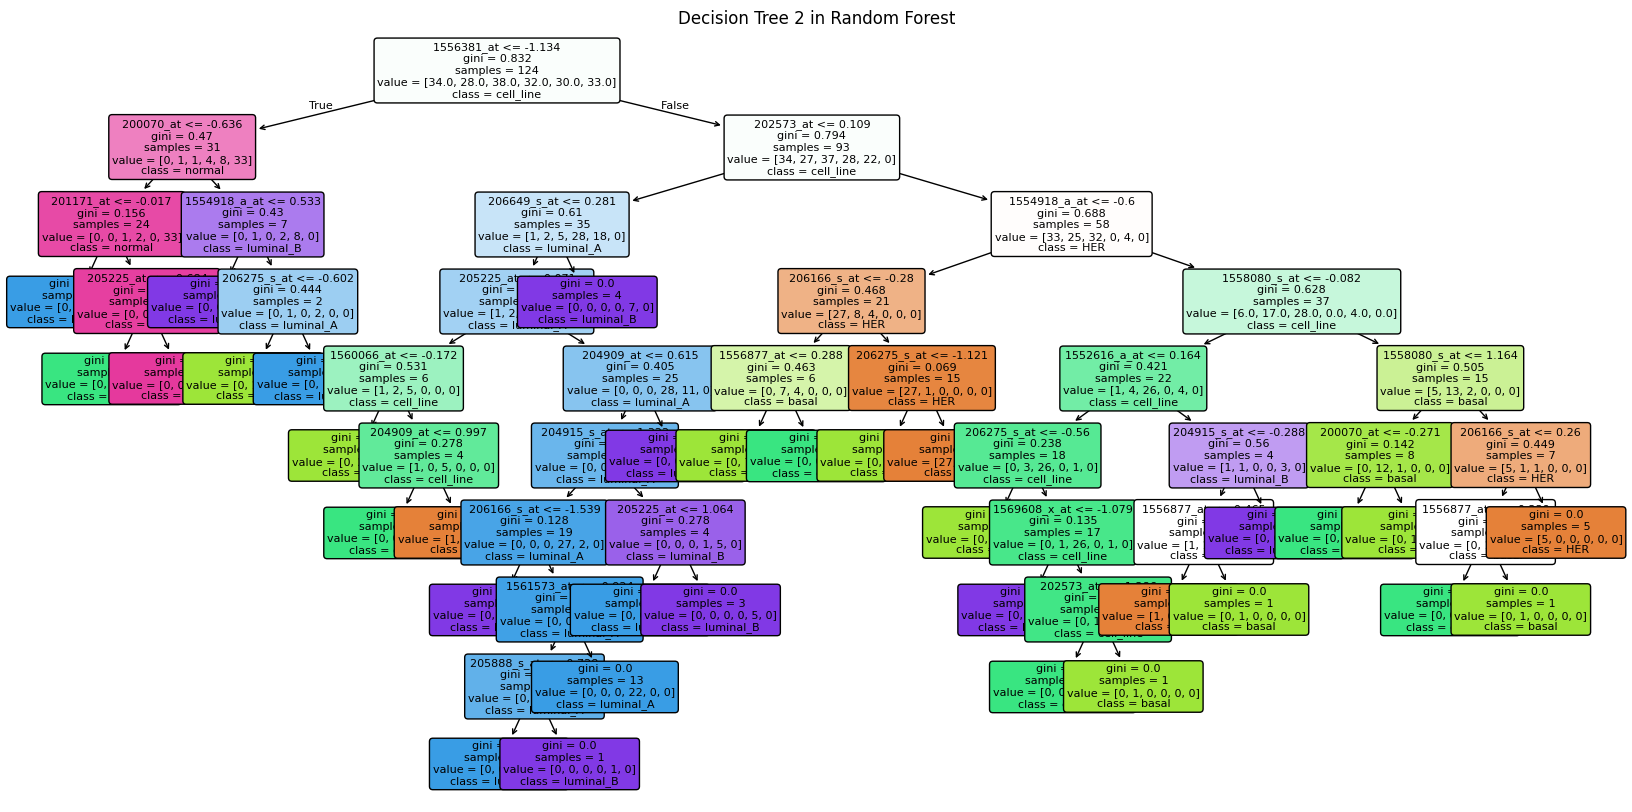

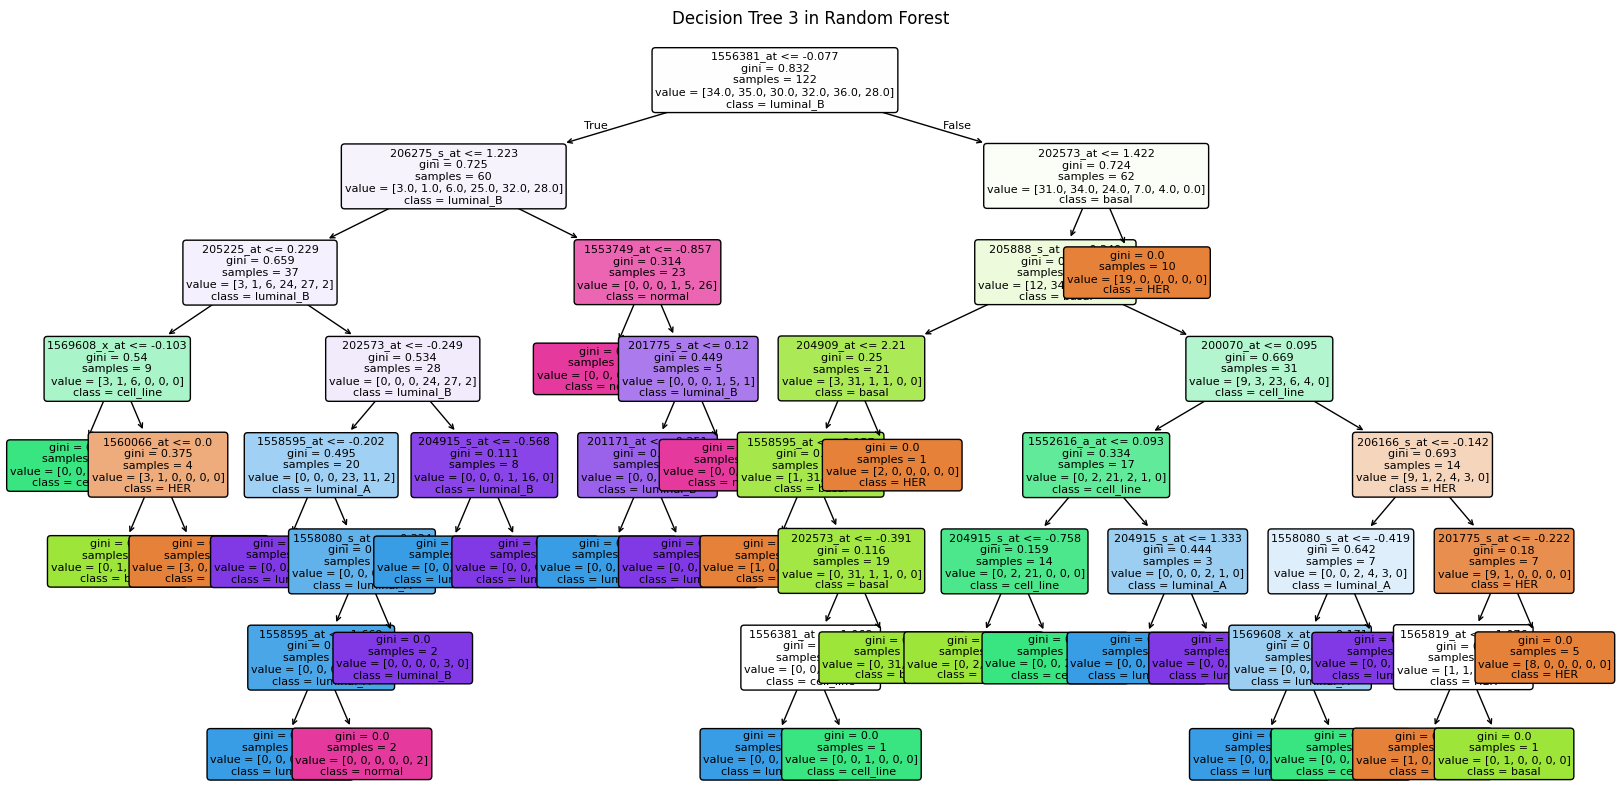

In [ ]:
# prompt: plot random forest trees

# Assuming rf_model is your trained RandomForestClassifier
# and you want to plot the first 3 trees

for i in range(min(3, len(rf_model.estimators_))):
  plt.figure(figsize=(20, 10))  # Adjust figure size as needed
  plot_tree(rf_model.estimators_[i],
            feature_names=X_top_50.columns,
            class_names=[str(i) for i in np.unique(y)],
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title(f"Decision Tree {i+1} in Random Forest")
  plt.show()

In [ ]:
# prompt: construct svm model with accuracy, precision, recall, f1-score and kappa constant

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Create an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can adjust the kernel and other hyperparameters

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)
y_pred_svm = y_pred

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_svm = f1_score(y_test, y_pred, average='weighted')
kappa_svm = cohen_kappa_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-score: {f1_svm}")
print(f"Kappa: {kappa_svm}")

Accuracy: 0.9183673469387755
Precision: 0.925453514739229
Recall: 0.9183673469387755
F1-score: 0.9188075230092035
Kappa: 0.9002544529262086


In [ ]:
# prompt: construct 1d cnn model for top 50 attributes selected

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assuming X_train, X_test, y_train, y_test are defined from the previous code
# and X_train has the shape (number_of_samples, number_of_features)


# Define the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))  # Adjust the number of neurons as needed
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax for classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Create a LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42) # Adjust hyperparameters as needed

# Train the model using the encoded labels
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set using the encoded labels
y_pred = xgb_model.predict(X_test)
y_pred_xgb = y_pred

# Evaluate the model using the encoded labels
accuracy_xgb = accuracy_score(y_test_encoded, y_pred)
precision_xgb = precision_score(y_test_encoded, y_pred, average='weighted')
recall_xgb = recall_score(y_test_encoded, y_pred, average='weighted')
f1_xgb = f1_score(y_test_encoded, y_pred, average='weighted')
kappa_xgb = cohen_kappa_score(y_test_encoded, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-score: {f1_xgb}")
print(f"Kappa: {kappa_xgb}")

Accuracy: 0.8979591836734694
Precision: 0.900453514739229
Recall: 0.8979591836734694
F1-score: 0.8983021780140628
Kappa: 0.8750637429882713


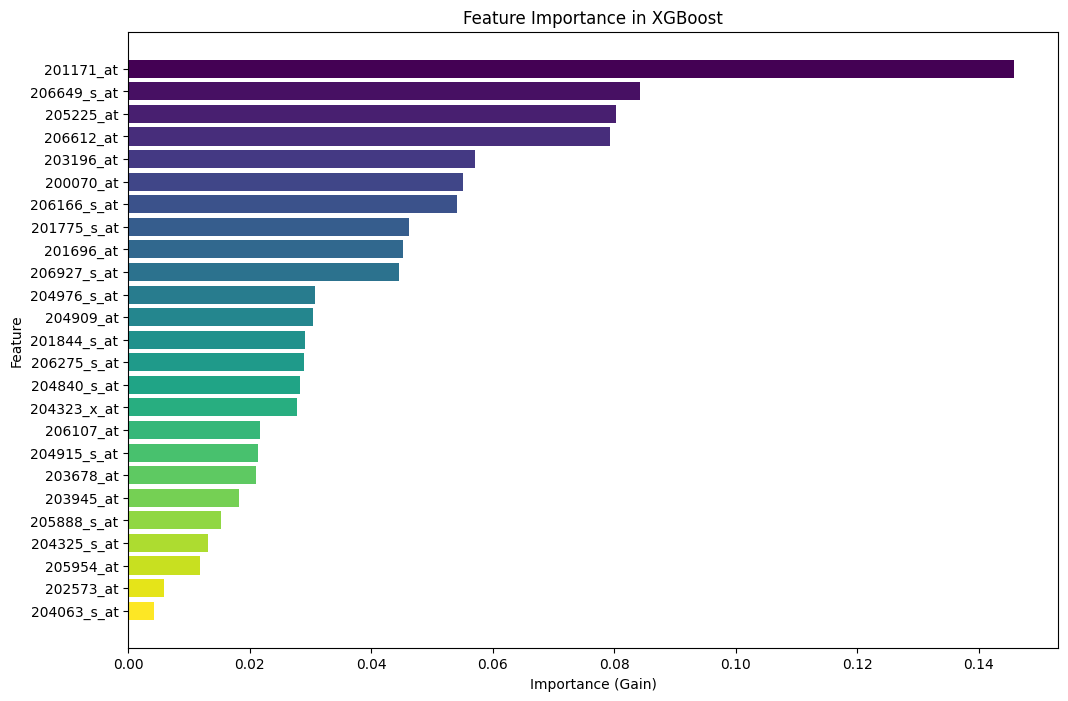

In [ ]:
# prompt: plot xgb model with different colors

# Assuming xgb_model is your trained XGBoost classifier and X_top_50 is your feature DataFrame

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})

# Filter out features with zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] != 0]

# Sort features by importance in descending order
non_zero_importances = non_zero_importances.sort_values('Importance', ascending=False)

# Assign ranks based on importance
non_zero_importances['Rank'] = non_zero_importances['Importance'].rank(ascending=False)

# Create a bar chart of feature importances with different colors
plt.figure(figsize=(12, 8))

# Use a colormap to assign colors based on rank
colors = plt.cm.viridis(np.linspace(0, 1, len(non_zero_importances)))

plt.barh(non_zero_importances['Feature'], non_zero_importances['Importance'], color=colors)
plt.xlabel('Importance (Gain)')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest ranked features at the top
plt.show()

# You can also plot the feature importance using xgboost's built-in plot_importance function:
# xgb.plot_importance(xgb_model)
# plt.show()

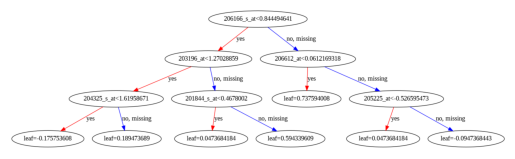

In [ ]:
# prompt: plot xgb trees

# Assuming xgb_model is your trained XGBoost classifier
# You can visualize individual trees in the XGBoost model

# Choose the index of the tree you want to plot (e.g., the first tree)
tree_index = 0

# Plot the chosen tree
xgb.plot_tree(xgb_model, num_trees=tree_index)
plt.show()

# You can also plot multiple trees by specifying a range in num_trees
# For example, to plot trees 0 to 2:
# xgb.plot_tree(xgb_model, num_trees=range(3))
# plt.show()


In [ ]:
# prompt: construct 1d cnn model

# Assuming X_train, X_test, y_train, y_test are defined from the previous code
# and X_train has the shape (number_of_samples, number_of_features)
import tensorflow as tf
from tensorflow import keras
import numpy as np

# X_train and X_test are likely already NumPy arrays.
# Remove the lines that try to convert them to NumPy arrays again.
# X_train = X_train.values  # Convert DataFrame to NumPy array
# X_test = X_test.values   # Convert DataFrame to NumPy array

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


# Reshape the input data for 1D CNN
# Ensure the data is in the correct shape (number_of_samples, number_of_features, 1)
# Remove extra calls to np.expand_dims if they were applied previously
# Assuming original shape of X_train and X_test is (number_of_samples, number_of_features)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Removing this line to avoid redundant reshape
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)    # Removing this line to avoid redundant reshape

# Define the 1D CNN model
# Use keras.Sequential to create the model since you imported tensorflow as tf
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))  # Adjust the number of neurons as needed
model.add(keras.layers.Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax for classification

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Assuming X_train, X_test, y_train, y_test are defined from the previous code
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (Rest of your code to define the model) ...

# Create a LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the model using the encoded labels
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=16, validation_data=(X_test, y_test_encoded))  # Adjust epochs and batch_size as needed

# Evaluate the model using the encoded labels
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test accuracy:', accuracy)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9659 - loss: 0.2534 - val_accuracy: 0.9184 - val_loss: 0.3929
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9764 - loss: 0.1992 - val_accuracy: 0.8776 - val_loss: 0.3620
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9940 - loss: 0.1702 - val_accuracy: 0.8776 - val_loss: 0.3290
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9932 - loss: 0.1279 - val_accuracy: 0.8776 - val_loss: 0.3162
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9947 - loss: 0.1005 - val_accuracy: 0.8776 - val_loss: 0.2964
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9975 - loss: 0.0905 - val_accuracy: 0.8776 - val_loss: 0.2992
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9985 - loss: 0.0740 - val_accuracy: 0.8776 - val_loss: 0.2743
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9985 - loss: 0.0680 - val_accuracy: 0.8776 - val_loss

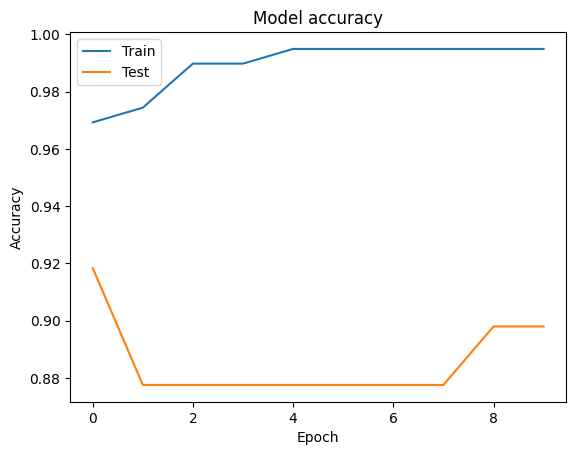

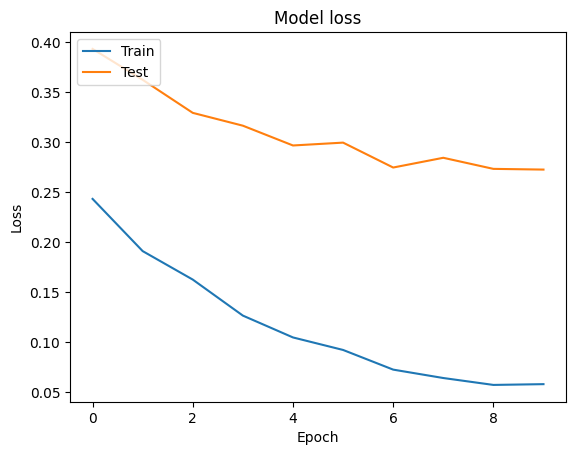

In [ ]:
# prompt: plot accuracy and loss curve

import matplotlib.pyplot as plt

# Assuming you have a 'history' object from your model training
# (e.g., history = model.fit(...))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Assuming you have y_test and y_pred from your model's predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# ... (your existing code) ...

# Ensure y_test is encoded using the same LabelEncoder used during training
y_test_encoded = label_encoder.transform(y_test)  # Assuming label_encoder is already defined

y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_pred_cnn = y_pred_classes

# Calculate the evaluation metrics using the encoded y_test
accuracy_cnn = accuracy_score(y_test_encoded, y_pred_classes)  # Use y_test_encoded
precision_cnn = precision_score(y_test_encoded, y_pred_classes, average='weighted')  # Use y_test_encoded
recall_cnn = recall_score(y_test_encoded, y_pred_classes, average='weighted')  # Use y_test_encoded
f1_cnn = f1_score(y_test_encoded, y_pred_classes, average='weighted')  # Use y_test_encoded
kappa_cnn = cohen_kappa_score(y_test_encoded, y_pred_classes)  # Use y_test_encoded

print(f"Accuracy: {accuracy_cnn}")
print(f"Precision: {precision_cnn}")
print(f"Recall: {recall_cnn}")
print(f"F1-score: {f1_cnn}")
print(f"Kappa: {kappa_cnn}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.8979591836734694
Precision: 0.9118131868131868
Recall: 0.8979591836734694
F1-score: 0.8966893424036282
Kappa: 0.8749361919346605


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 14.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


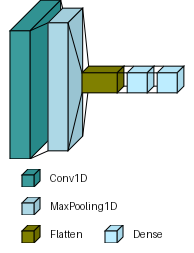

In [ ]:
# prompt: plot the 1d cnn model using visual keras
!pip install visualkeras
import visualkeras
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv1D]['fill'] = '#3B9C9C'
color_map[layers.MaxPooling1D]['fill'] = '#ADD8E6'
color_map[layers.Flatten]['fill'] = '#808000'
color_map[layers.Dense]['fill'] = '#BDEDFF'
color_map[layers.InputLayer]['fill'] = '#808000'

visualkeras.layered_view(model, legend=True, color_map=color_map)



In [ ]:
# Assuming X_train, X_test, y_train, y_test are defined from the previous code
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Reshape the input data for 1D CNN
# Reshape the input data for 1D CNN
# X_train and X_test are already NumPy arrays, so remove .values
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create a LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the 1D AlexNet model
alexnet_model = Sequential()

# 1st Convolutional Layer
alexnet_model.add(Conv1D(filters=16, kernel_size=11, activation='relu', input_shape=(X_train.shape[1], 1)))
alexnet_model.add(MaxPooling1D(pool_size=3, strides=2)) # Adjust pool_size and strides to avoid negative dimension error

# 2nd Convolutional Layer
alexnet_model.add(Conv1D(filters=32, kernel_size=5, activation='relu', padding='same'))
alexnet_model.add(MaxPooling1D(pool_size=2, strides=2)) # Adjust pool_size and strides to avoid negative dimension error

# 3rd Convolutional Layer
alexnet_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
# Reduced strides to 1 to prevent negative dimension
alexnet_model.add(MaxPooling1D(pool_size=2, strides=1))  # Adjust pool_size and strides to avoid negative dimension error

# 4th Convolutional Layer
alexnet_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
# Reduced strides to 1 to prevent negative dimension
alexnet_model.add(MaxPooling1D(pool_size=2, strides=1))  # Adjust pool_size and strides to avoid negative dimension error

alexnet_model.add(Flatten())

# 1st Fully Connected Layer
alexnet_model.add(Dense(128, activation='relu'))

# 2nd Fully Connected Layer
alexnet_model.add(Dense(64, activation='relu'))

# Output Layer
alexnet_model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax')) # Changed to use y_train_encoded for unique classes

# Compile the model
alexnet_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using the encoded labels
history = alexnet_model.fit(X_train, y_train_encoded, epochs=20, batch_size=16, validation_data=(X_test, y_test_encoded))  # Adjust epochs and batch_size as needed

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.2078 - loss: 1.7636 - val_accuracy: 0.2245 - val_loss: 1.7215
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3845 - loss: 1.5303 - val_accuracy: 0.3673 - val_loss: 1.4769
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5336 - loss: 1.2046 - val_accuracy: 0.3673 - val_loss: 1.2611
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5602 - loss: 1.0082 - val_accuracy: 0.4898 - val_loss: 1.0618
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6623 - loss: 0.7350 - val_accuracy: 0.6327 - val_loss: 0.9378
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7243 - loss: 0.6751 - val_accuracy: 0.5918 - val_loss: 1.0197
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8162 - loss: 0.5412 - val_accuracy: 0.6939 - val_loss: 0.8338
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8371 - loss: 0.4944 - val_accuracy: 0.6327 - v

In [ ]:
# Assuming you have defined and trained your AlexNet model as 'alexnet_model'
# in a previous cell, like in ipython-input-197-8397ffe77778

y_pred_classes = np.argmax(alexnet_model.predict(X_test), axis=1) # Change 'model' to 'alexnet_model'
y_pred_alex = y_pred_classes

# Now y_pred_classes will have the same shape as y_test

# Use the encoded y_test (y_test_encoded) for calculating metrics
accuracy_alex = accuracy_score(y_test_encoded, y_pred_classes)
precision_alex = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall_alex = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1_alex = f1_score(y_test_encoded, y_pred_classes, average='weighted')
kappa_alex = cohen_kappa_score(y_test_encoded, y_pred_classes)


# Calculate sensitivity (recall for the positive class)
# You might need to adjust this depending on your class labels
sensitivity = recall_score(y_test_encoded, y_pred_classes, average='weighted')


print(f"Accuracy: {accuracy_alex}")
print(f"Precision: {precision_alex}")
print(f"Recall: {recall_alex}")
print(f"Sensitivity: {sensitivity}")
print(f"F1-score: {f1_alex}")
print(f"Kappa: {kappa_alex}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.8367346938775511
Precision: 0.8384110787172011
Recall: 0.8367346938775511
Sensitivity: 0.8367346938775511
F1-score: 0.8350502105604146
Kappa: 0.8006103763987793


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


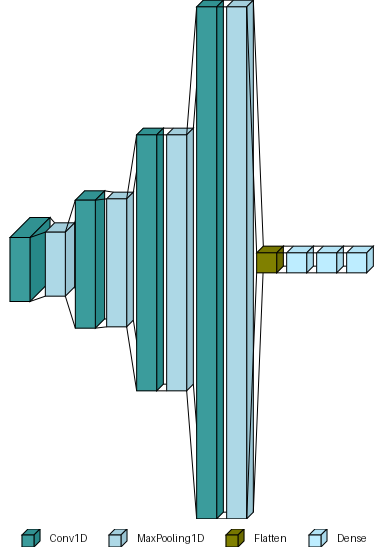

In [ ]:
# prompt: construct the model with visual keras using different colors and legend values

from collections import defaultdict
import visualkeras
from tensorflow import keras
from tensorflow.keras import layers

# Make sure 'model' is correctly assigned to your 1D CNN model
# Assuming your 1D CNN model is defined in a previous cell, like this:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# ... (your model definition) ...
# model = Sequential(...) # Your model definition
# ... (model compilation and training) ...

# If you have defined your model in a different cell or using a different variable name,
# make sure to replace 'model' with the correct variable name here.

# Assuming your 1D CNN model is named 'alexnet_model' as defined in ipython-input-197-fd023b6ffcbc:
model = alexnet_model

color_map = defaultdict(dict)
color_map[layers.Conv1D]['fill'] = '#3B9C9C'  # Teal for convolutional layers
color_map[layers.MaxPooling1D]['fill'] = '#ADD8E6'  # Light blue for pooling layers
color_map[layers.Flatten]['fill'] = '#808000'  # Olive for flatten layer
color_map[layers.Dense]['fill'] = '#BDEDFF'  # Light sky blue for dense layers
color_map[layers.InputLayer]['fill'] = '#808000'  # Olive for input layer

visualkeras.layered_view(model, legend=True, color_map=color_map)

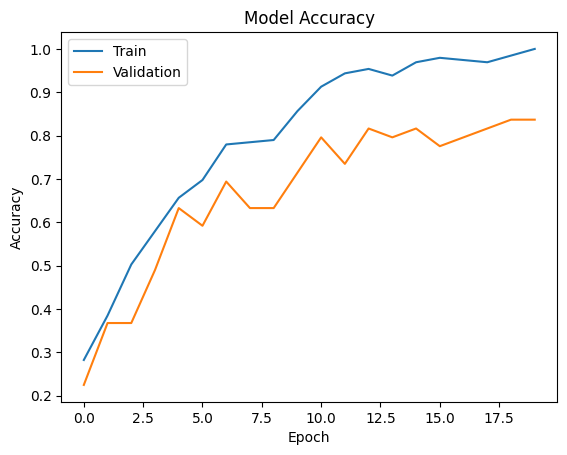

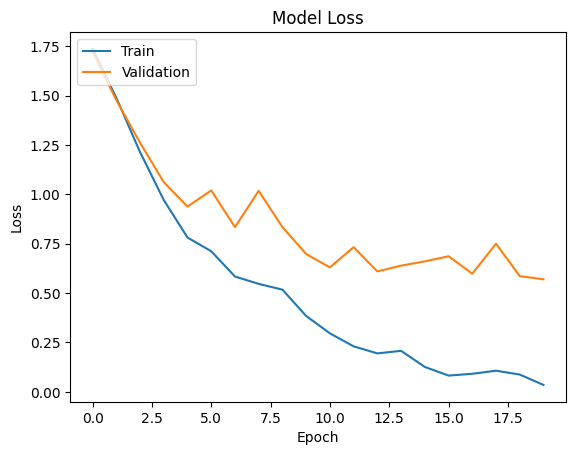

In [ ]:
# prompt: construct accuracy loss curve

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# prompt: combine 1d cnn with decision tree and print accuracy, precision, recall, f1score and kappa constant
!pip install visualkeras
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
import keras
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers
import visualkeras
from sklearn.preprocessing import LabelEncoder

# Assuming X_train, X_test, y_train, y_test are defined and reshaped for 1D CNN

# Create a LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()

# Fit the encoder on the training data and transform both train and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Define the 1D CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
# Output layer for multi-class classification using the encoded labels
model_cnn.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using encoded labels
model_cnn.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Get CNN feature representation (output of the Flatten layer)
cnn_features = model_cnn.predict(X_train)

# Train a Decision Tree classifier on the CNN features and encoded labels
dt_model = DecisionTreeClassifier()
dt_model.fit(cnn_features, y_train_encoded)

# Get CNN features for the test data
cnn_features_test = model_cnn.predict(X_test)
# Make predictions using the combined model and encoded labels
y_pred_dt = dt_model.predict(cnn_features_test)


# Evaluate the combined model using encoded labels
accuracy = accuracy_score(y_test_encoded, y_pred_dt)
precision = precision_score(y_test_encoded, y_pred_dt, average='weighted')
recall = recall_score(y_test_encoded, y_pred_dt, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_dt, average='weighted')
kappa = cohen_kappa_score(y_test_encoded, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Kappa: {kappa}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.2735 - loss: 1.7237 - val_accuracy: 0.4286 - val_loss: 1.6036
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6078 - loss: 1.4117 - val_accuracy: 0.5102 - val_loss: 1.4031
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6815 - loss: 1.1729 - val_accuracy: 0.5714 - val_loss: 1.2096
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7317 - loss: 0.9645 - val_accuracy: 0.7347 - val_loss: 0.9960
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8527 - loss: 0.7554 - val_accuracy: 0.8163 - val_loss: 0.8310
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9037 - loss: 0.5962 - val_accuracy: 0.8367 - val_loss: 0.7111
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9049 - loss: 0.4959 - val_accuracy: 0.8163 - val_loss: 0.6362
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9306 - loss: 0.4183 - val_accuracy: 0.8367 - val_loss: 0.5634
Epoch 9/10

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Accuracy: 0.8367346938775511
Precision: 0.8517006802721089
Recall: 0.8367346938775511
F1-score: 0.8342355575770681
Kappa: 0.7995910020449898


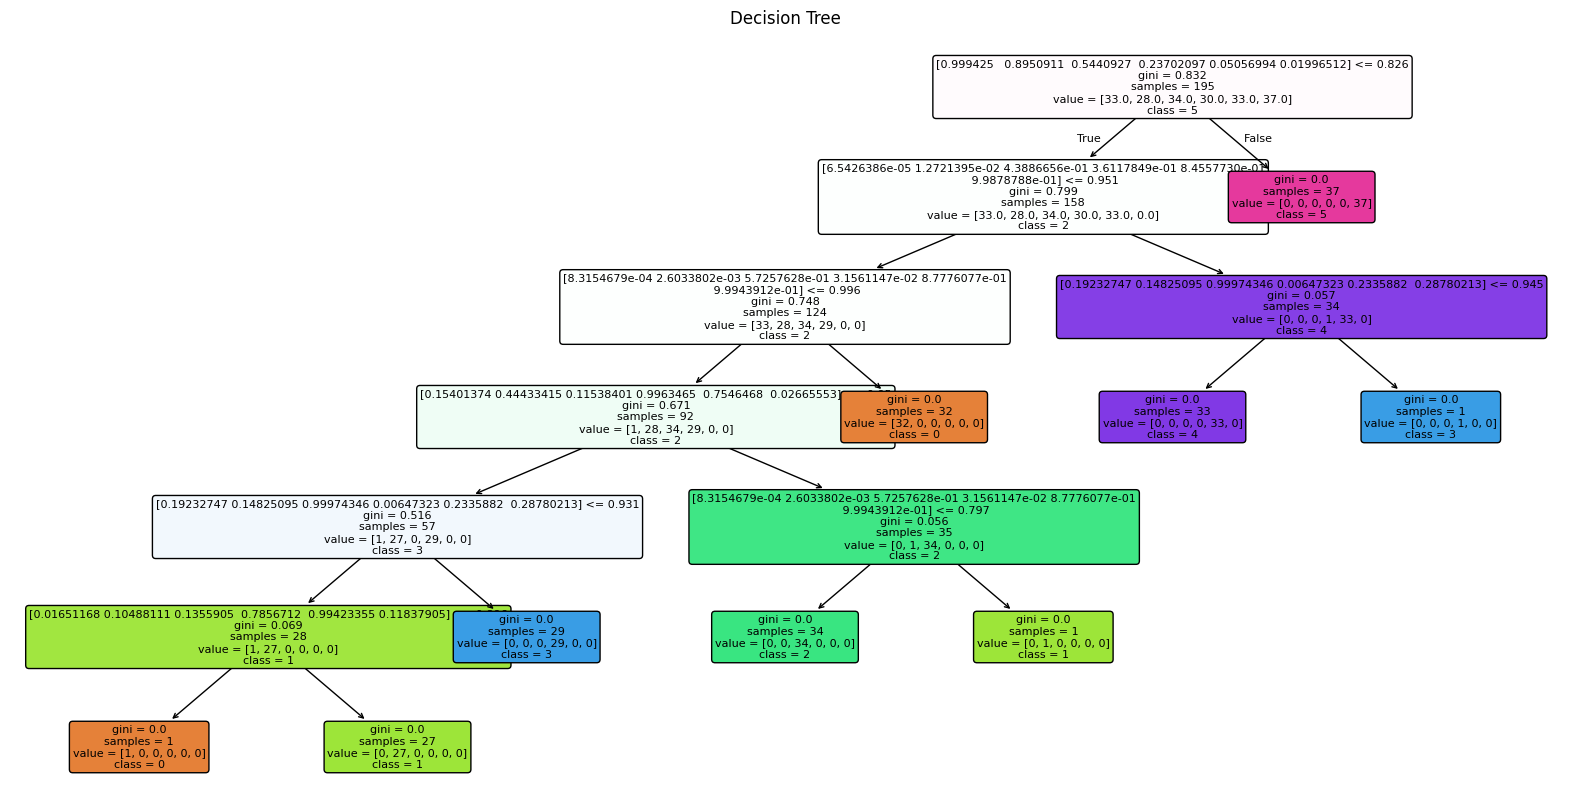

In [ ]:
# prompt: plot the decision tree with different colors

from collections import defaultdict
import visualkeras
from tensorflow import keras
from tensorflow.keras import layers


plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dt_model,
          feature_names=cnn_features, # Assuming you have feature names
          class_names=[str(i) for i in np.unique(y)],
          filled=True,
          rounded=True,
          fontsize=8)

# Customize colors
plt.title("Decision Tree")
plt.show()

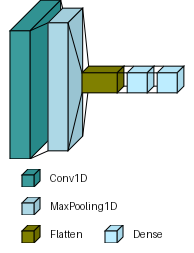

In [ ]:
# prompt: construct hybrid  1d cnn with decision tree diagram using visual keras

from collections import defaultdict
import visualkeras
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'model_cnn' and 'dt_model' are defined as in the previous code

# Visualize the CNN model
color_map = defaultdict(dict)
color_map[layers.Conv1D]['fill'] = '#3B9C9C'  # Teal for convolutional layers
color_map[layers.MaxPooling1D]['fill'] = '#ADD8E6'  # Light blue for pooling layers
color_map[layers.Flatten]['fill'] = '#808000'  # Olive for flatten layer
color_map[layers.Dense]['fill'] = '#BDEDFF'  # Light sky blue for dense layers
color_map[layers.InputLayer]['fill'] = '#808000'  # Olive for input layer

visualkeras.layered_view(model_cnn, legend=True, color_map=color_map)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


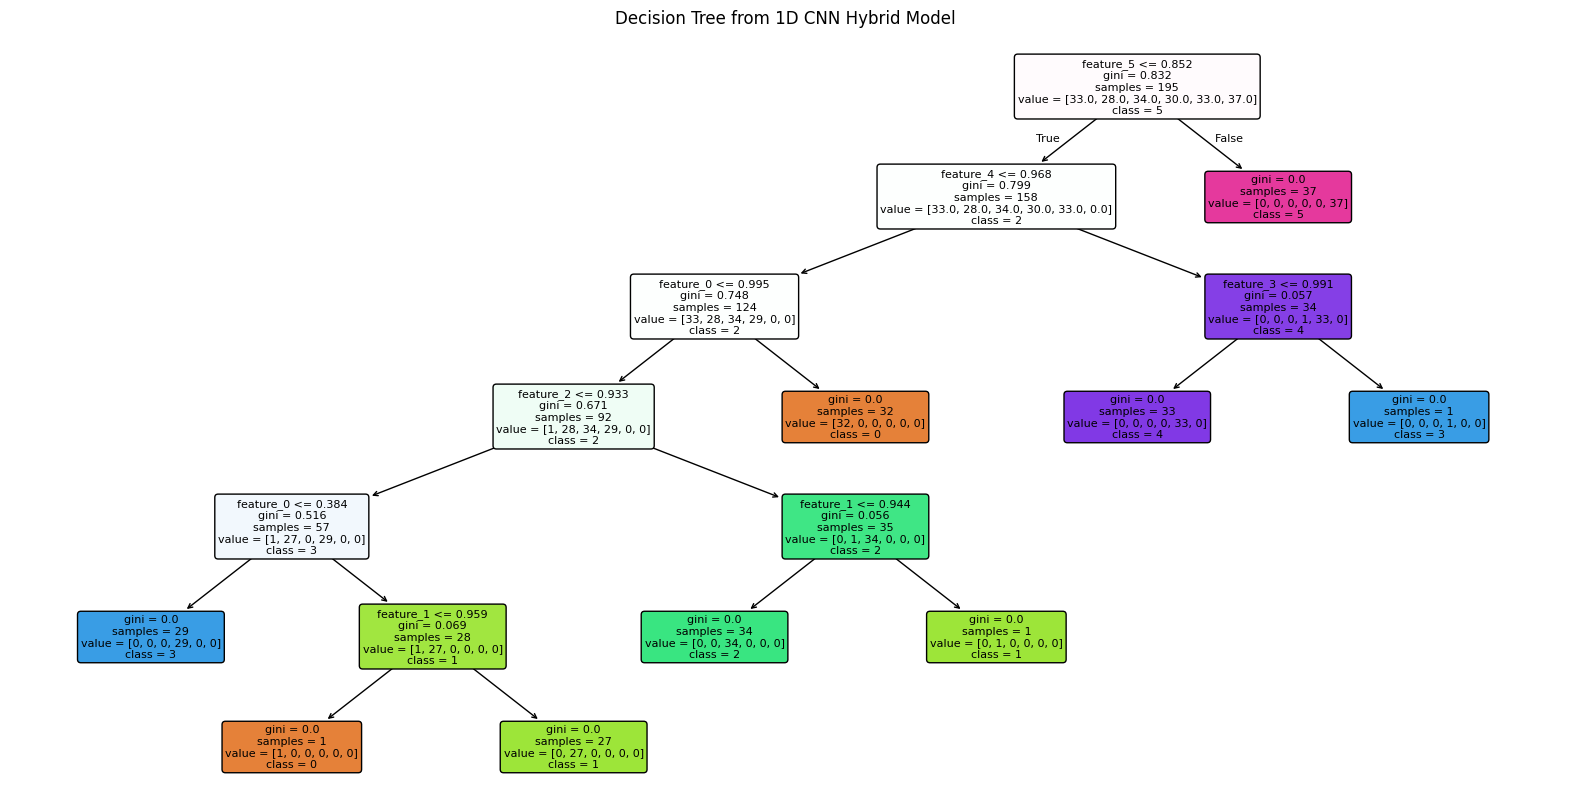

     Feature  Importance  Rank
0  feature_0    0.360807   1.0
5  feature_5    0.221920   2.0
4  feature_4    0.194205   3.0
2  feature_2    0.187243   4.0
1  feature_1    0.023861   5.0
3  feature_3    0.011964   6.0


In [ ]:
import pandas as pd # Import the pandas library
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

# Assuming dt_model, X_train, and y are defined from the previous code

# Get the CNN features used to train the Decision Tree
cnn_features_train = model_cnn.predict(X_train)
# Get the feature names (assuming they are the column names of X_train)

# If X_train doesn't have column names, you can create a list of names:
feature_names = [f"feature_{i}" for i in range(cnn_features_train.shape[1])]
# Or if X_train is a pandas DataFrame:
# feature_names = X_train.columns

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dt_model,
          feature_names=feature_names,  # Use the correct feature names
          class_names=[str(i) for i in np.unique(y)],
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree from 1D CNN Hybrid Model")
plt.show()

# Print feature importances with ranks
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': dt_model.feature_importances_})
feature_importances['Rank'] = feature_importances['Importance'].rank(ascending=False)
print(feature_importances.sort_values('Rank'))

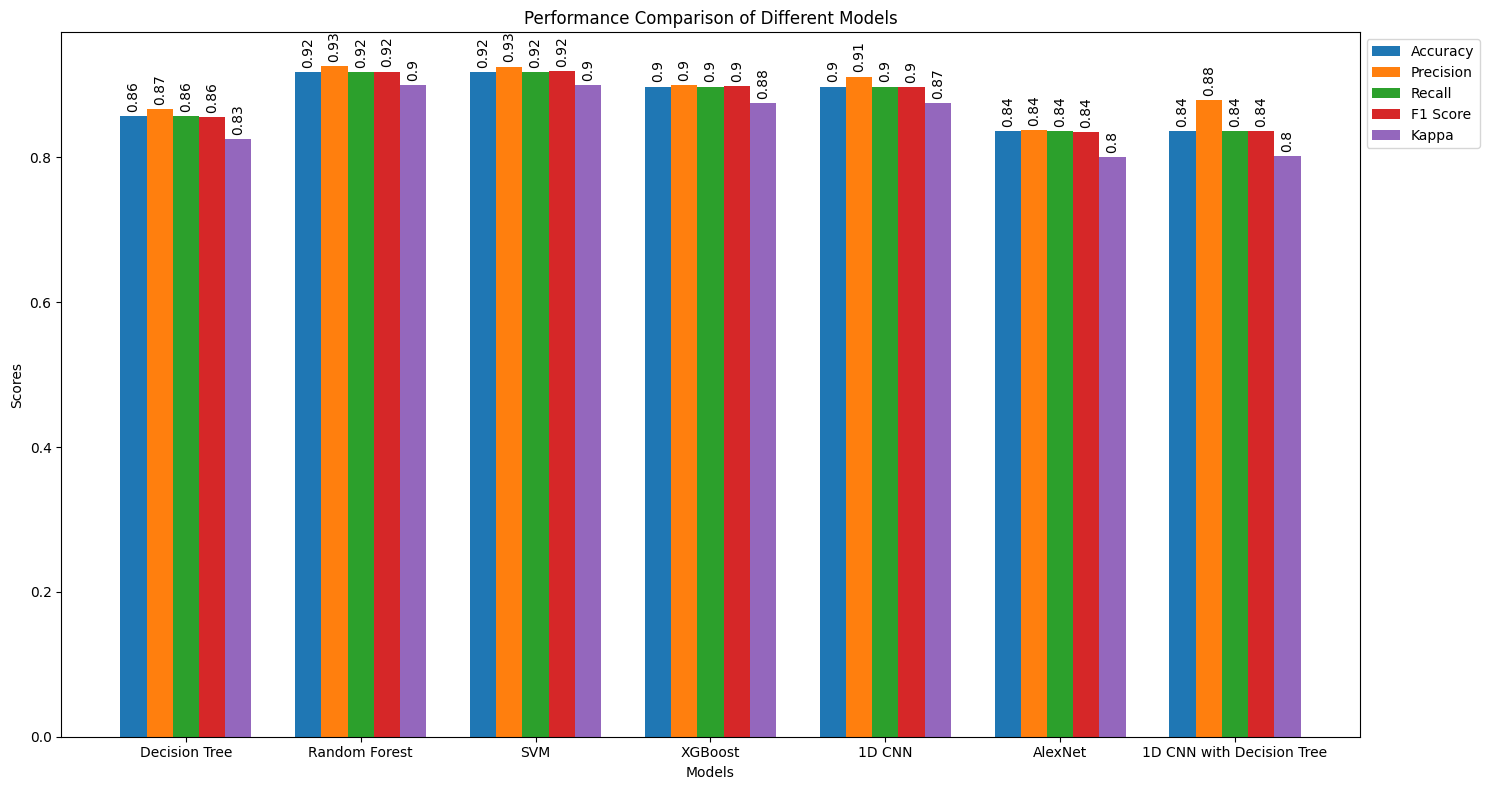

In [ ]:
# prompt: construct bar chart for decision tree, random forest, svm,  xgboost, 1d cnn, alexnet,  1d cnn with decision tree for accuracy, precision, recall, f1 score,  kappa constant comparison based on the metirics along with metrics over the bar with 90 degree rotation and legends

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following variables:
# accuracy_dt, precision_dt, recall_dt, f1_dt, kappa_dt
# accuracy_rf, precision_rf, recall_rf, f1_rf, kappa_rf
# accuracy_svm, precision_svm, recall_svm, f1_svm, kappa_svm
# accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, kappa_xgb
# accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, kappa_cnn
# accuracy_alex, precision_alex, recall_alex, f1_alex, kappa_alex
# accuracy, precision, recall, f1, kappa  (for 1d cnn with decision tree)

models = ['Decision Tree', 'Random Forest', 'SVM', 'XGBoost', '1D CNN', 'AlexNet', '1D CNN with Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Kappa']

# Replace placeholders with your actual scores
accuracy_scores = [accuracy_d, accuracy_rf, accuracy_svm, accuracy_xgb, accuracy_cnn, accuracy_alex, accuracy]
precision_scores = [precision_d, precision_rf, precision_svm, precision_xgb, precision_cnn, precision_alex, precision]
recall_scores = [recall_d, recall_rf, recall_svm, recall_xgb, recall_cnn, recall_alex, recall]
f1_scores = [f1_d, f1_rf, f1_svm, f1_xgb, f1_cnn, f1_alex, f1]
kappa_scores = [kappa_d, kappa_rf, kappa_svm, kappa_xgb, kappa_cnn, kappa_alex, kappa]


bar_width = 0.15
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(15, 8))

rects1 = ax.bar(index - 2 * bar_width, accuracy_scores, bar_width, label='Accuracy')
rects2 = ax.bar(index - bar_width, precision_scores, bar_width, label='Precision')
rects3 = ax.bar(index, recall_scores, bar_width, label='Recall')
rects4 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')
rects5 = ax.bar(index + 2 * bar_width, kappa_scores, bar_width, label='Kappa')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add metrics over the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)


plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


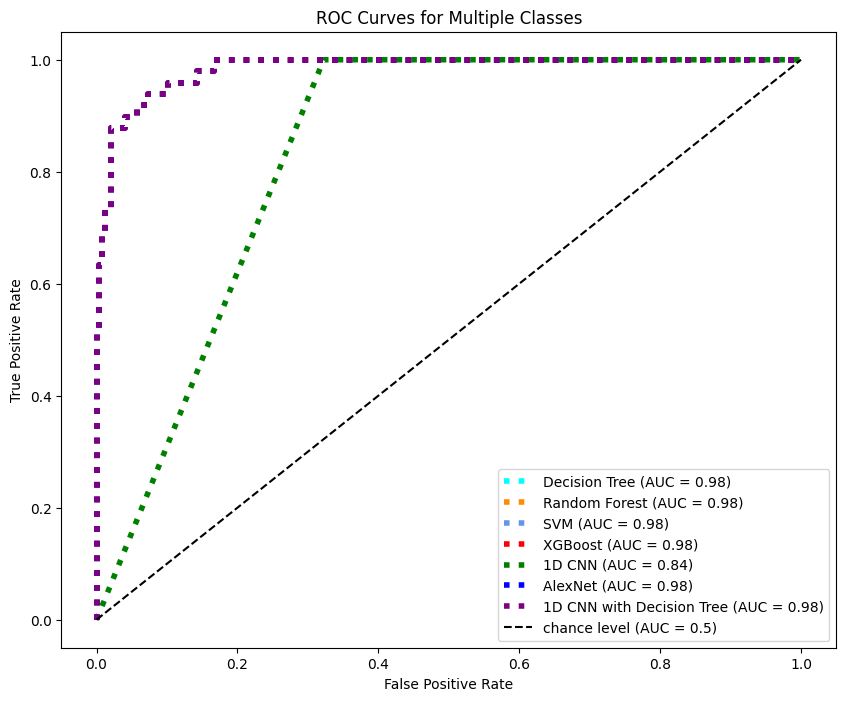

In [ ]:
# prompt: draw roc curves for  decision tree, random forest, svm,  xgboost, 1d cnn, alexnet,  1d cnn with decision tree for multiple classes

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

# Assuming you have y_test and the predicted probabilities for each model
# Example: y_pred_prob_dt, y_pred_prob_rf, etc.

# Binarize the labels for multi-class ROC curves
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Create ROC curves for each model
models = {
    'Decision Tree': y_pred_d,  # Assuming y_pred_dt contains predicted class labels
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'XGBoost': y_pred_xgb,
    '1D CNN': y_pred_cnn,
    'AlexNet': y_pred_alex,
    '1D CNN with Decision Tree': y_pred_dt  # Assuming y_pred_dt is the prediction from the combined model
}

plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'purple'])

for model_name, y_pred in models.items():
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  # Convert class labels to probabilities if needed
  if len(np.unique(y_pred)) <= 2:
    y_pred_prob = y_pred
  else:
      y_pred_prob = model.predict(X_test)


  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Plot the micro-average ROC curve
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label=f"{model_name} (AUC = {roc_auc['micro']:.2f})",
      color=next(colors),
      linestyle=":",
      linewidth=4,
  )


plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiple Classes")
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

def differential_gene_expression(expression_data, selected_genes):
  """
  Performs differential gene expression analysis for selected genes across different groups.

  Args:
    expression_data: A pandas DataFrame with gene expression values (rows are genes, columns are samples).
    selected_genes: A list or pandas Series containing gene names to perform the analysis on.

  Returns:
    A pandas DataFrame with differential gene expression results for each gene.
  """

  results = []
  # Access the correct column of selected_genes DataFrame (e.g., 'Feature')
  for gene in selected_genes:  # Assuming selected_genes contains a list of gene names
    # Now, use 'gene' to access data from expression_data
    if gene in expression_data.index: # Check if the gene exists in expression_data index
        gene_expression = expression_data.loc[gene]
        group6_expression = gene_expression[expression_data.loc[gene, 'type'] == 'normal']
        group1_expression = gene_expression[expression_data.loc[gene, 'type'] == 'basal']
        group2_expression = gene_expression[expression_data.loc[gene, 'type'] == 'cell_line']
        group3_expression = gene_expression[expression_data.loc[gene, 'type'] == 'HER']
        group4_expression = gene_expression[expression_data.loc[gene, 'type'] == 'luminal_A']
        group5_expression = gene_expression[expression_data.loc[gene, 'type'] == 'luminal_B']


        # Perform statistical tests (e.g., t-test or ANOVA) to compare expression levels between groups.
        # Replace with your preferred statistical test.
        t_statistic, p_value = stats.ttest_ind(group1_expression, group2_expression)
        # ... (Repeat for all comparisons between groups)

        results.append([gene, t_statistic, p_value])
        # ... (Repeat for other comparisons)
    else:
        print(f"Gene {gene} not found in expression data.")

  results_df = pd.DataFrame(results, columns=['Gene', 't-statistic', 'p-value'])
  return results_df

# Example usage (replace with your actual data)
# expression_data = pd.read_csv('gene_expression_data.csv', index_col=0)

# Assuming X_top_50 has a column named 'Feature' containing gene names
# Assuming X_top_50 has a column named 'Feature' containing gene names
de_results = differential_gene_expression(df, X_top_50[:-1])  # Change 'type' to 'Feature' or the actual column name# print(de_results)

Gene 205225_at not found in expression data.
Gene 204840_s_at not found in expression data.
Gene 1558080_s_at not found in expression data.
Gene 1561573_at not found in expression data.
Gene 1569608_x_at not found in expression data.
Gene 204915_s_at not found in expression data.
Gene 202573_at not found in expression data.
Gene 204909_at not found in expression data.
Gene 206649_s_at not found in expression data.
Gene 1561906_at not found in expression data.
Gene 1556877_at not found in expression data.
Gene 201171_at not found in expression data.
Gene 203196_at not found in expression data.
Gene 1565819_at not found in expression data.
Gene 1558595_at not found in expression data.
Gene 1560066_at not found in expression data.
Gene 1554918_a_at not found in expression data.
Gene 1553749_at not found in expression data.
Gene 1552616_a_at not found in expression data.
Gene 1556381_at not found in expression data.
Gene 205888_s_at not found in expression data.
Gene 201775_s_at not found 